In [1]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
from scipy.stats import norm
from scipy.integrate import nquad
%matplotlib inline

(array([  399.,   928.,  1494.,  2133.,  2556.,  3161.,  3596.,  4262.,
         4586.,  5236.,  5533.,  6198.,  6646.,  7011.,  7593.,  7903.,
         8441.,  8672.,  9158.,  9540.,  9876.,  9965., 10420., 10982.,
        11133., 11487., 11559., 12043., 12232., 12466., 12737., 12996.,
        13057., 13321., 13448., 13770., 13804., 14003., 14382., 14184.,
        14561., 14649., 14527., 14840., 14637., 14852., 14891., 14708.,
        15058., 14984., 14894., 15010., 15007., 14905., 14767., 14813.,
        14703., 14720., 14287., 14473., 14254., 14185., 14186., 13811.,
        13661., 13568., 13446., 13165., 12892., 12662., 12489., 12258.,
        12014., 11808., 11345., 10942., 10697., 10663., 10178.,  9739.,
         9432.,  9138.,  8771.,  8004.,  7790.,  7376.,  6998.,  6393.,
         6106.,  5549.,  5125.,  4680.,  4181.,  3759.,  3080.,  2618.,
         2126.,  1502.,   887.,   325.]),
 array([0.00121645, 0.01119548, 0.02117451, 0.03115354, 0.04113257,
        0.0511116 , 0.0610

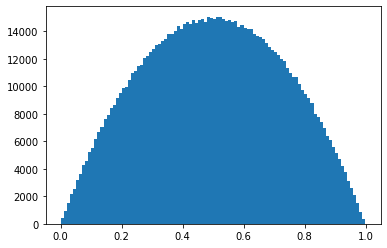

In [2]:
from scipy.stats import gamma
from scipy.stats import truncexpon
from scipy.stats import beta
sample= beta.rvs(2,2,size=1000000)
plt.hist(sample,bins=100)

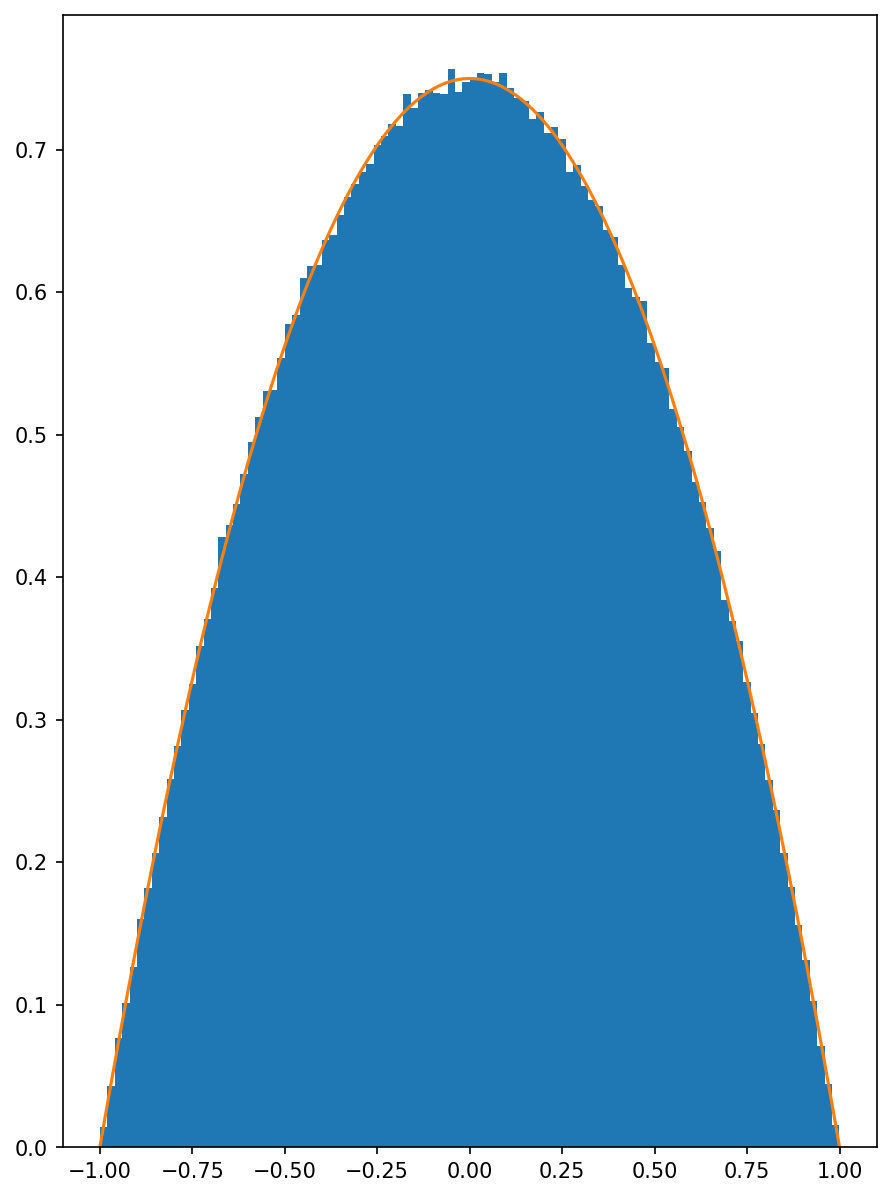

In [10]:
ee=np.genfromtxt("sampleDist.txt",delimiter=',')
ee=ee[:-1]
plt.figure(figsize=(7,10),dpi=150)
plt.hist(ee,bins=100,density=True)
plt.plot(np.linspace(-1,1,10000),beta.pdf((np.linspace(-1,1,10000)+1)/2,2,2)/2)

In [2]:
def printer(name):
    base=np.genfromtxt(name+"(base-level5).txt",delimiter=',')
    ee=np.genfromtxt(name+"(e-level5).txt",delimiter=',')
    #ee=ee[(ee[:,0]<=1)&(ee[:,1]<=1)]
    ef=np.genfromtxt(name+"(f-level5).txt",delimiter=',')
    eg=np.genfromtxt(name+"(g-level5).txt",delimiter=',')
    baserows=base.view([('',base.dtype)]*base.shape[1])
    eerows=ee.view([('',ee.dtype)]*ee.shape[1])
    efrows=ef.view([('',ef.dtype)]*ef.shape[1])
    egrows=eg.view([('',eg.dtype)]*eg.shape[1])
    eedif=np.setdiff1d(eerows,baserows).view(ee.dtype).reshape(-1,ee.shape[1])
    efdif=np.setdiff1d(efrows,baserows).view(ef.dtype).reshape(-1,ef.shape[1])
    egdif=np.setdiff1d(egrows,baserows).view(eg.dtype).reshape(-1,eg.shape[1])
    plt.figure(figsize=(5,5),dpi=300)
    plt.plot(base[:,0],base[:,1],".b")
    plt.plot(eedif[:,0],eedif[:,1],".r")
    plt.title(name +" (e)")
    plt.figure(figsize=(5,5),dpi=300)
    plt.plot(base[:,0],base[:,1],".b")
    plt.plot(efdif[:,0],efdif[:,1],".r")
    plt.title(name +" (f)")
    plt.figure(figsize=(5,5),dpi=300)
    plt.plot(base[:,0],base[:,1],".b")
    plt.plot(egdif[:,0],egdif[:,1],".r")
    plt.title(name +" (g)")
    df=pd.read_csv(name+".txt",header=None)
    display(df)
    ye=nquad(lambda x,y: (x**3-y**2),[[-1,1],[-1,1]])
    ye2=nquad(lambda x,y:1+(np.sin(x)+np.cos(y))/np.exp(y),[[-1,1],[-1,1]])
    #ye2=nquad(lambda x,y:np.exp(-200*((x-.8)**2+(y-.8)**2)),[[-1,1],[-1,1]])
    plt.figure(figsize=(7,5),dpi=200)
    plt.gca().set_yscale('log',nonposy='clip')
    plt.xlabel('points')
    plt.plot(df.loc[0],np.finfo(float).eps+abs(df.loc[2]-4),label='1.0',linestyle='-', marker='x')
    plt.plot(df.loc[0],np.finfo(float).eps+abs(df.loc[1]-ye[0]),label='x^3-y^2',linestyle='-', marker='x')
    plt.plot(df.loc[0],np.finfo(float).eps+abs(df.loc[3]-ye2[0]),label='1+(sin(x)+cos(y))/exp(y)',linestyle='-', marker='x')
    plt.legend()
    plt.title(name + " Integrationsfehler Adaptives Sparse Grid")
    #plt.savefig(name+"_integrationsfehler.png")
    plt.show()
    plt.figure(figsize=(7,5),dpi=200)
    plt.gca().set_yscale('log')
    plt.xlabel('points')
    plt.plot(df.loc[0],np.finfo(float).eps+abs(df.loc[5]),label='1.0',linestyle='-', marker='x')
    plt.plot(df.loc[0],np.finfo(float).eps+abs(df.loc[4]),label='x^3-y^2',linestyle='-', marker='x')
    plt.plot(df.loc[0],np.finfo(float).eps+abs(df.loc[6]),label='1+(sin(x)+cos(y))/exp(y)',linestyle='-', marker='x')
    plt.legend()
    plt.title(name + " Approximationsfehler Adaptives Sparse Grid")
    #plt.savefig(name+"_approximationsfehler.png")
    plt.show()
    
    plt.figure(figsize=(7,5),dpi=200)
    plt.gca().set_yscale('log',nonposy='clip')
    plt.xlabel('points')
    plt.plot(df.loc[34],np.finfo(float).eps+abs(df.loc[8]-4),label='1.0',linestyle='-', marker='x')
    plt.plot(df.loc[34],np.finfo(float).eps+abs(df.loc[7]-ye[0]),label='x^3-y^2',linestyle='-', marker='x')
    plt.plot(df.loc[34],np.finfo(float).eps+abs(df.loc[9]-ye2[0]),label='1+(sin(x)+cos(y))/exp(y)',linestyle='-', marker='x')
    plt.legend()
    plt.title(name + " Integrationsfehler Sparse Grid")
    #plt.savefig(name+"_integrationsfehler.png")
    plt.show()
    plt.figure(figsize=(7,5),dpi=200)
    plt.gca().set_yscale('log')
    plt.xlabel('points')
    plt.plot(df.loc[34],np.finfo(float).eps+abs(df.loc[11]),label='1.0',linestyle='-', marker='x')
    plt.plot(df.loc[34],np.finfo(float).eps+abs(df.loc[10]),label='x^3-y^2',linestyle='-', marker='x')
    plt.plot(df.loc[34],np.finfo(float).eps+abs(df.loc[12]),label='1+(sin(x)+cos(y))/exp(y)',linestyle='-', marker='x')
    plt.legend()
    plt.title(name + " Approximationsfehler Sparse Grid")
    #plt.savefig(name+"_approximationsfehler.png")
    plt.show()
    
    plt.figure(figsize=(7,5),dpi=200)
    plt.gca().set_yscale('log',nonposy='clip')
    plt.xlabel('points')
    plt.plot(df.loc[0],np.finfo(float).eps+abs(df.loc[14]-4),label='1.0',linestyle='-', marker='x')
    plt.plot(df.loc[0],np.finfo(float).eps+abs(df.loc[13]-ye[0]),label='x^3-y^2',linestyle='-', marker='x')
    plt.plot(df.loc[0],np.finfo(float).eps+abs(df.loc[15]-ye2[0]),label='1+(sin(x)+cos(y))/exp(y)',linestyle='-', marker='x')
    plt.legend()
    plt.title(name + " Integrationsfehler MonteCarlo")
    #plt.savefig(name+"_integrationsfehler.png")
    plt.show()
        
    plt.figure(figsize=(7,5),dpi=200)
    plt.gca().set_yscale('log',nonposy='clip')
    plt.xlabel('points')
    plt.plot(df.loc[0],np.finfo(float).eps+abs(df.loc[1]-ye[0]),label='adaptive sparse grid',linestyle='-', marker='x')
    plt.plot(df.loc[34],np.finfo(float).eps+abs(df.loc[7]-ye[0]),label='regular sparse grid',linestyle='-', marker='x')
    plt.plot(df.loc[0],np.finfo(float).eps+abs(df.loc[13]-ye[0]),label='monte-carlo',linestyle='-', marker='x')
    plt.legend()
    plt.title(name + " Integrationsfehler f(x,y)=x³-y²")
    #plt.savefig(name+"_integrationsfehler.png")
    plt.show()
    
    plt.figure(figsize=(7,5),dpi=200)
    plt.gca().set_yscale('log',nonposy='clip')
    plt.xlabel('points')
    plt.plot(df.loc[0],np.finfo(float).eps+abs(df.loc[2]-4),label='adaptive sparse grid',linestyle='-', marker='x')
    plt.plot(df.loc[34],np.finfo(float).eps+abs(df.loc[8]-4),label='regular sparse grid',linestyle='-', marker='x')
    plt.plot(df.loc[0],np.finfo(float).eps+abs(df.loc[14]-4),label='monte-carlo',linestyle='-', marker='x')
    plt.legend()
    plt.title(name + " Integrationsfehler f(x,y)=1")
    #plt.savefig(name+"_integrationsfehler.png")
    plt.show()
        
    plt.figure(figsize=(7,5),dpi=200)
    plt.gca().set_yscale('log',nonposy='clip')
    plt.xlabel('points')
    plt.plot(df.loc[0],np.finfo(float).eps+abs(df.loc[3]-ye2[0]),label='adaptive sparse grid',linestyle='-', marker='x')
    plt.plot(df.loc[34],np.finfo(float).eps+abs(df.loc[9]-ye2[0]),label='regular sparse grid',linestyle='-', marker='x')
    plt.plot(df.loc[0],np.finfo(float).eps+abs(df.loc[15]-ye2[0]),label='monte-carlo',linestyle='-', marker='x')
    plt.legend()
    plt.title(name + " Integrationsfehler f(x,y)=1+(sin(x)-cos(y))/exp(y)")
    #plt.savefig(name+"_integrationsfehler.png")
    plt.show()
    
    plt.figure(figsize=(7,5),dpi=200)
    plt.gca().set_yscale('log',nonposy='clip')
    plt.xlabel('points')
    plt.plot(df.loc[34],np.finfo(float).eps+abs(df.loc[16]),label='order: 1',linestyle='-', marker='x')
    plt.plot(df.loc[34],np.finfo(float).eps+abs(df.loc[17]),label='order: 3',linestyle='-', marker='x')
    plt.plot(df.loc[34],np.finfo(float).eps+abs(df.loc[18]),label='order: 10',linestyle='-', marker='x')
    plt.legend()
    plt.title(name + " PCE L2 Error SparseGrid f(x,y)=x^3-y^2")
    #plt.savefig(name+"_integrationsfehler.png")
    plt.show()
    
    plt.figure(figsize=(7,5),dpi=200)
    plt.gca().set_yscale('log',nonposy='clip')
    plt.xlabel('points')
    plt.plot(df.loc[34],np.finfo(float).eps+abs(df.loc[19]),label='order: 1',linestyle='-', marker='x')
    plt.plot(df.loc[34],np.finfo(float).eps+abs(df.loc[20]),label='order: 3',linestyle='-', marker='x')
    plt.plot(df.loc[34],np.finfo(float).eps+abs(df.loc[21]),label='order: 10',linestyle='-', marker='x')
    plt.legend()
    plt.title(name + " PCE L2 Error SparseGrid f(x,y)=1")
    #plt.savefig(name+"_integrationsfehler.png")
    plt.show()
    
    plt.figure(figsize=(7,5),dpi=200)
    plt.gca().set_yscale('log',nonposy='clip')
    plt.xlabel('points')
    plt.plot(df.loc[34],np.finfo(float).eps+abs(df.loc[22]),label='order: 1',linestyle='-', marker='x')
    plt.plot(df.loc[34],np.finfo(float).eps+abs(df.loc[23]),label='order: 3',linestyle='-', marker='x')
    plt.plot(df.loc[34],np.finfo(float).eps+abs(df.loc[24]),label='order: 10',linestyle='-', marker='x')
    plt.legend()
    plt.title(name + " PCE L2 Error SparseGrid f(x,y)=1+(sin(x)+cos(y))/exp(y)")
    #plt.savefig(name+"_integrationsfehler.png")
    plt.show()
    
    plt.figure(figsize=(7,5),dpi=200)
    plt.gca().set_yscale('log',nonposy='clip')
    plt.xlabel('points')
    plt.plot(df.loc[0],np.finfo(float).eps+abs(df.loc[25]),label='order: 1',linestyle='-', marker='x')
    plt.plot(df.loc[0],np.finfo(float).eps+abs(df.loc[26]),label='order: 3',linestyle='-', marker='x')
    plt.plot(df.loc[0],np.finfo(float).eps+abs(df.loc[27]),label='order: 10',linestyle='-', marker='x')
    plt.legend()
    plt.title(name + " PCE L2 Error adaptive SparseGrid f(x,y)=x^3-y^2")
    #plt.savefig(name+"_integrationsfehler.png")
    plt.show()
    
    plt.figure(figsize=(7,5),dpi=200)
    plt.gca().set_yscale('log',nonposy='clip')
    plt.xlabel('points')
    plt.plot(df.loc[0],np.finfo(float).eps+abs(df.loc[28]),label='order: 1',linestyle='-', marker='x')
    plt.plot(df.loc[0],np.finfo(float).eps+abs(df.loc[29]),label='order: 3',linestyle='-', marker='x')
    plt.plot(df.loc[0],np.finfo(float).eps+abs(df.loc[30]),label='order: 10',linestyle='-', marker='x')
    plt.legend()
    plt.title(name + " PCE L2 Error adaptive SparseGrid f(x,y)=1")
    #plt.savefig(name+"_integrationsfehler.png")
    plt.show()
    
    plt.figure(figsize=(7,5),dpi=200)
    plt.gca().set_yscale('log',nonposy='clip')
    plt.xlabel('points')
    plt.plot(df.loc[0],np.finfo(float).eps+abs(df.loc[31]),label='order: 1',linestyle='-', marker='x')
    plt.plot(df.loc[0],np.finfo(float).eps+abs(df.loc[32]),label='order: 3',linestyle='-', marker='x')
    plt.plot(df.loc[0],np.finfo(float).eps+abs(df.loc[33]),label='order: 10',linestyle='-', marker='x')
    plt.legend()
    plt.title(name + " PCE L2 Error adaptive SparseGrid f(x,y)=1+(sin(x)+cos(y))/exp(y)")
    #plt.savefig(name+"_integrationsfehler.png")
    plt.show()
    
    plt.figure(figsize=(7,5),dpi=200)
    plt.gca().set_yscale('log',nonposy='clip')
    plt.xlabel('points')
    plt.plot(df.loc[34],np.finfo(float).eps+abs(df.loc[16]),label='order: 1 regular',linestyle='--', marker='x')
    plt.plot(df.loc[34],np.finfo(float).eps+abs(df.loc[17]),label='order: 3 regular',linestyle='--', marker='x')
    plt.plot(df.loc[34],np.finfo(float).eps+abs(df.loc[18]),label='order: 10 regular',linestyle='--', marker='x')
    plt.plot(df.loc[0],np.finfo(float).eps+abs(df.loc[25]),label='order: 1 adaptive',linestyle='-', marker='x')
    plt.plot(df.loc[0],np.finfo(float).eps+abs(df.loc[26]),label='order: 3 adaptive',linestyle='-', marker='x')
    plt.plot(df.loc[0],np.finfo(float).eps+abs(df.loc[27]),label='order: 10 adaptive',linestyle='-', marker='x')
    plt.legend()
    plt.title(name + " PCE L2 Error SparseGrid f(x,y)=x^3-y^2")
    #plt.savefig(name+"_integrationsfehler.png")
    plt.show()

In [17]:
def printer1D(name):
    df=pd.read_csv(name+".txt",header=None)
    display(df)
    ye=nquad(lambda x: (x**3-5),[[-1,1]])
    ye1=2.0
    ye2=nquad(lambda x:1+(np.sin(x)+np.cos(x))/np.exp(x),[[-1,1]])
    plt.figure(figsize=(7,5),dpi=200)
    plt.gca().set_yscale('log',nonposy='clip')
    plt.xlabel('points')
    plt.plot(df.loc[0],np.finfo(float).eps+abs(df.loc[2]-ye1),label='1.0')
    plt.plot(df.loc[0],np.finfo(float).eps+abs(df.loc[1]-ye[0]),label='x^3-y^2')
    plt.plot(df.loc[0],np.finfo(float).eps+abs(df.loc[3]-ye2[0]),label='1+(sin(x)+cos(y))/exp(y)')
    plt.legend()
    plt.title(name + " Integrationsfehler Adaptives Sparse Grid")
    #plt.savefig(name+"_integrationsfehler.png")
    plt.show()
    plt.figure(figsize=(7,5),dpi=200)
    plt.gca().set_yscale('log')
    plt.xlabel('points')
    plt.plot(df.loc[0],np.finfo(float).eps+abs(df.loc[5]),label='1.0')
    plt.plot(df.loc[0],np.finfo(float).eps+abs(df.loc[4]),label='x^3-y^2')
    plt.plot(df.loc[0],np.finfo(float).eps+abs(df.loc[6]),label='1+(sin(x)+cos(y))/exp(y)')
    plt.legend()
    plt.title(name + " Approximationsfehler Adaptives Sparse Grid")
    #plt.savefig(name+"_approximationsfehler.png")
    plt.show()
    
    plt.figure(figsize=(7,5),dpi=200)
    plt.gca().set_yscale('log',nonposy='clip')
    plt.xlabel('points')
    plt.plot(df.loc[0],np.finfo(float).eps+abs(df.loc[8]-ye1),label='1.0')
    plt.plot(df.loc[0],np.finfo(float).eps+abs(df.loc[7]-ye[0]),label='x^3-y^2')
    plt.plot(df.loc[0],np.finfo(float).eps+abs(df.loc[9]-ye2[0]),label='1+(sin(x)+cos(y))/exp(y)')
    plt.legend()
    plt.title(name + " Integrationsfehler Sparse Grid")
    #plt.savefig(name+"_integrationsfehler.png")
    plt.show()
    plt.figure(figsize=(7,5),dpi=200)
    plt.gca().set_yscale('log')
    plt.xlabel('points')
    plt.plot(df.loc[0],np.finfo(float).eps+abs(df.loc[11]),label='1.0')
    plt.plot(df.loc[0],np.finfo(float).eps+abs(df.loc[10]),label='x^3-y^2')
    plt.plot(df.loc[0],np.finfo(float).eps+abs(df.loc[12]),label='1+(sin(x)+cos(y))/exp(y)')
    plt.legend()
    plt.title(name + " Approximationsfehler Sparse Grid")
    #plt.savefig(name+"_approximationsfehler.png")
    plt.show()
    
    plt.figure(figsize=(7,5),dpi=200)
    plt.gca().set_yscale('log',nonposy='clip')
    plt.xlabel('points')
    plt.plot(df.loc[0],np.finfo(float).eps+abs(df.loc[14]-ye1),label='1.0')
    plt.plot(df.loc[0],np.finfo(float).eps+abs(df.loc[13]-ye[0]),label='x^3-y^2')
    plt.plot(df.loc[0],np.finfo(float).eps+abs(df.loc[15]-ye2[0]),label='1+(sin(x)+cos(y))/exp(y)')
    plt.legend()
    plt.title(name + " Integrationsfehler MonteCarlo")
    #plt.savefig(name+"_integrationsfehler.png")
    plt.show()
        
    plt.figure(figsize=(7,5),dpi=200)
    plt.gca().set_yscale('log',nonposy='clip')
    plt.xlabel('points')
    plt.plot(df.loc[0],np.finfo(float).eps+abs(df.loc[1]-ye[0]),label='adaptive sparse grid')
    plt.plot(df.loc[0],np.finfo(float).eps+abs(df.loc[7]-ye[0]),label='regular sparse grid')
    plt.plot(df.loc[0],np.finfo(float).eps+abs(df.loc[13]-ye[0]),label='monte-carlo')
    plt.legend()
    plt.title(name + " Integrationsfehler f(x,y)=x³-y²")
    #plt.savefig(name+"_integrationsfehler.png")
    plt.show()
    
    plt.figure(figsize=(7,5),dpi=200)
    plt.gca().set_yscale('log',nonposy='clip')
    plt.xlabel('points')
    plt.plot(df.loc[0],np.finfo(float).eps+abs(df.loc[2]-ye1),label='adaptive sparse grid')
    plt.plot(df.loc[0],np.finfo(float).eps+abs(df.loc[8]-ye1),label='regular sparse grid')
    plt.plot(df.loc[0],np.finfo(float).eps+abs(df.loc[14]-ye1),label='monte-carlo')
    plt.legend()
    plt.title(name + " Integrationsfehler f(x,y)=1")
    #plt.savefig(name+"_integrationsfehler.png")
    plt.show()
        
    plt.figure(figsize=(7,5),dpi=200)
    plt.gca().set_yscale('log',nonposy='clip')
    plt.xlabel('points')
    plt.plot(df.loc[0],np.finfo(float).eps+abs(df.loc[3]-ye2[0]),label='adaptive sparse grid')
    plt.plot(df.loc[0],np.finfo(float).eps+abs(df.loc[9]-ye2[0]),label='regular sparse grid')
    plt.plot(df.loc[0],np.finfo(float).eps+abs(df.loc[15]-ye2[0]),label='monte-carlo')
    plt.legend()
    plt.title(name + " Integrationsfehler f(x,y)=1+(sin(x)-cos(y))/exp(y)")
    #plt.savefig(name+"_integrationsfehler.png")
    plt.show()
    
    plt.figure(figsize=(7,5),dpi=200)
    plt.gca().set_yscale('log',nonposy='clip')
    plt.xlabel('points')
    plt.plot(df.loc[0],np.finfo(float).eps+abs(df.loc[16]),label='order: 1')
    plt.plot(df.loc[0],np.finfo(float).eps+abs(df.loc[17]),label='order: 3')
    plt.plot(df.loc[0],np.finfo(float).eps+abs(df.loc[18]),label='order: 10')
    plt.legend()
    plt.title(name + " PCE L2 Error SparseGrid f(x,y)=x^3-y^2")
    #plt.savefig(name+"_integrationsfehler.png")
    plt.show()
    
    plt.figure(figsize=(7,5),dpi=200)
    plt.gca().set_yscale('log',nonposy='clip')
    plt.xlabel('points')
    plt.plot(df.loc[0],np.finfo(float).eps+abs(df.loc[19]),label='order: 1')
    plt.plot(df.loc[0],np.finfo(float).eps+abs(df.loc[20]),label='order: 3')
    plt.plot(df.loc[0],np.finfo(float).eps+abs(df.loc[21]),label='order: 10')
    plt.legend()
    plt.title(name + " PCE L2 Error SparseGrid f(x,y)=1")
    #plt.savefig(name+"_integrationsfehler.png")
    plt.show()
    
    plt.figure(figsize=(7,5),dpi=200)
    plt.gca().set_yscale('log',nonposy='clip')
    plt.xlabel('points')
    plt.plot(df.loc[0],np.finfo(float).eps+abs(df.loc[22]),label='order: 1')
    plt.plot(df.loc[0],np.finfo(float).eps+abs(df.loc[23]),label='order: 3')
    plt.plot(df.loc[0],np.finfo(float).eps+abs(df.loc[24]),label='order: 10')
    plt.legend()
    plt.title(name + " PCE L2 Error SparseGrid f(x,y)=1+(sin(x)+cos(y))/exp(y)")
    #plt.savefig(name+"_integrationsfehler.png")
    plt.show()
    
    plt.figure(figsize=(7,5),dpi=200)
    plt.gca().set_yscale('log',nonposy='clip')
    plt.xlabel('points')
    plt.plot(df.loc[0],np.finfo(float).eps+abs(df.loc[25]),label='order: 1')
    plt.plot(df.loc[0],np.finfo(float).eps+abs(df.loc[26]),label='order: 3')
    plt.plot(df.loc[0],np.finfo(float).eps+abs(df.loc[27]),label='order: 10')
    plt.legend()
    plt.title(name + " PCE L2 Error adaptive SparseGrid f(x,y)=x^3-y^2")
    #plt.savefig(name+"_integrationsfehler.png")
    plt.show()
    
    plt.figure(figsize=(7,5),dpi=200)
    plt.gca().set_yscale('log',nonposy='clip')
    plt.xlabel('points')
    plt.plot(df.loc[0],np.finfo(float).eps+abs(df.loc[28]),label='order: 1')
    plt.plot(df.loc[0],np.finfo(float).eps+abs(df.loc[29]),label='order: 3')
    plt.plot(df.loc[0],np.finfo(float).eps+abs(df.loc[30]),label='order: 10')
    plt.legend()
    plt.title(name + " PCE L2 Error adaptive SparseGrid f(x,y)=1")
    #plt.savefig(name+"_integrationsfehler.png")
    plt.show()
    
    plt.figure(figsize=(7,5),dpi=200)
    plt.gca().set_yscale('log',nonposy='clip')
    plt.xlabel('points')
    plt.plot(df.loc[0],np.finfo(float).eps+abs(df.loc[31]),label='order: 1')
    plt.plot(df.loc[0],np.finfo(float).eps+abs(df.loc[32]),label='order: 3')
    plt.plot(df.loc[0],np.finfo(float).eps+abs(df.loc[33]),label='order: 10')
    plt.legend()
    plt.title(name + " PCE L2 Error adaptive SparseGrid f(x,y)=1+(sin(x)+cos(y))/exp(y)")
    #plt.savefig(name+"_integrationsfehler.png")
    plt.show()

0           1           2             3             4   \
0    50.000000   75.000000  112.000000  1.680000e+02  2.520000e+02   
1    -1.343750   -1.345581   -1.340820 -1.336189e+00 -1.334229e+00   
2     4.000000    4.000000    4.000000  4.000000e+00  4.000000e+00   
3     7.863393    7.863393    7.866798  7.866780e+00  7.866970e+00   
4     0.000075    0.000018    0.000007  1.498593e-06  2.647509e-07   
5     0.000000    0.000000    0.000000  0.000000e+00  0.000000e+00   
6     0.000012    0.000012    0.000002  3.782949e-07  2.442914e-07   
7    -1.343750   -1.343750   -1.343750 -1.335938e+00 -1.335938e+00   
8     4.000000    4.000000    4.000000  4.000000e+00  4.000000e+00   
9     7.863393    7.863393    7.863393  7.865979e+00  7.865979e+00   
10    0.000032    0.000033    0.000033  2.041356e-06  2.039195e-06   
11    0.000000    0.000000    0.000000  0.000000e+00  0.000000e+00   
12    0.000006    0.000006    0.000006  4.097112e-07  4.046168e-07   
13   -1.344767   -1.341627   -1.342542 -1.323506e+00 -1.338691e+00   
14    4.000000    4.000000    4.000000  4.000000e+00  4.000000e+00   
15    7.857777    7.840971    7.857877  7.878651e+00  7.861016e+00   
16    0.111487    0.111950    0.111254  1.117741e-01  1.116684e-01   
17    0.002558    0.002547    0.002550  2.488595e-04  2.472563e-04   
18    4.712839    4.601368    4.943062  8.849959e-01  8.219551e-01   
19    0.000000    0.000000    0.000000  0.000000e+00  0.000000e+00   
20    0.000153    0.000152    0.000153  9.530730e-06  9.543876e-06   
21    3.068859    3.196963    3.139510  5.238085e-01  5.194229e-01   
22    0.123834    0.123179    0.124591  1.240738e-01  1.235880e-01   
23    0.001802    0.001785    0.001787  7.135854e-04  7.012363e-04   
24   16.740369   18.040802   16.865667  2.946893e+00  2.993600e+00   
25    0.111373    0.112241    0.111424  1.117562e-01  1.115608e-01   
26    0.015320    0.011561    0.011727  9.881357e-03  1.039298e-02   
27    7.995325    7.452749    1.231046  1.795755e-01  9.785373e-02   
28    0.000000    0.000000    0.000000  0.000000e+00  0.000000e+00   
29    0.000152    0.000024    0.000005  1.296087e-06  2.786053e-07   
30   17.553131    8.720503    2.785176  2.553078e+00  2.759662e+00   
31    0.123552    0.123829    0.122982  1.241145e-01  1.242874e-01   
32    0.002592    0.002452    0.001810  8.167169e-04  6.982416e-04   
33   28.991357   27.569159    8.145100  1.501207e+00  7.340369e-01   
34  113.000000  113.000000  113.000000  2.570000e+02  2.570000e+02   

              5             6             7             8             9   \
0   3.780000e+02  5.670000e+02  8.500000e+02  1.275000e+03  1.912000e+03   
1  -1.333984e+00 -1.333496e+00 -1.333488e+00 -1.333374e+00 -1.333361e+00   
2   4.000000e+00  4.000000e+00  4.000000e+00  4.000000e+00  4.000000e+00   
3   7.866851e+00  7.866866e+00  7.866838e+00  7.866849e+00  7.866843e+00   
4   5.148166e-08  1.327758e-08  2.481351e-09  4.339365e-10  1.147625e-10   
5   0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
6   6.382594e-08  2.064413e-08  6.380722e-09  1.703194e-09  3.772747e-10   
7  -1.333984e+00 -1.333984e+00 -1.333496e+00 -1.333496e+00 -1.333374e+00   
8   4.000000e+00  4.000000e+00  4.000000e+00  4.000000e+00  4.000000e+00   
9   7.866627e+00  7.866627e+00  7.866789e+00  7.866789e+00  7.866829e+00   
10  1.259186e-07  1.274851e-07  7.982202e-09  7.928944e-09  4.967242e-10   
11  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
12  2.729087e-08  2.682737e-08  1.825979e-09  1.842339e-09  1.242935e-10   
13 -1.325527e+00 -1.332491e+00 -1.331293e+00 -1.333399e+00 -1.333044e+00   
14  4.000000e+00  4.000000e+00  4.000000e+00  4.000000e+00  4.000000e+00   
15  7.871071e+00  7.864482e+00  7.874198e+00  7.866052e+00  7.873434e+00   
16  1.111860e-01  1.116315e-01  1.108846e-01  1.118410e-01  1.112768e-01   
17  2.302519e-05  2.314082e-05  2.007666e-06  1.994201e-06  1.700032e-07   
18  1.039091e-01  1.225421e-01  1.250653e-02  1

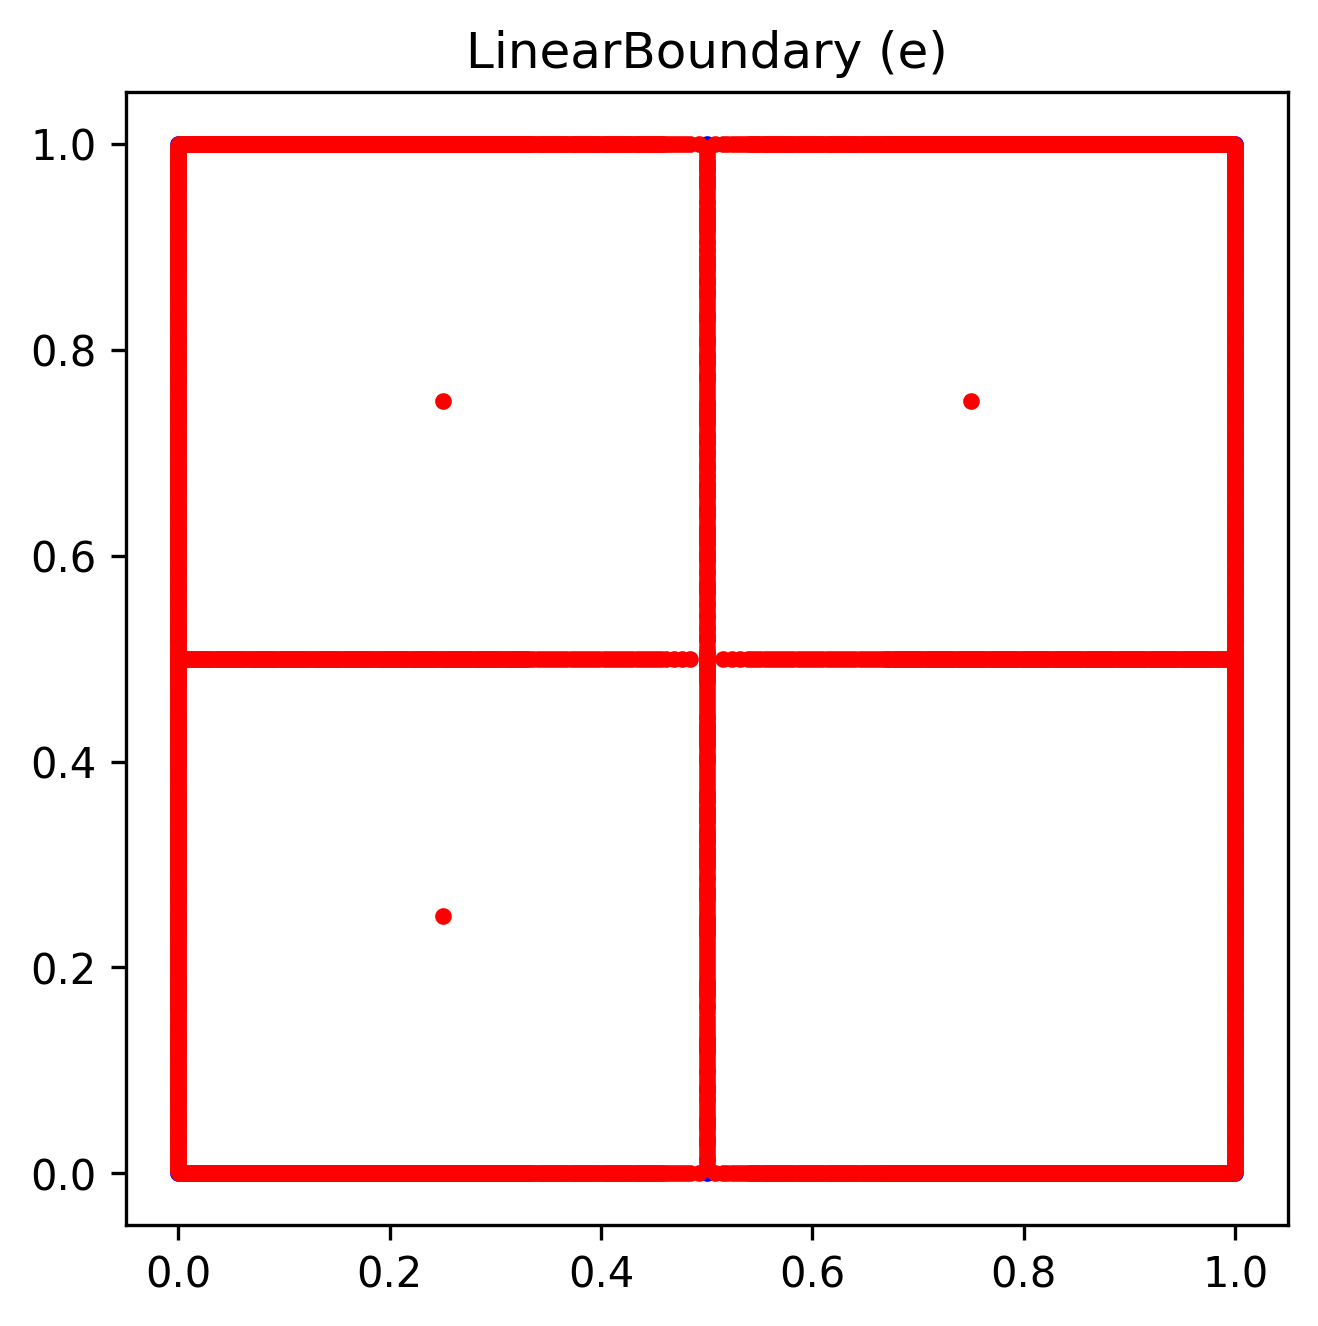

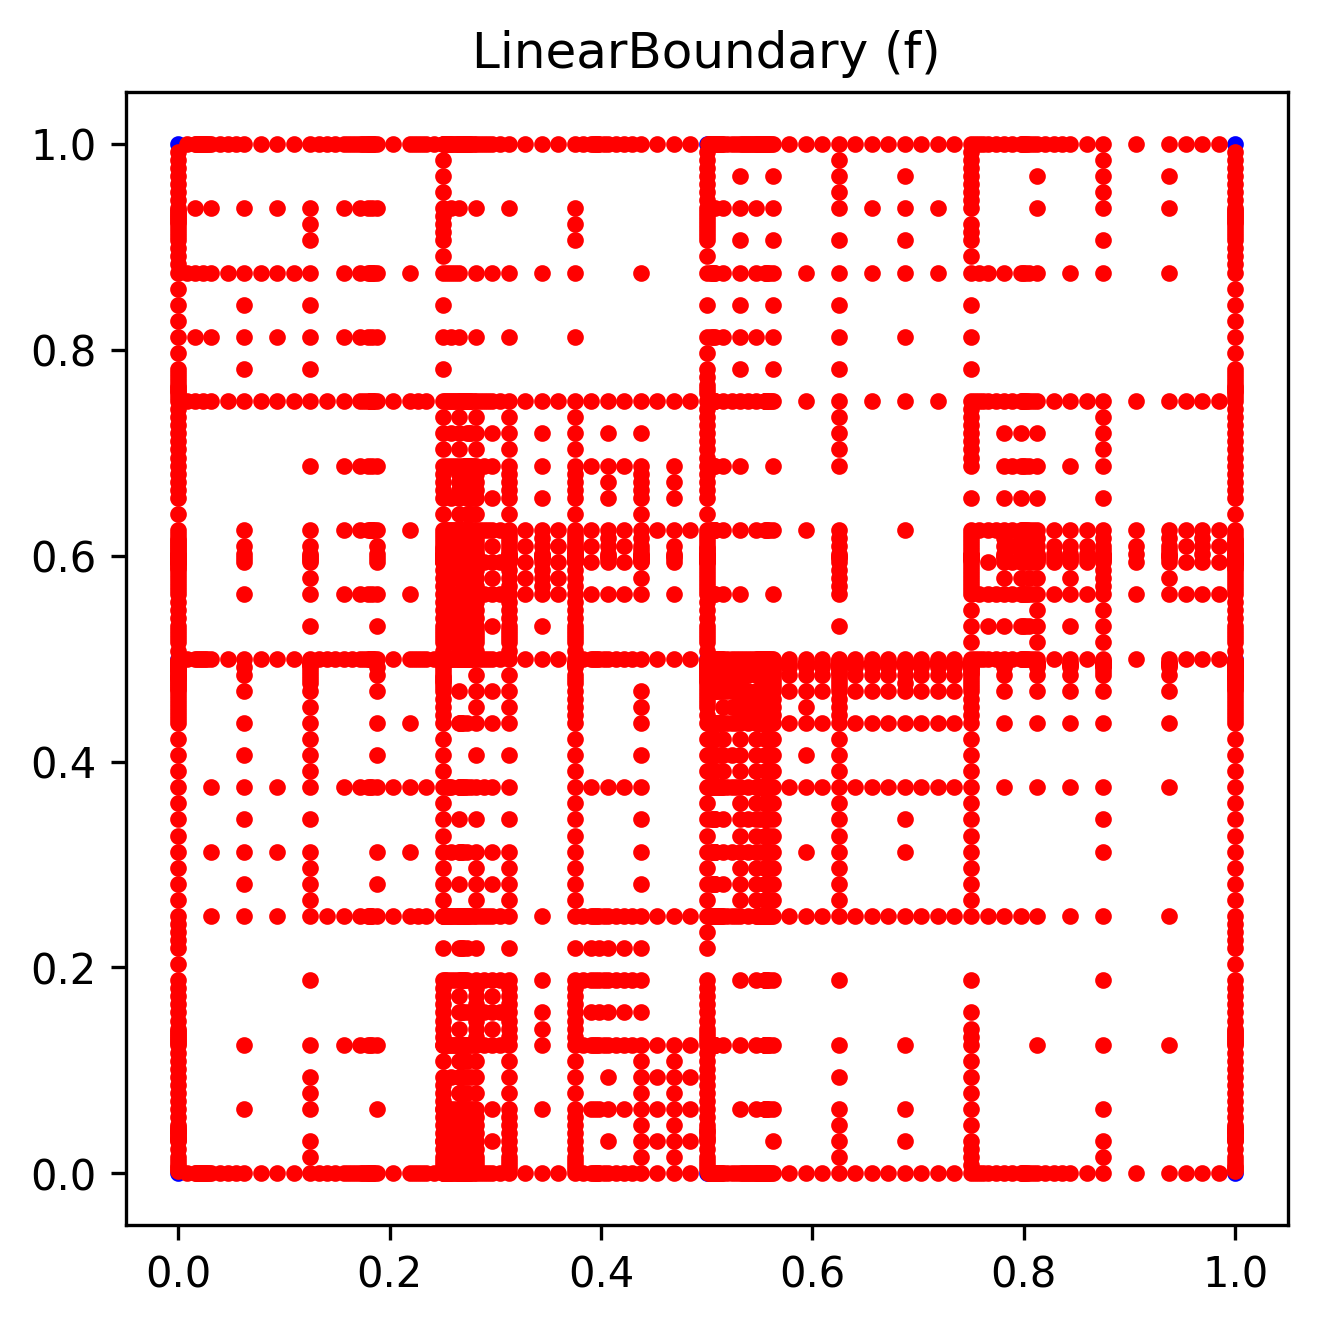

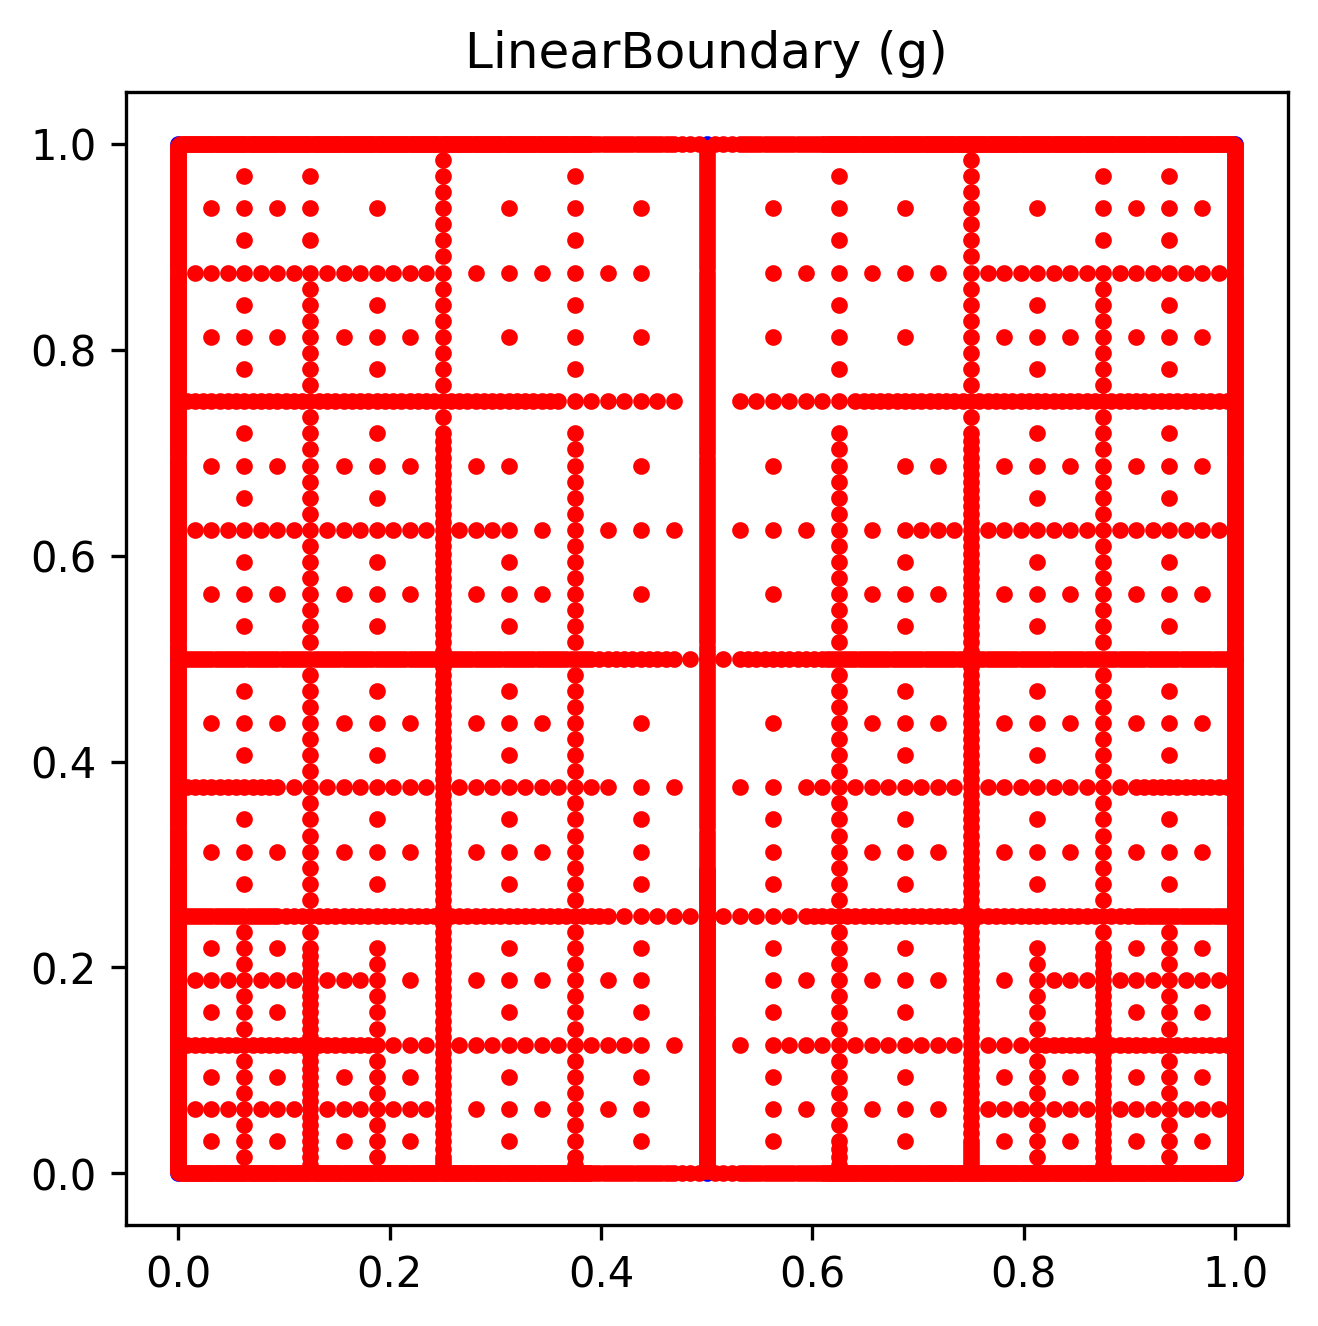

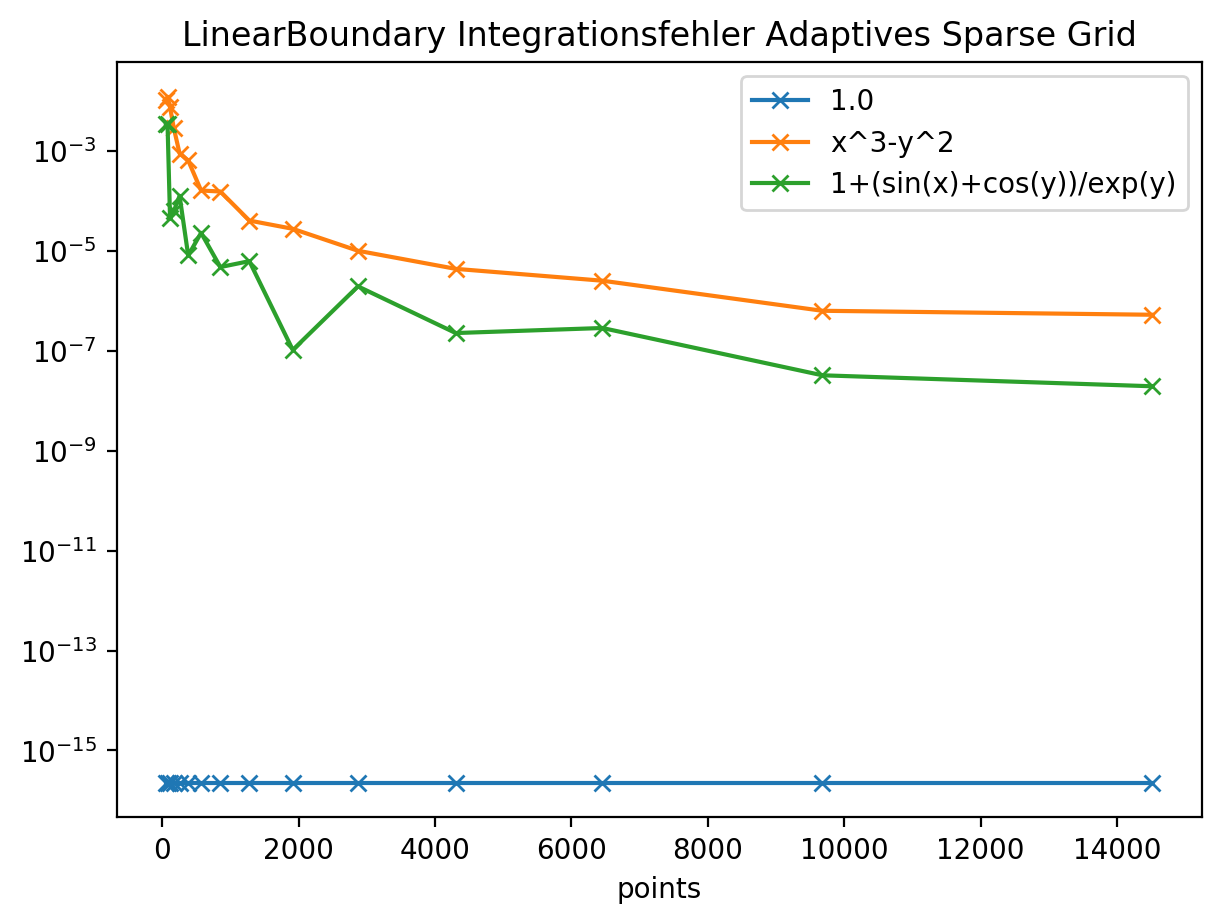

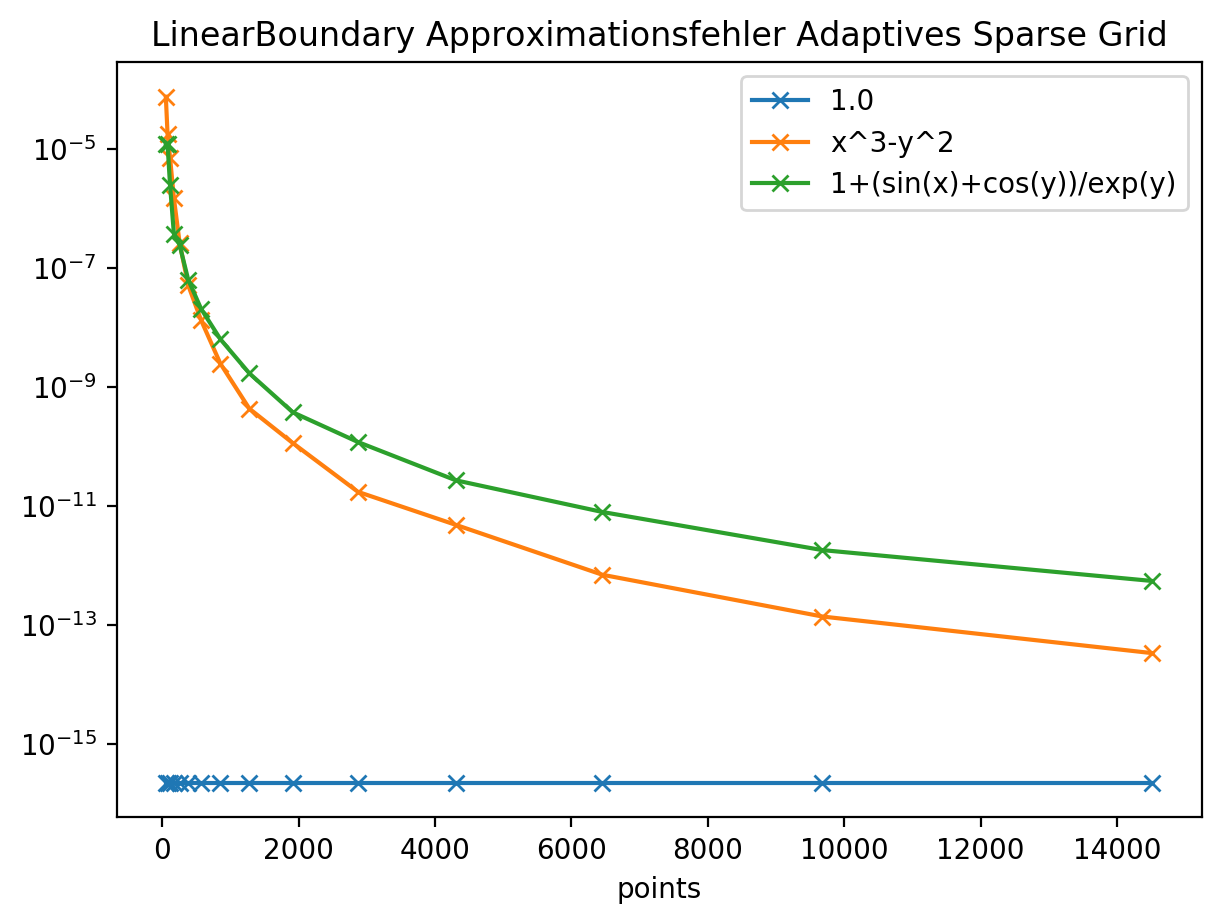

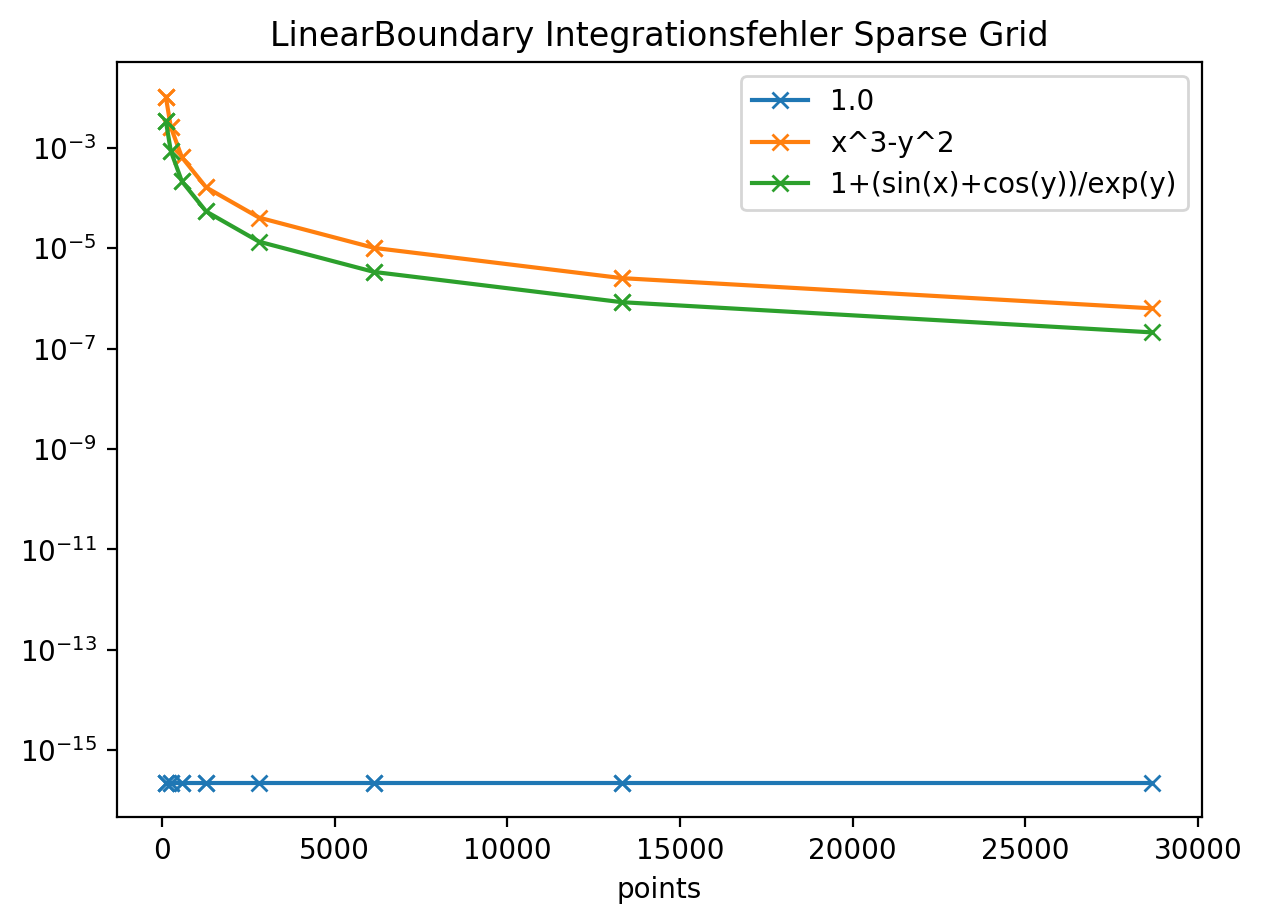

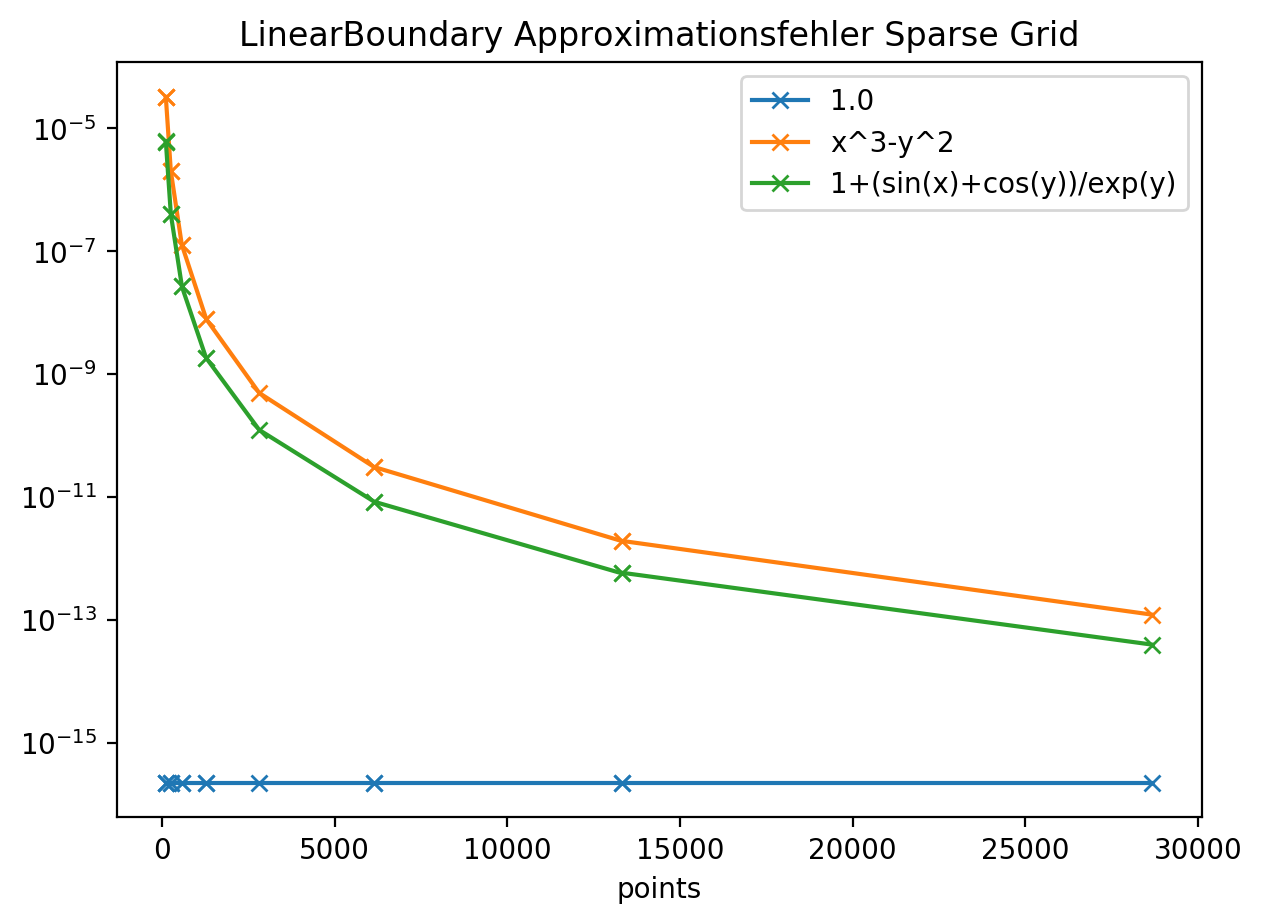

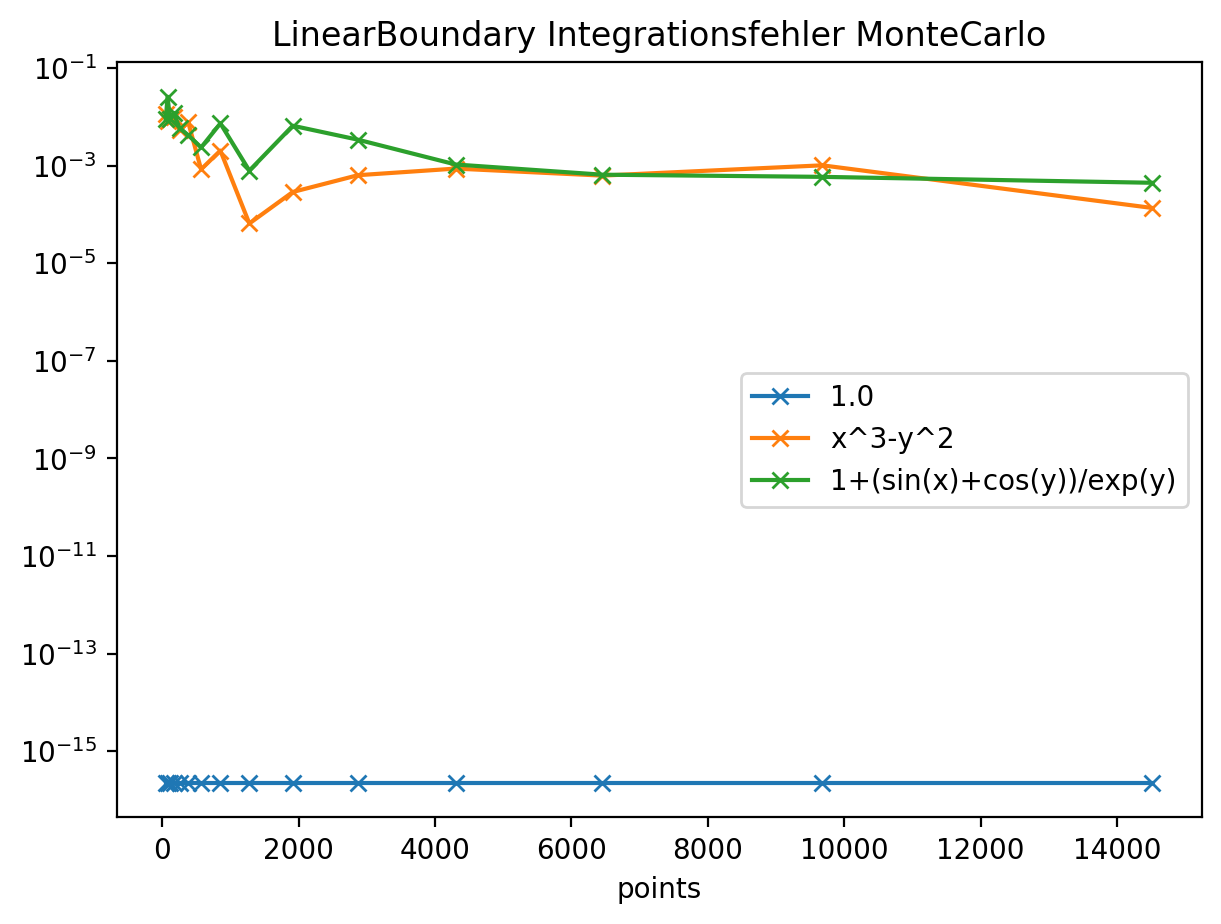

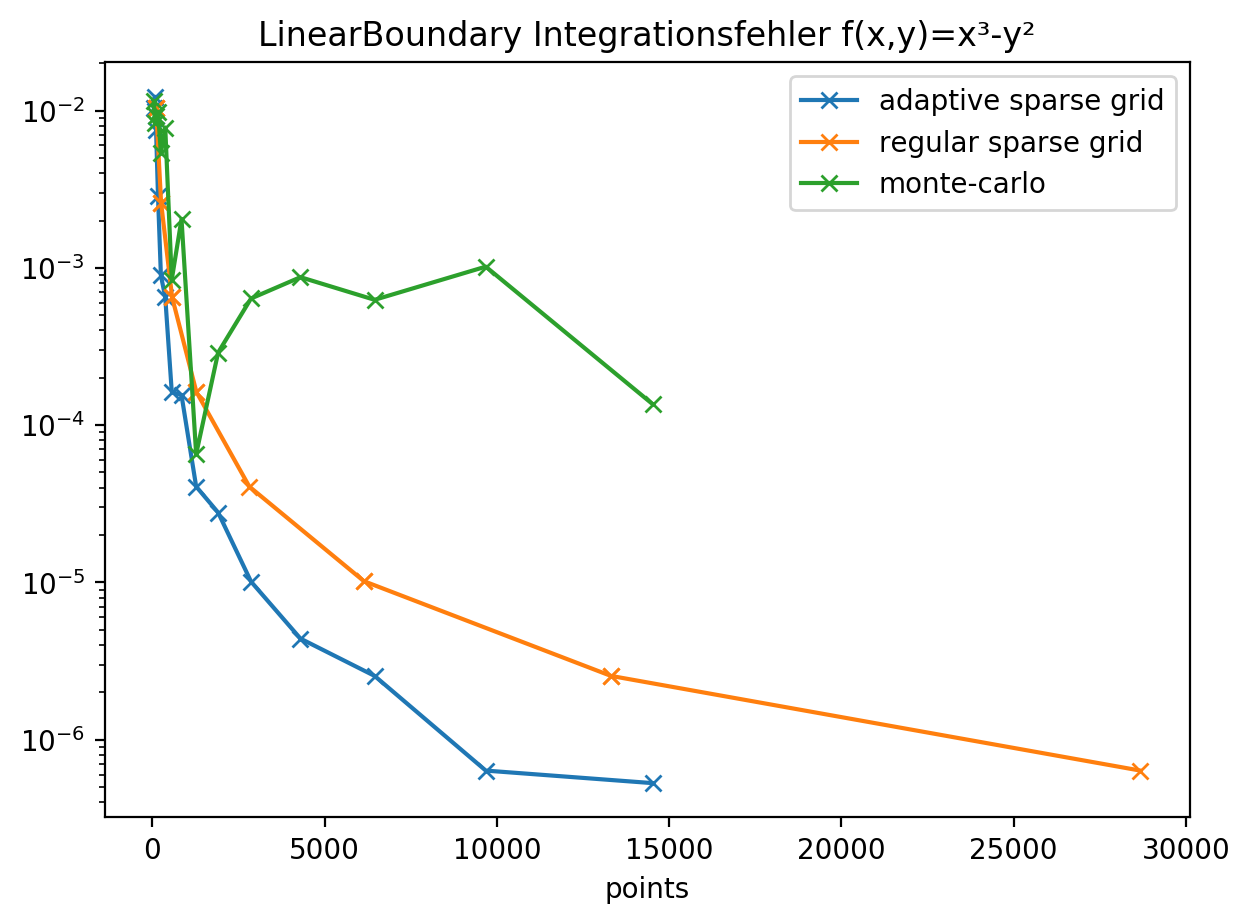

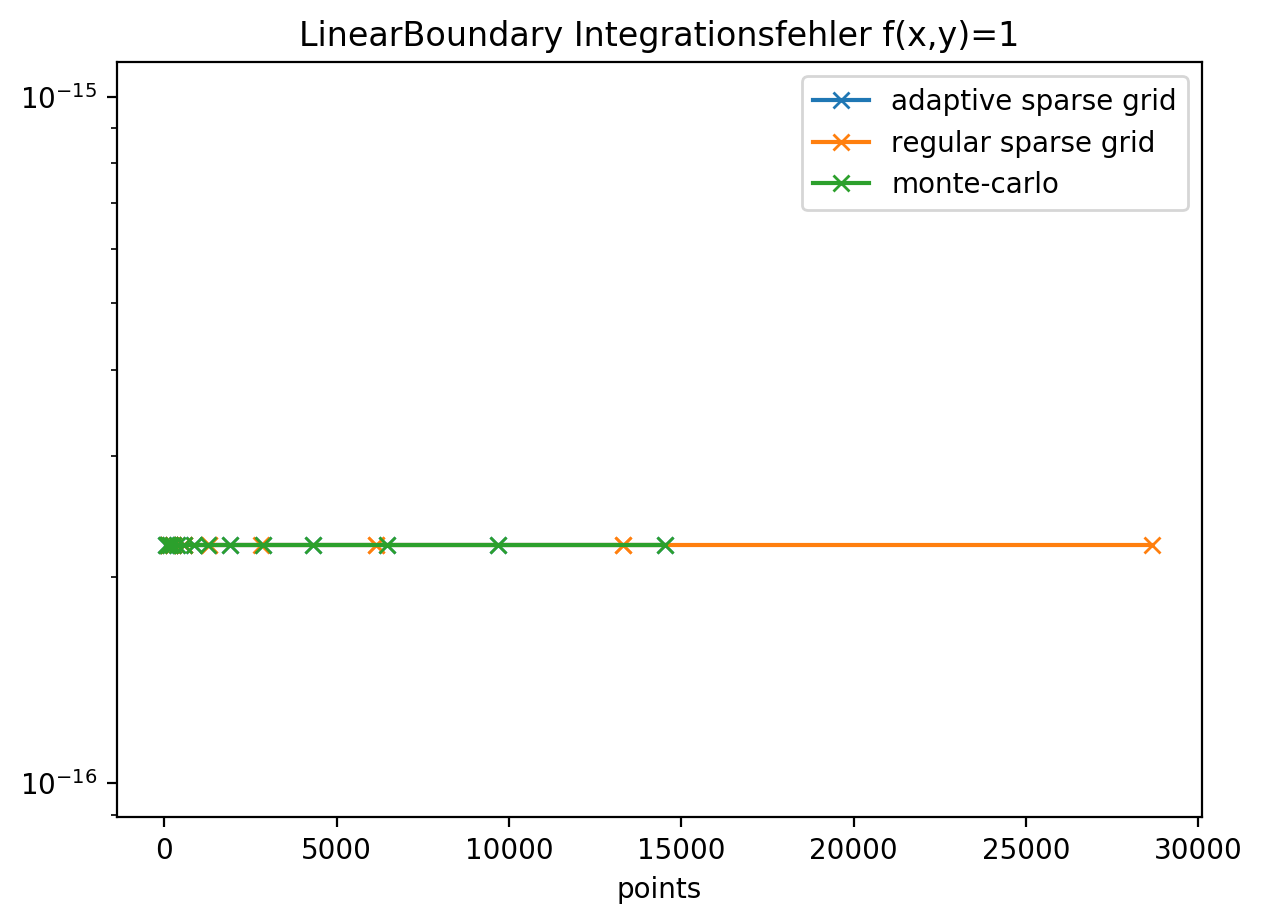

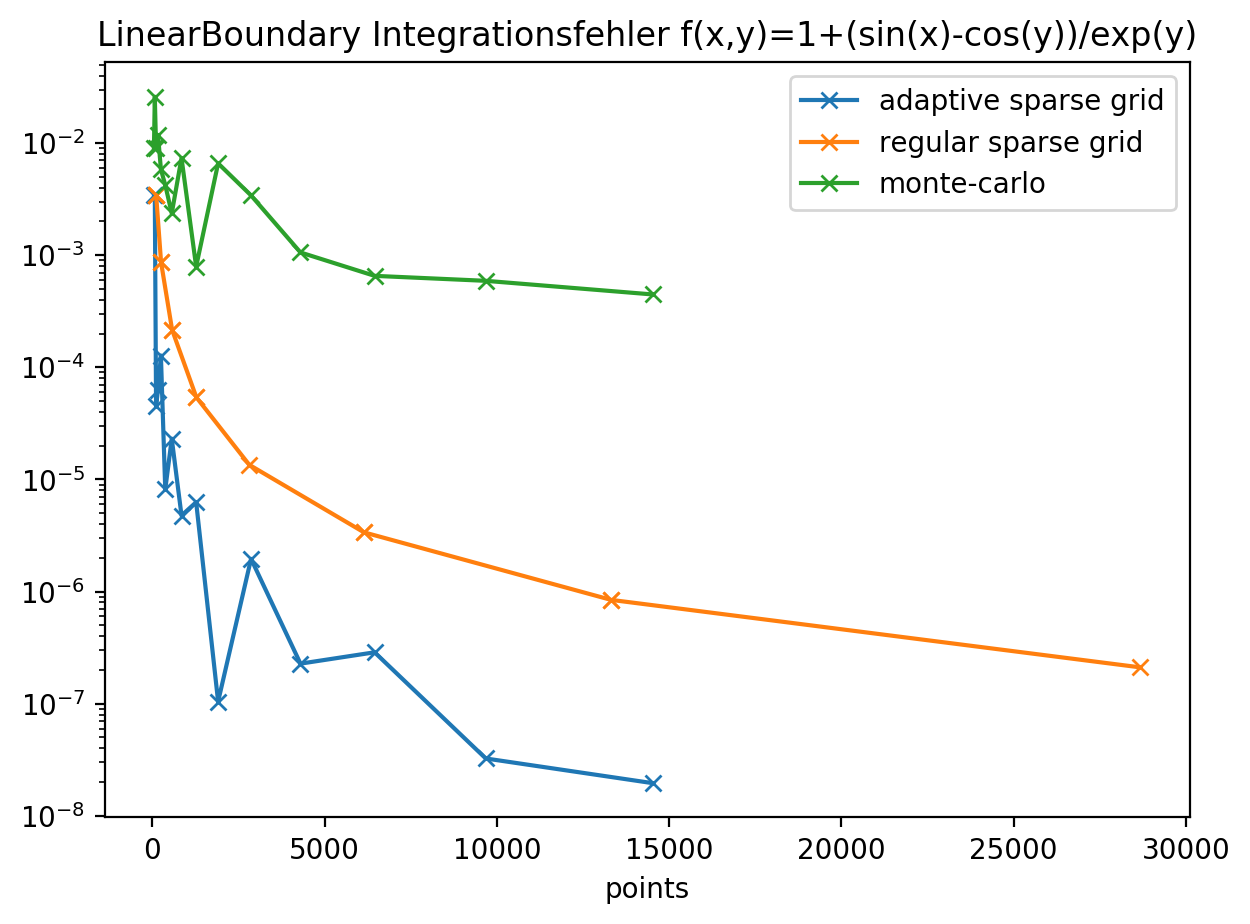

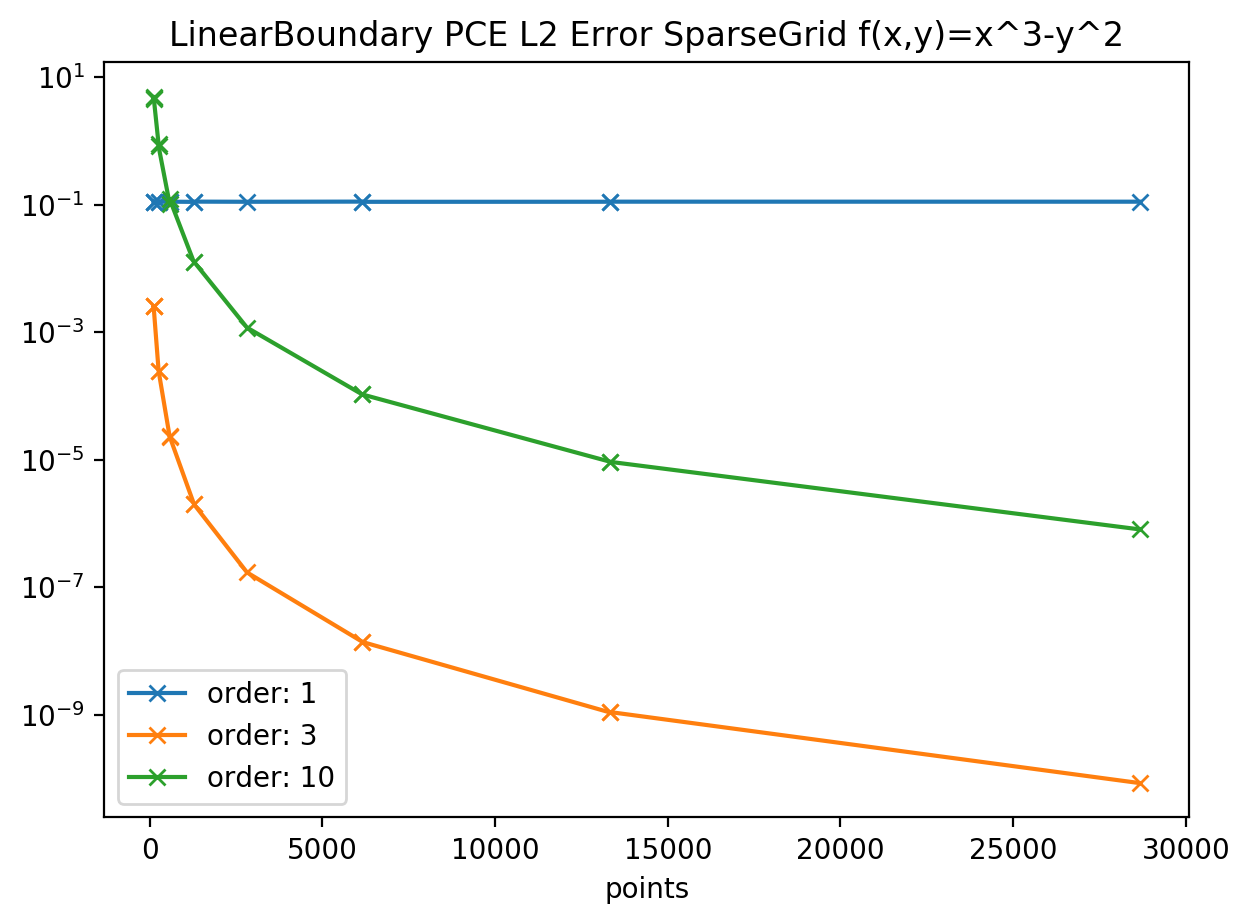

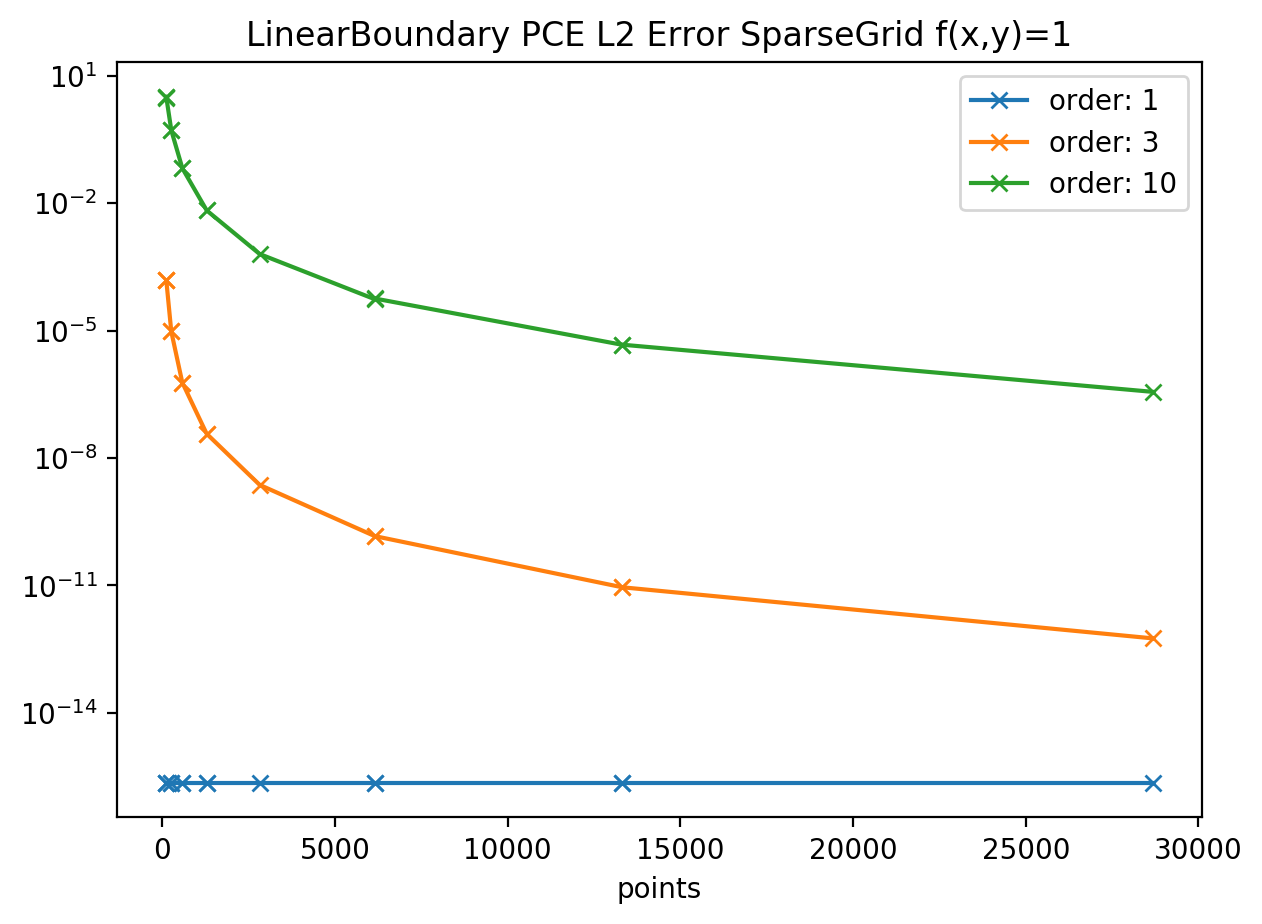

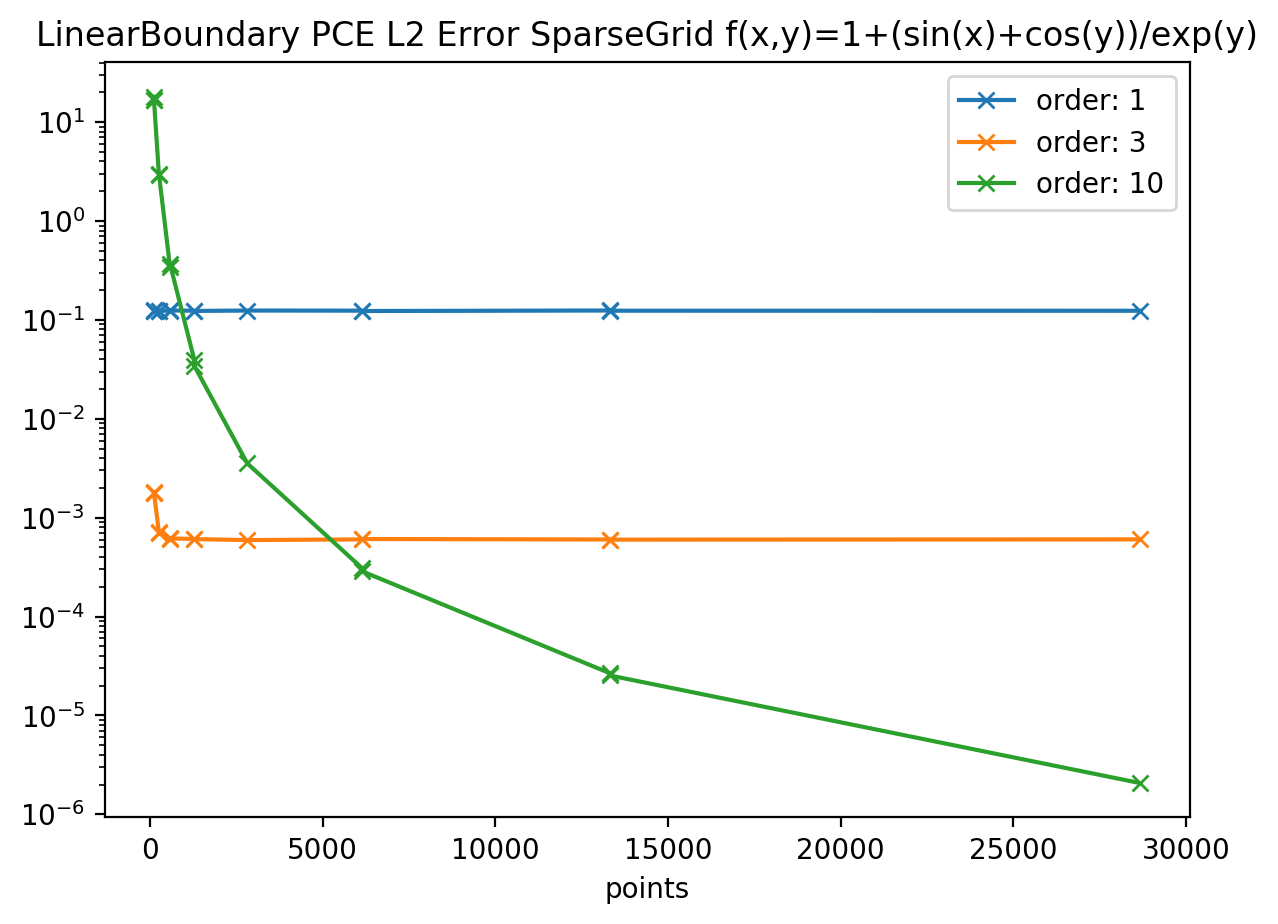

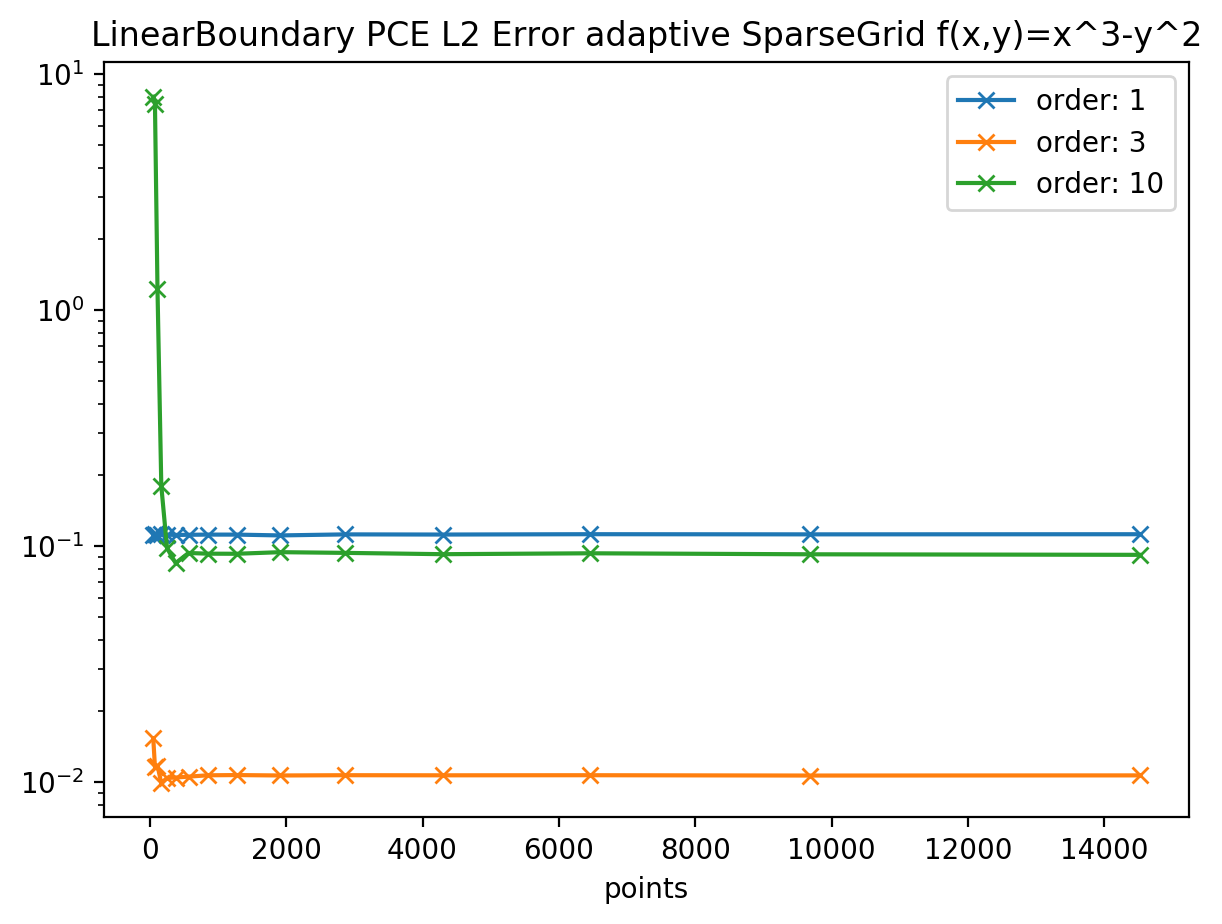

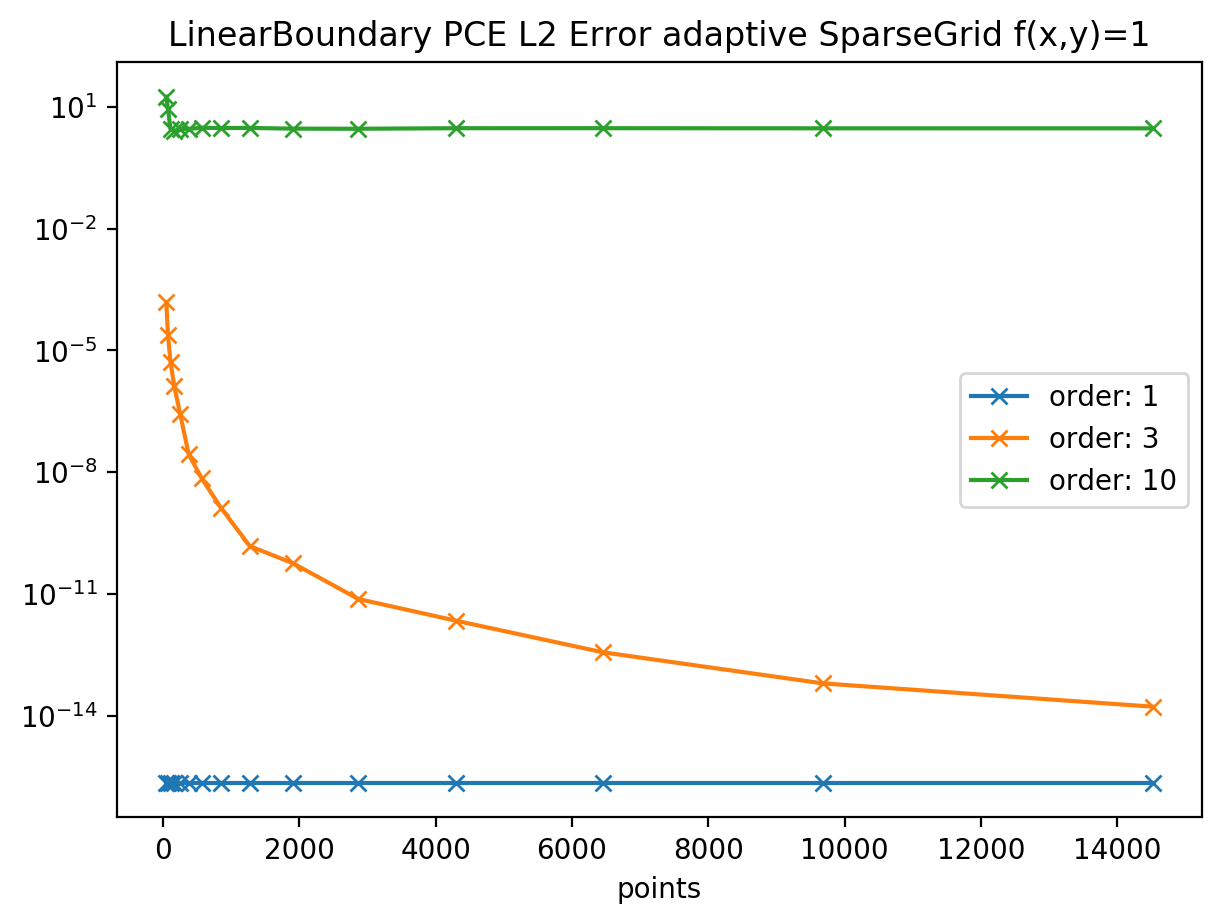

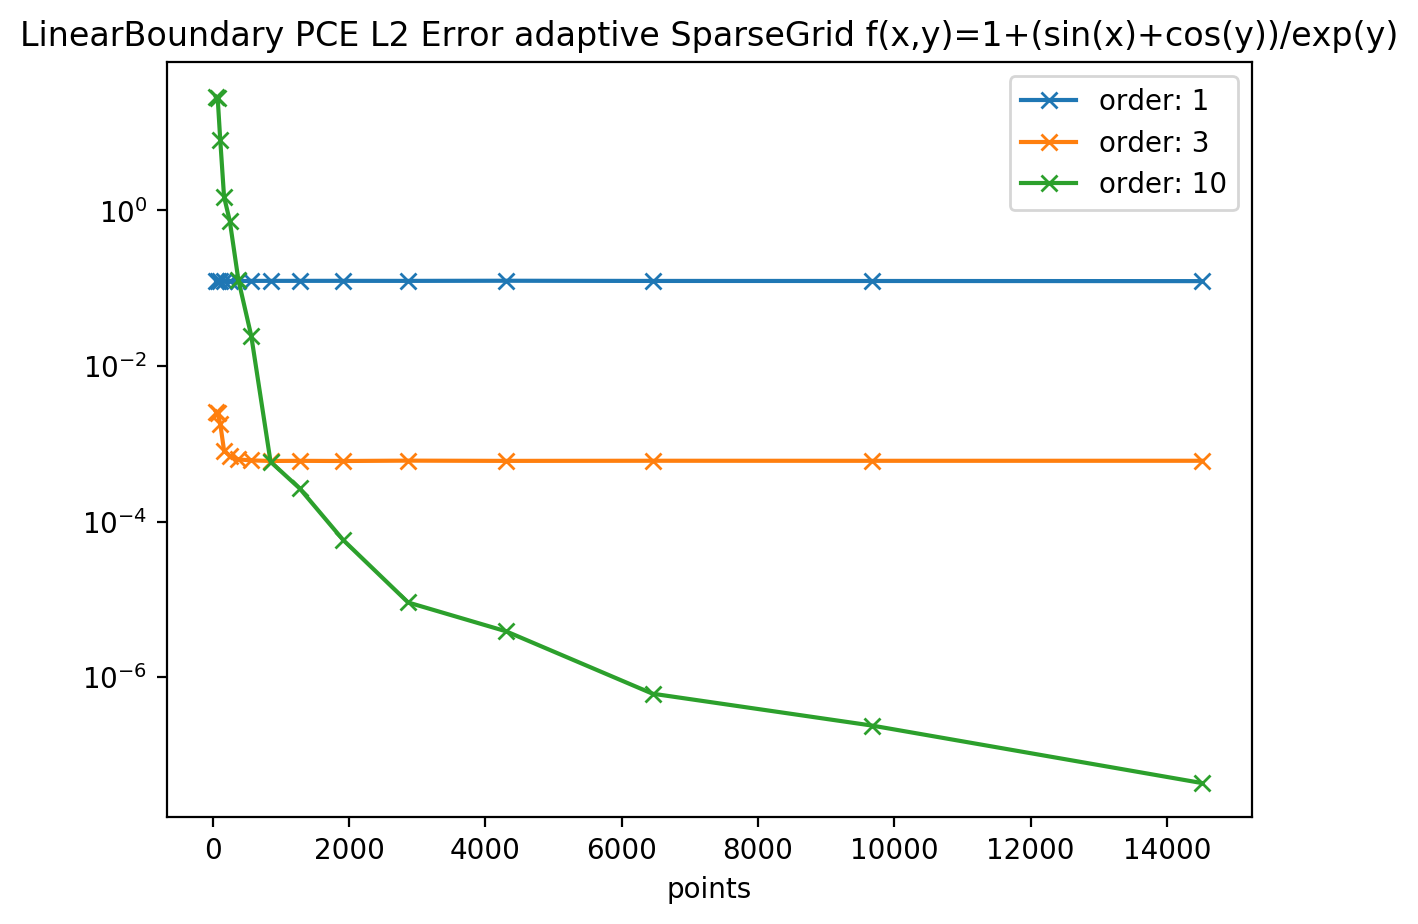

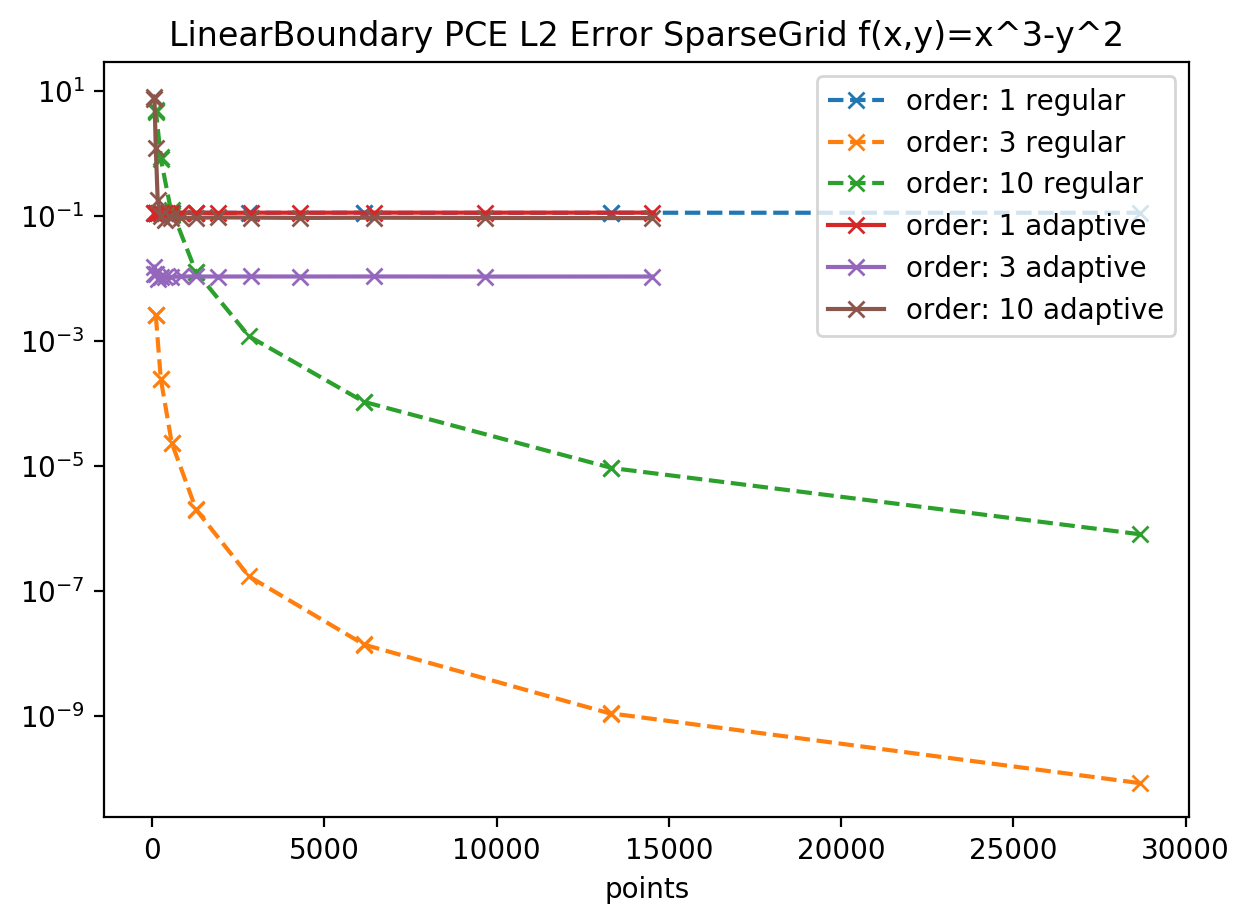

In [17]:
printer("LinearBoundary")

0           1            2            3           4   \
0    10.000000   20.000000    40.000000    80.000000  160.000000   
1    -1.500000   -1.500000    -1.375000    -1.345581   -1.336189   
2     4.000000    4.000000     4.000000     4.000000    4.000000   
3     7.812900    7.812900   -16.646896   -16.638213   -8.981699   
4     0.008003    0.007926     0.000517     0.000018    0.000001   
5     0.000000    0.000000     0.000000     0.000000    0.000000   
6   298.536483  297.619518   202.372909   185.822574  157.178449   
7    -1.500000   -1.500000    -1.375000    -1.343750   -1.335938   
8     4.000000    4.000000     4.000000     4.000000    4.000000   
9     7.812900    7.812900   -16.646896   -16.636607  -10.509021   
10    0.007935    0.007990     0.000513     0.000032    0.000002   
11    0.000000    0.000000     0.000000     0.000000    0.000000   
12  299.957412  301.246974   201.184606   181.425544  149.421821   
13         NaN         NaN          NaN          NaN         NaN   
14         NaN         NaN          NaN          NaN         NaN   
15         NaN         NaN          NaN          NaN         NaN   
16    0.133854    0.133221     0.113086     0.112195    0.111874   
17    0.271350    0.271546     0.026095     0.002580    0.000250   
18   11.497747   11.398504    12.012063     4.486076    0.898316   
19    0.000000    0.000000     0.000000     0.000000    0.000000   
20    0.038945    0.039041     0.002443     0.000152    0.000010   
21   11.910085   11.688672    10.133534     3.203984    0.526209   
22    0.127604    0.127730    37.669865    37.646732   21.217954   
23    0.282115    0.281822   132.919543   131.811863   74.301829   
24   55.091598   54.682183  1105.597432  1074.193168  598.619979   
25    0.132528    0.133485     0.112981     0.111828    0.112165   
26    0.270657    0.271919     0.029347     0.010721    0.009855   
27   11.285415   11.220807    24.018736     5.052084    0.176689   
28    0.000000    0.000000     0.000000     0.000000    0.000000   
29    0.039120    0.038774     0.002442     0.000024    0.000001   
30   11.770016   11.986314    20.406497     5.470237    2.740580   
31    0.128272    0.128771    37.657146    37.640080   17.871241   
32    0.283203    0.284267   133.089933   132.343684   60.091336   
33   55.387216   56.962976  1119.828345  1065.967757  392.043565   

              5             6             7              8              9   \
0   3.200000e+02  6.400000e+02  1.280000e+03   2.560000e+03   5.120000e+03   
1  -1.333949e+00 -1.333496e+00 -1.333374e+00  -1.333344e+00  -1.333336e+00   
2   4.000000e+00  4.000000e+00  4.000000e+00   4.000000e+00   4.000000e+00   
3  -5.057865e+00 -3.305301e+00 -2.915012e+00   2.195188e+01   2.499932e+01   
4   9.988393e-08  6.298778e-09  4.376998e-10   2.874700e-11   1.752200e-12   
5   0.000000e+00  0.000000e+00  0.000000e+00   0.000000e+00   0.000000e+00   
6   1.424370e+02  1.250111e+02  1.168788e+02   5.328505e+03   1.972463e+03   
7  -1.333984e+00 -1.333496e+00 -1.333496e+00  -1.333374e+00  -1.333344e+00   
8   4.000000e+00  4.000000e+00  4.000000e+00   4.000000e+00   4.000000e+00   
9  -4.383373e+00  2.105390e-01  2.105390e-01   3.273079e+00   5.187152e+00   
10  1.271849e-07  7.985910e-09  7.943986e-09   4.973124e-10   3.098460e-11   
11  0.000000e+00  0.000000e+00  0.000000e+00   0.000000e+00   0.000000e+00   
12  1.082208e+02  7.074849e+01  6.930357e+01   4.436328e+01   2.773109e+01   
13           NaN           NaN           NaN            NaN            NaN   
14           NaN           NaN           NaN            NaN            NaN   
15           NaN           NaN           NaN            NaN            NaN   
16  1.109851e-01  1.115870e-01  1.117092e-01   1.120802e-01   1.117518e-01   
17  2.290936e-05  1.995977e-06  2.033460e-06   1.684226e-07   1.369367e-08   
18  1.129586e-01  1.231396e-02  1.240061e-02   1.233657e-03   1.227696e-04   
19  0.000000e+00  0.000000e+00  0.000000e+00   0.000000e+00   0.000000e

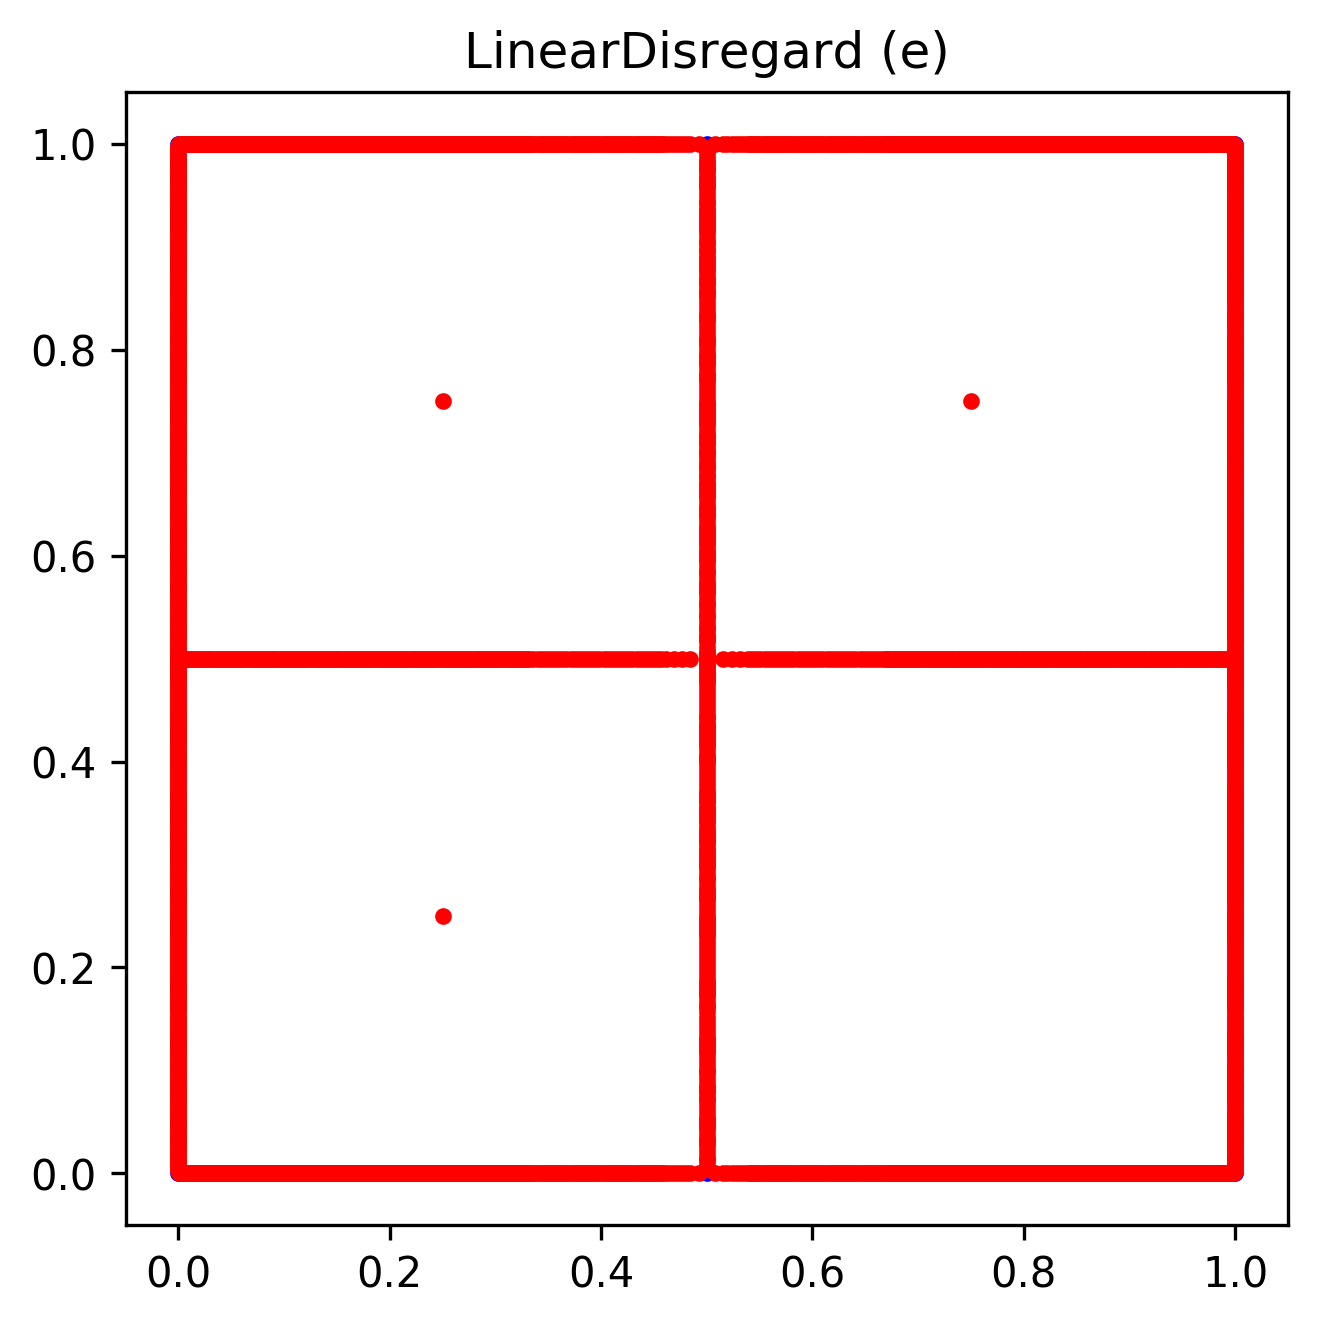

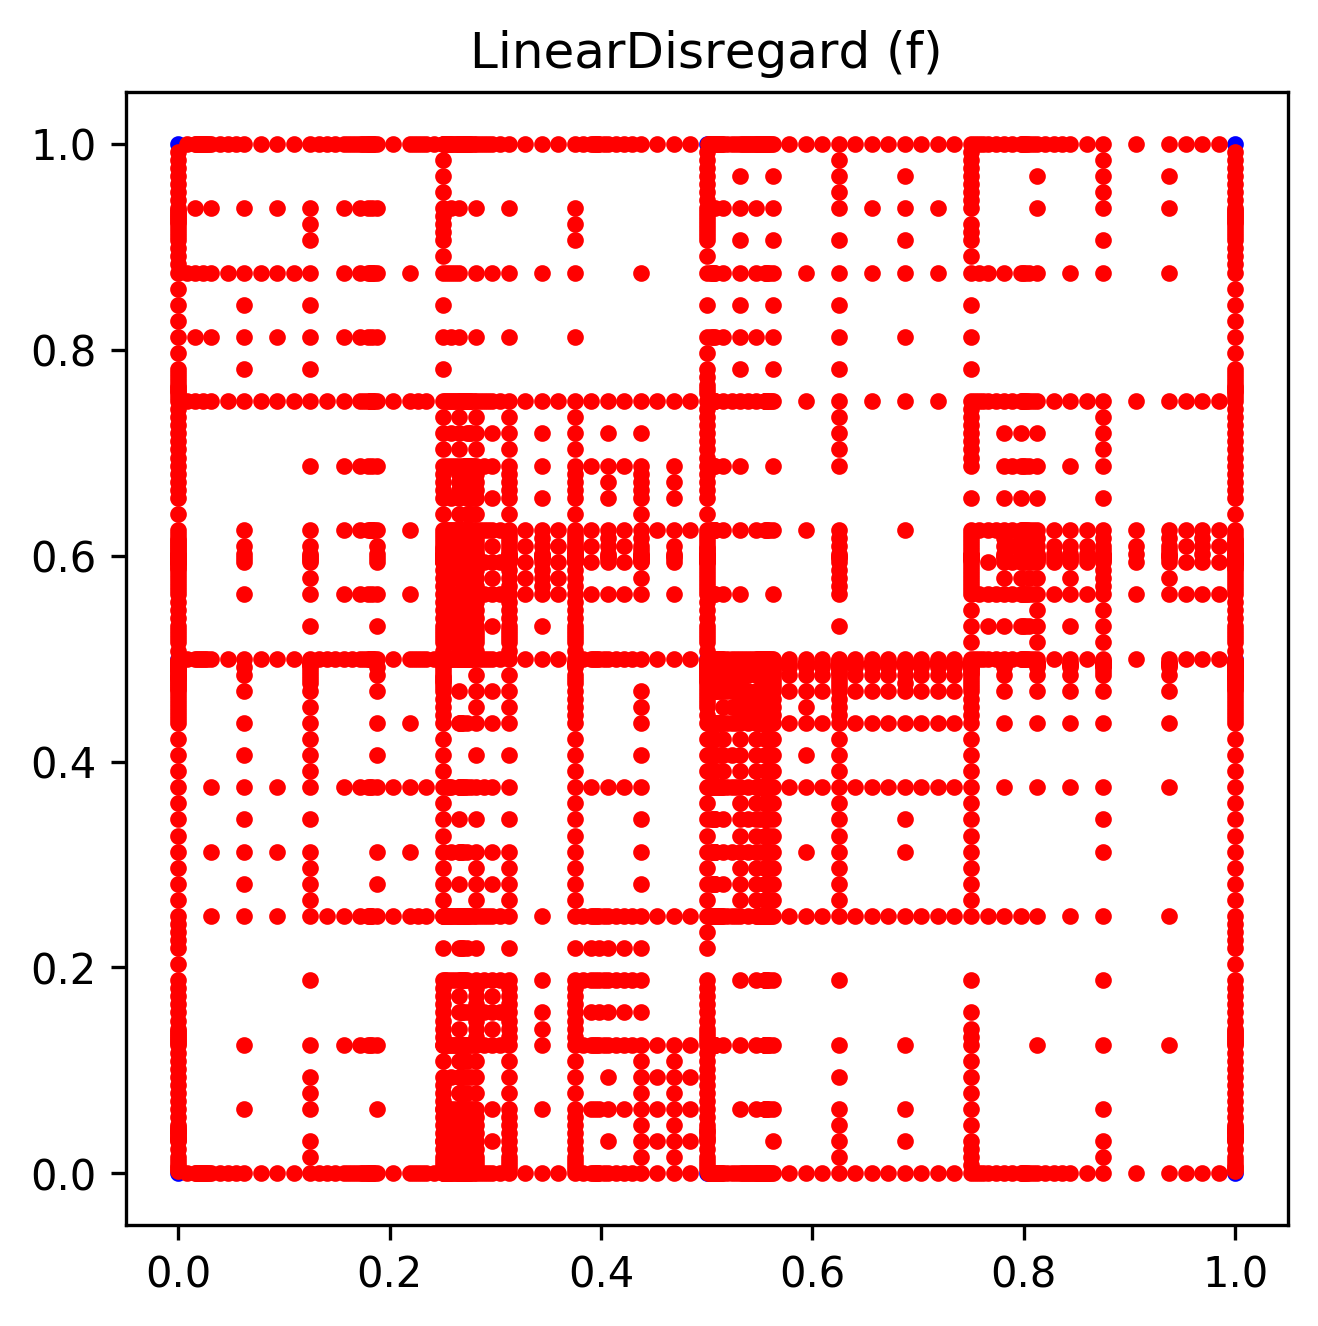

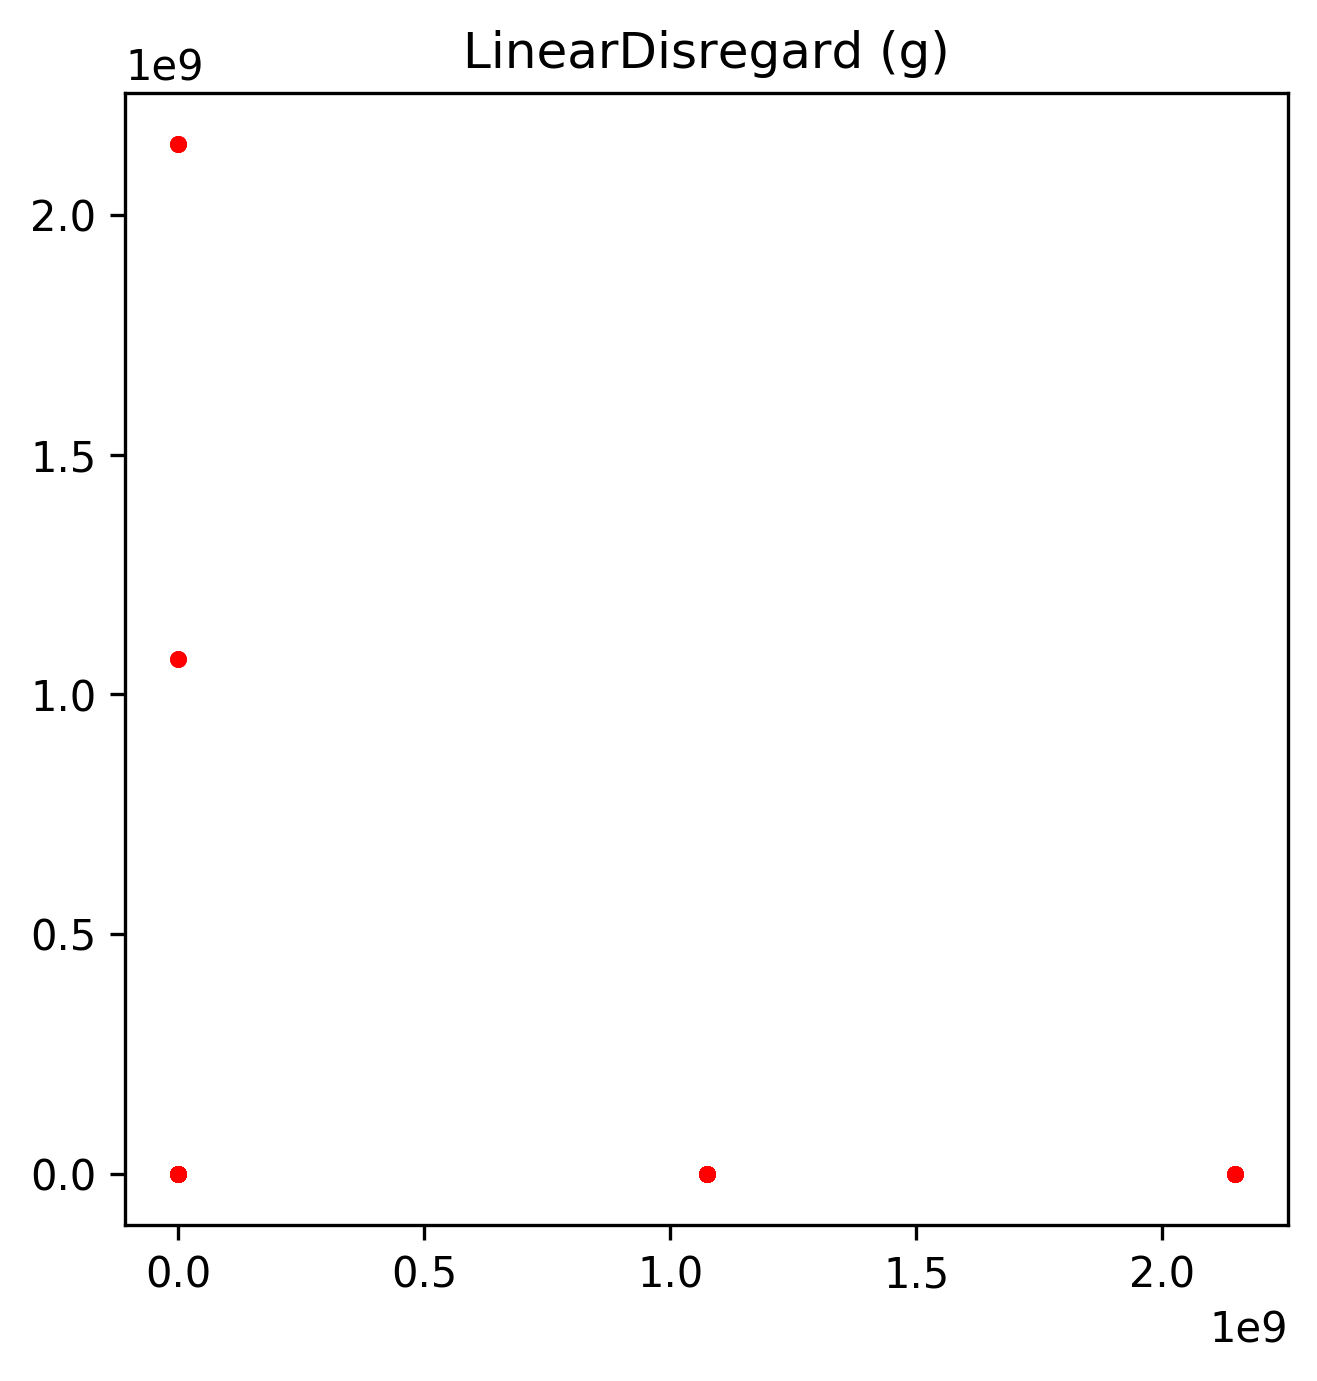

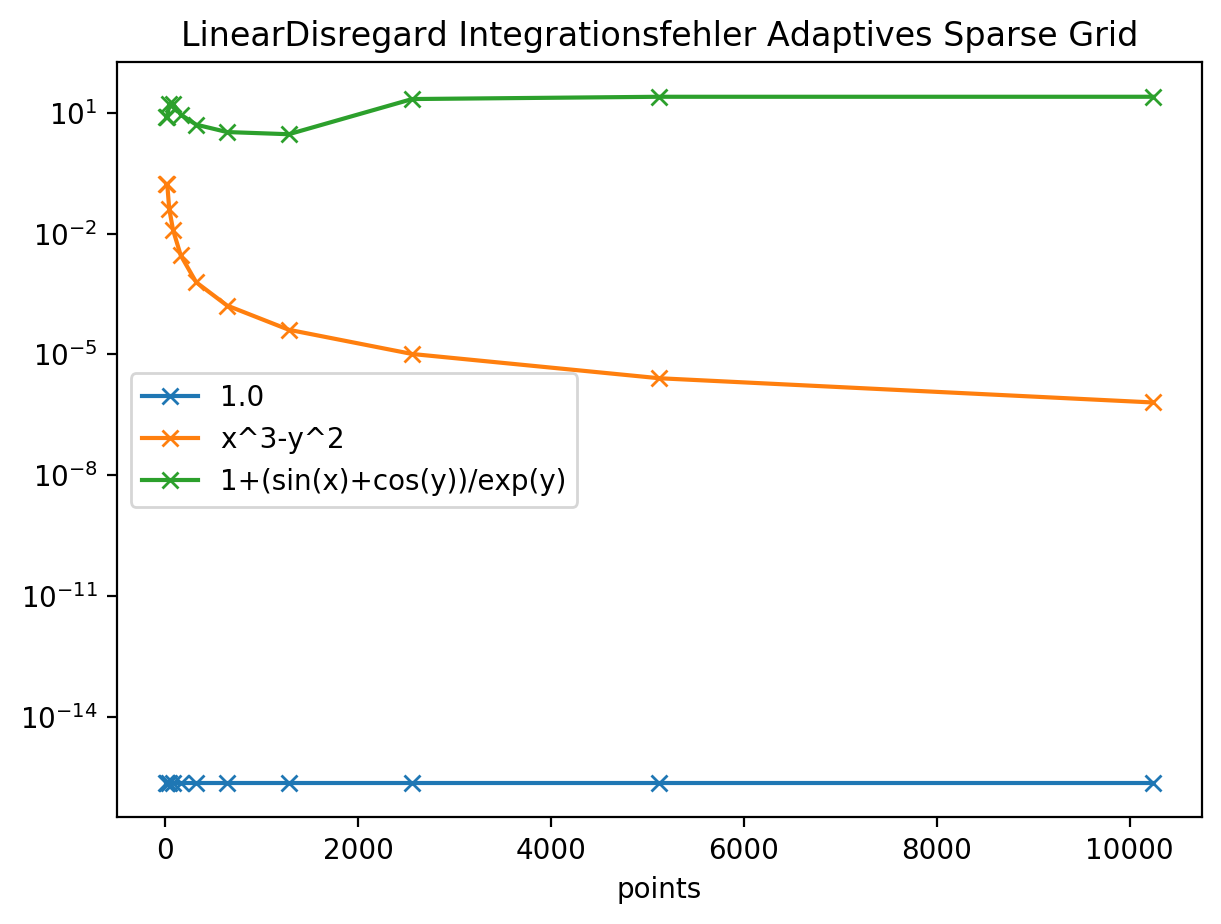

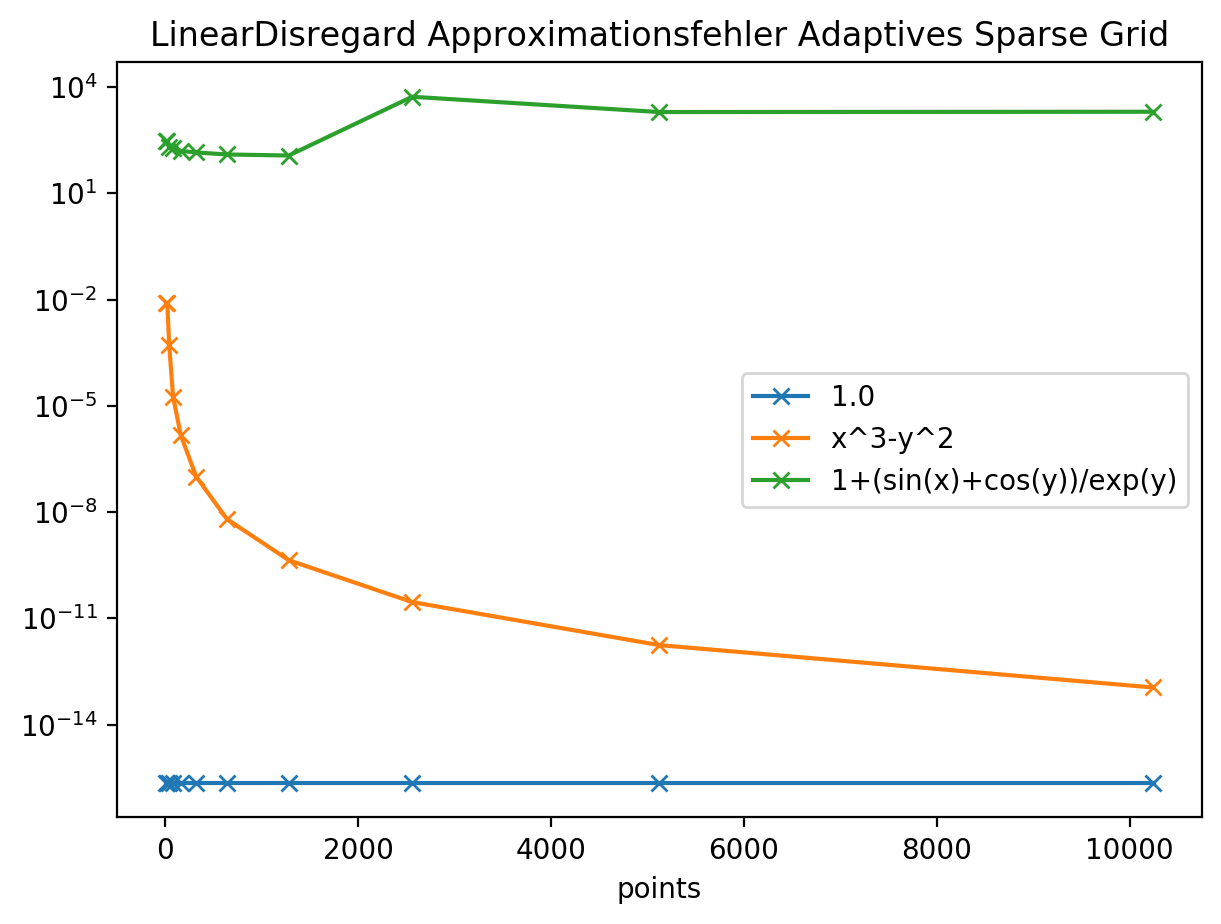

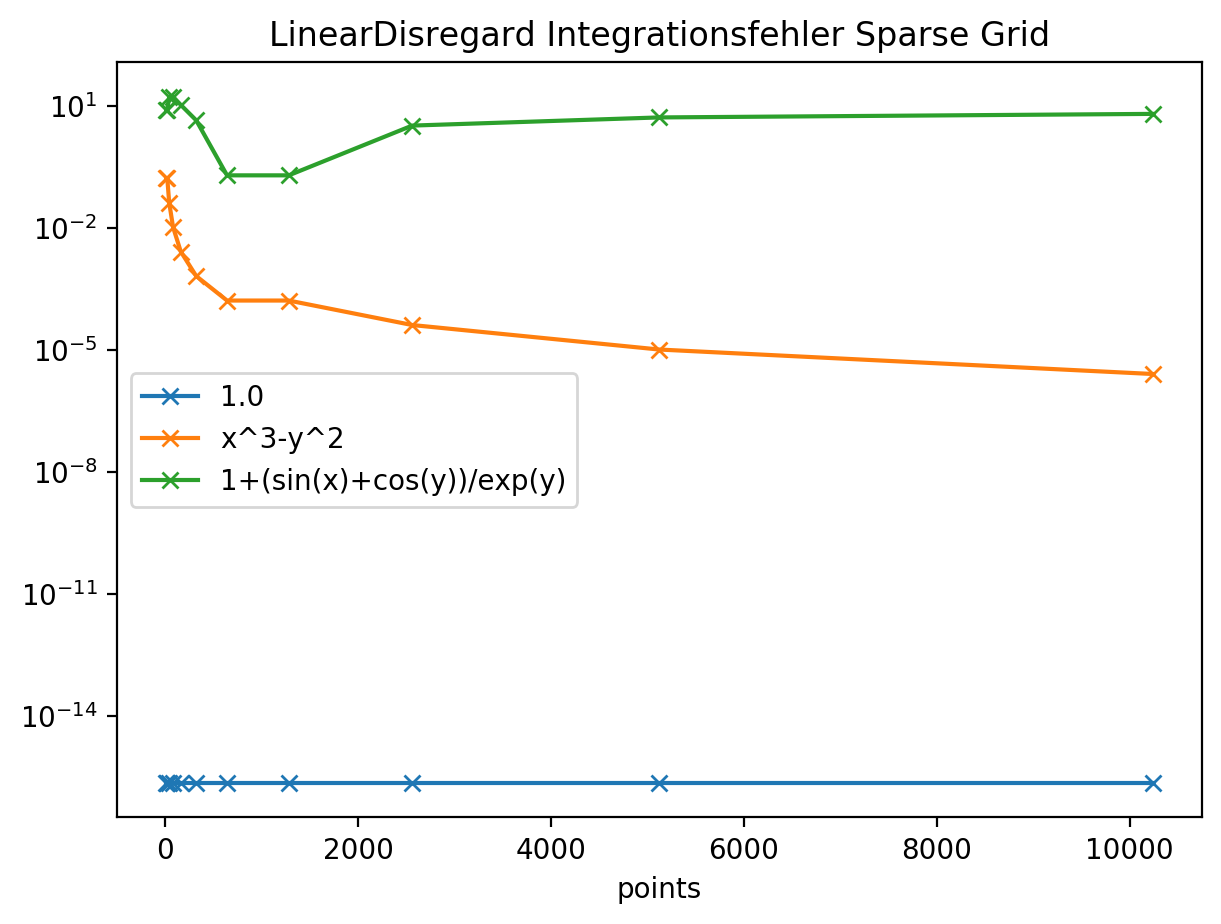

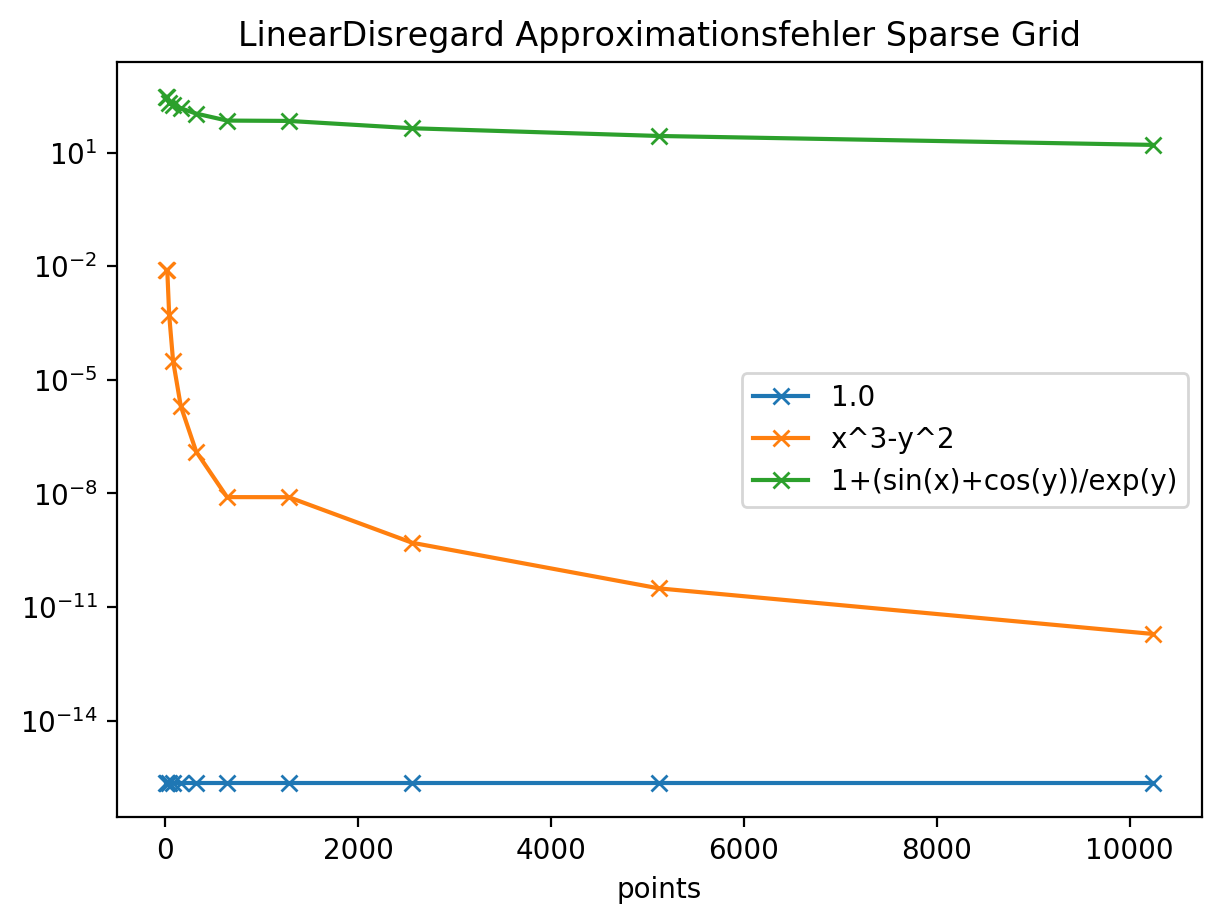

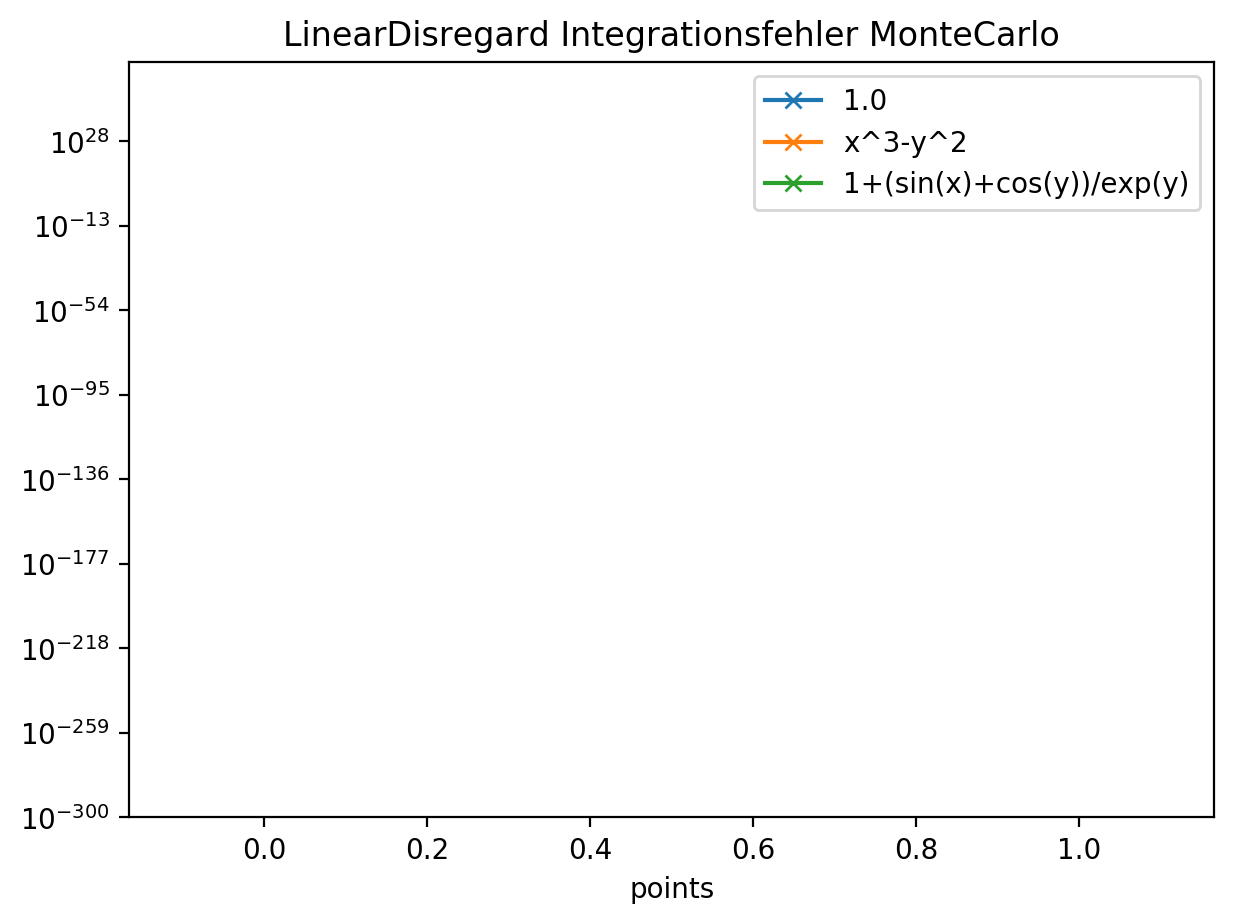

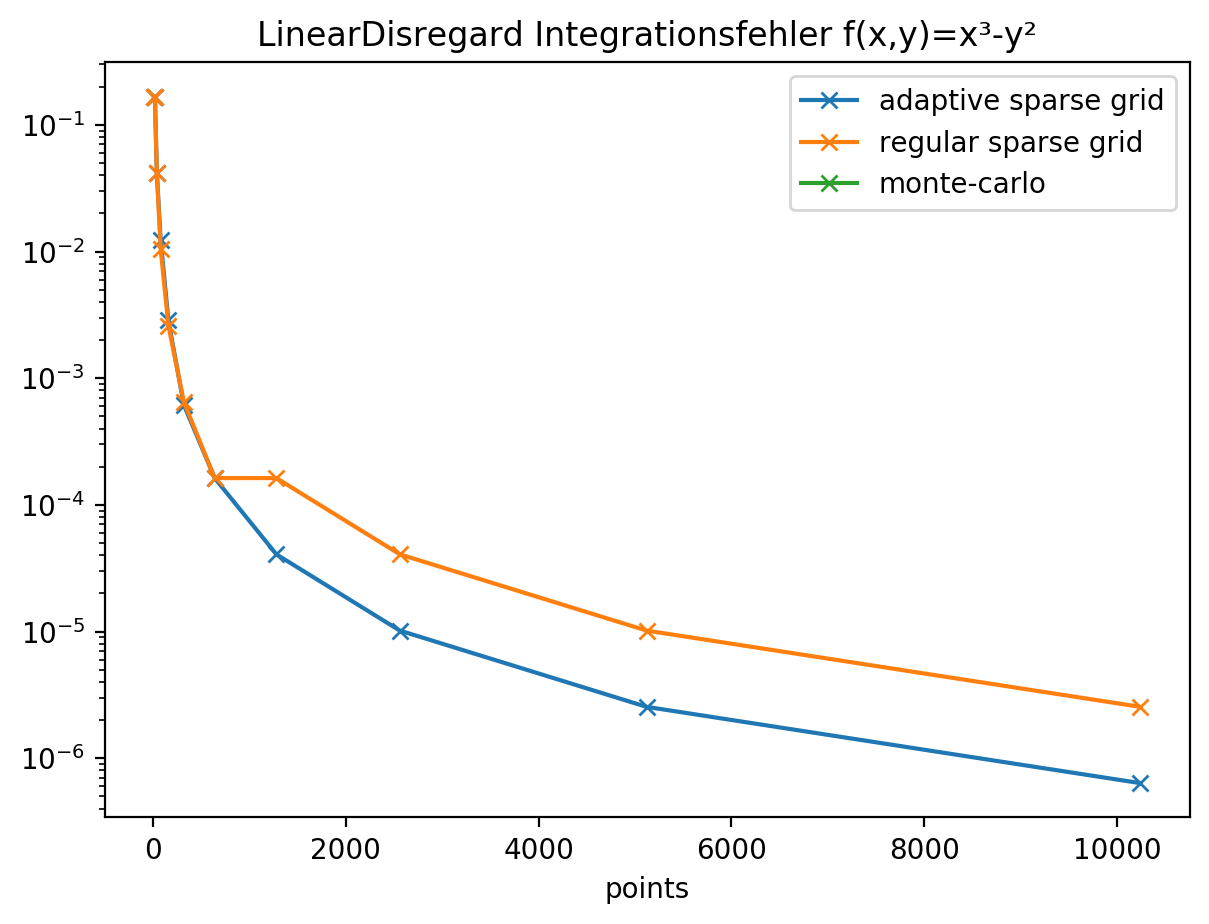

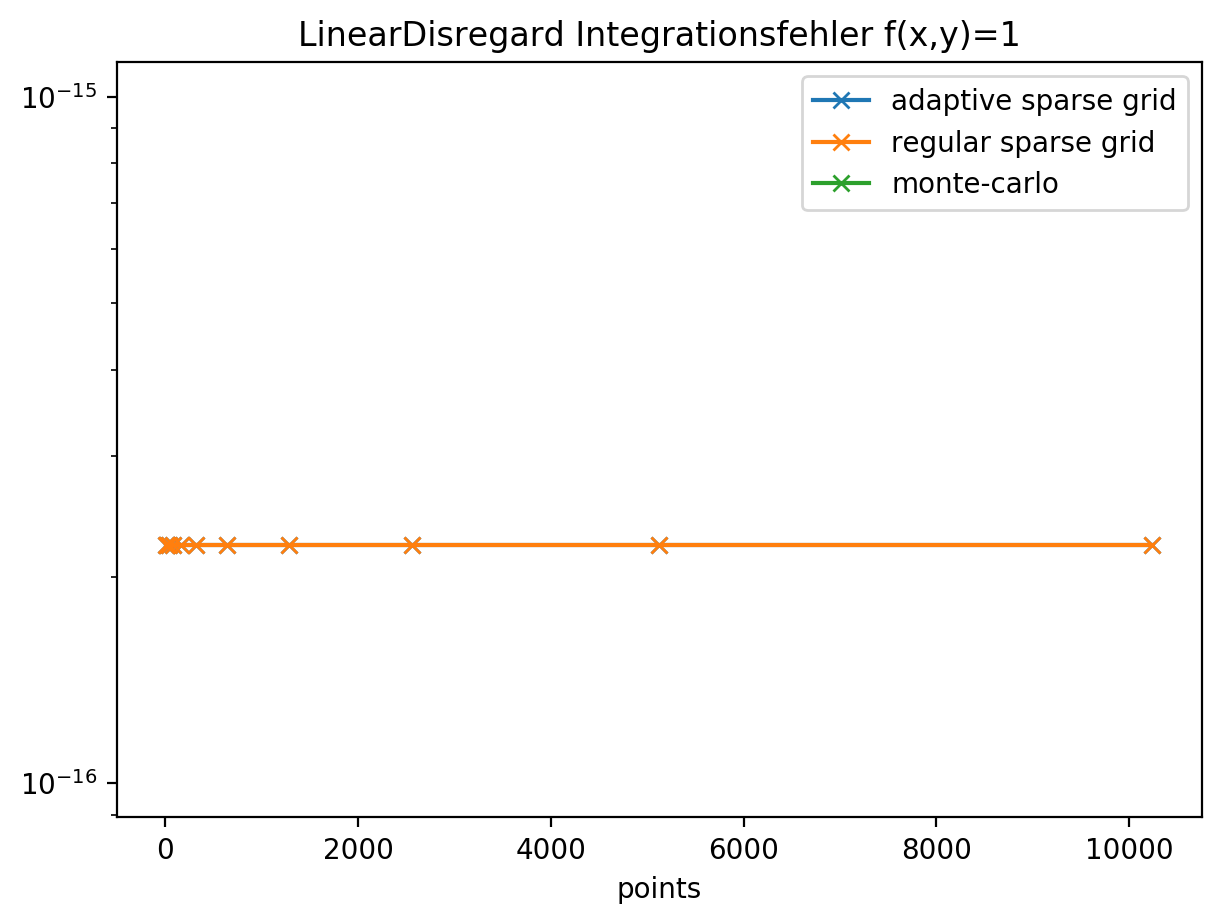

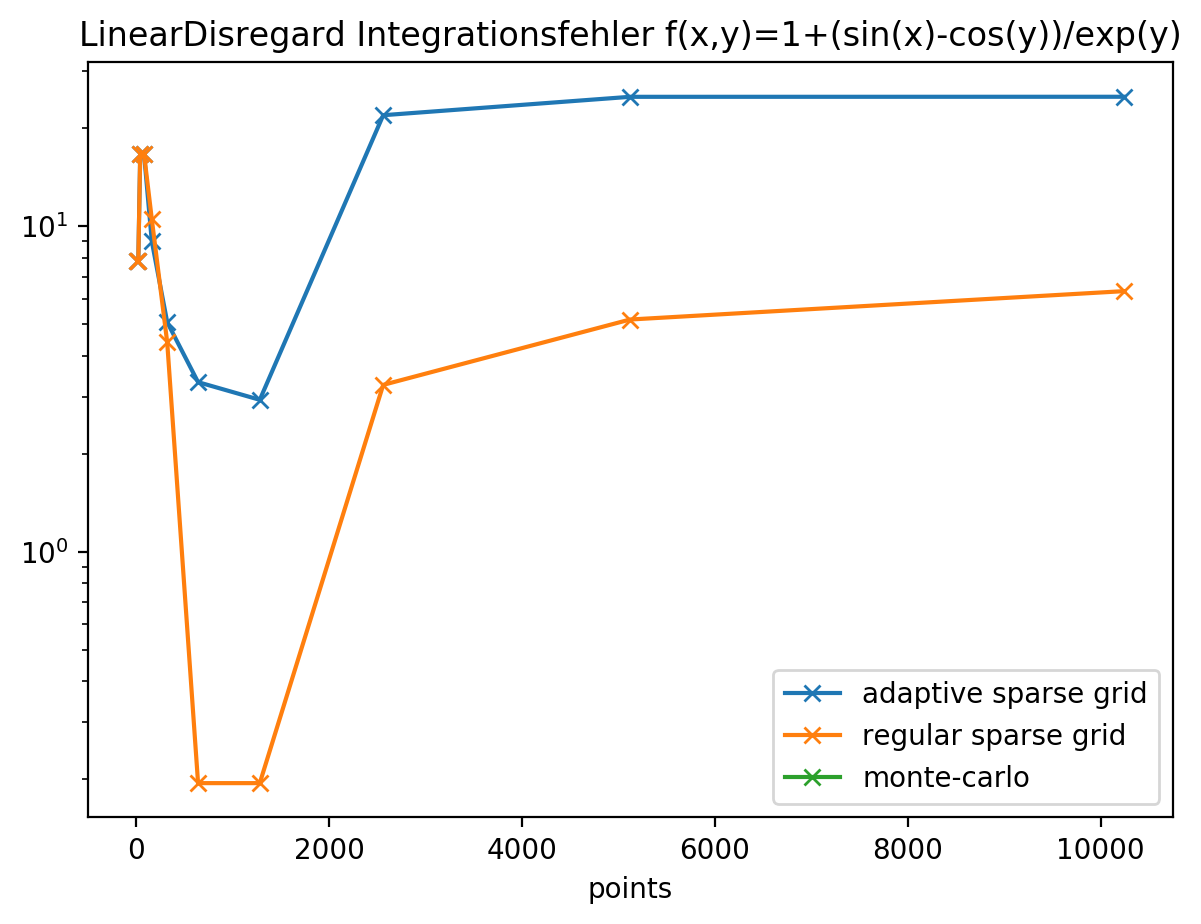

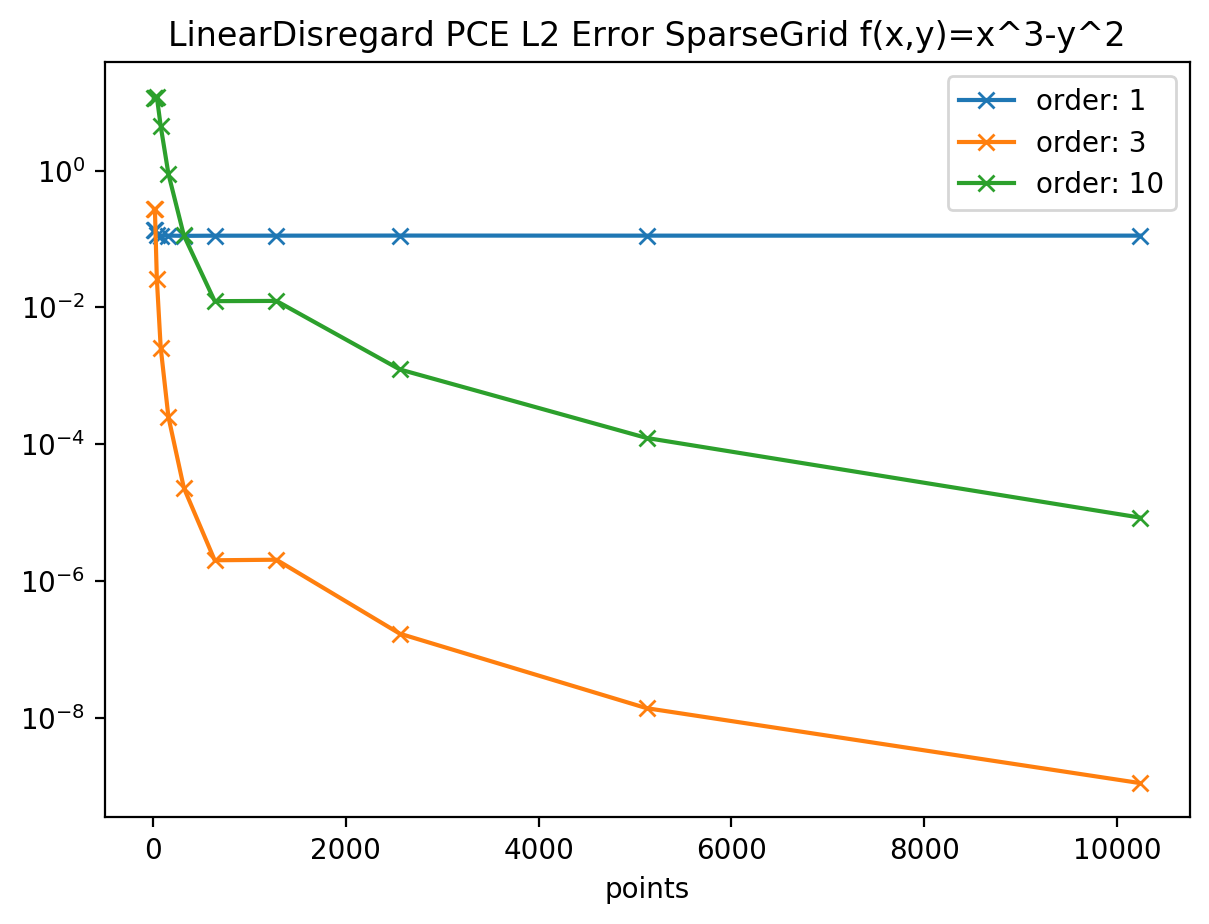

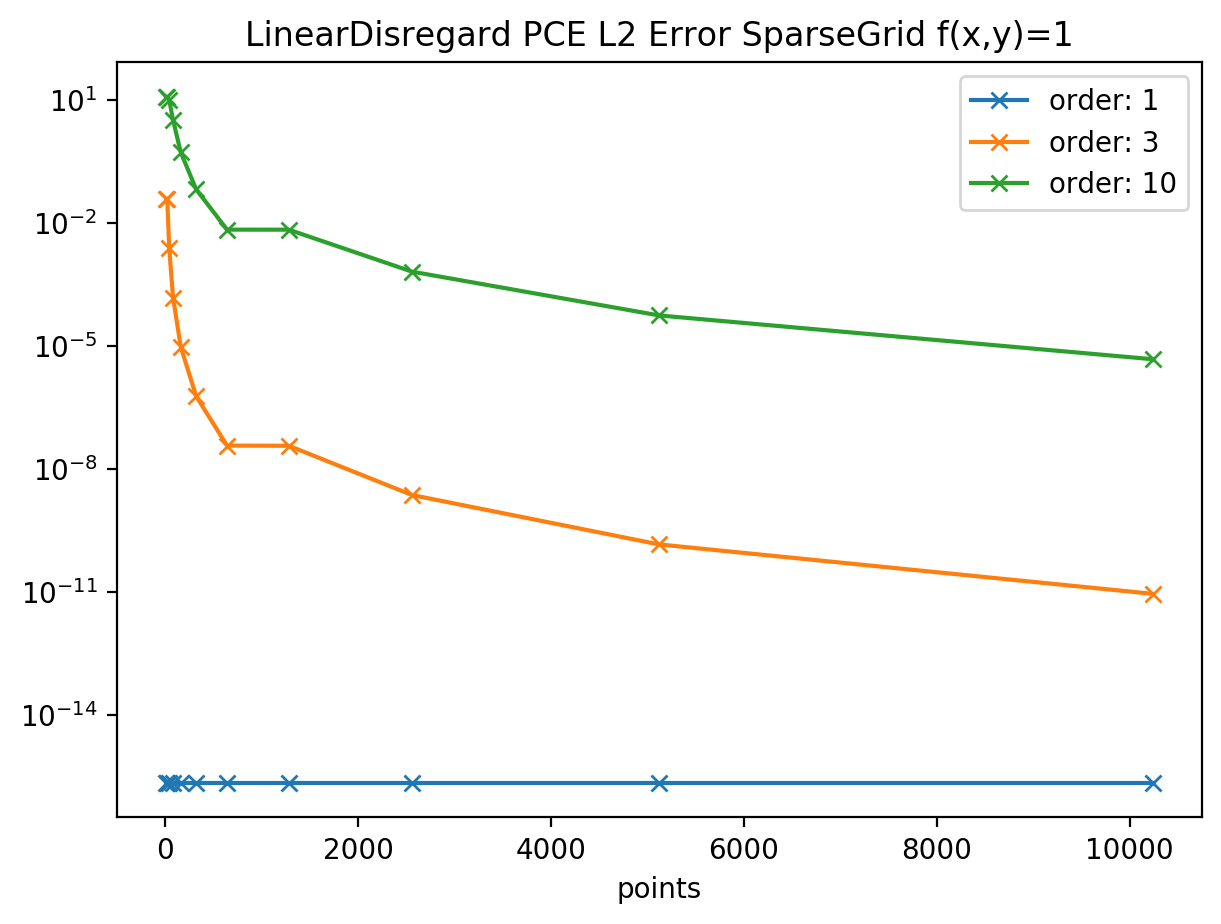

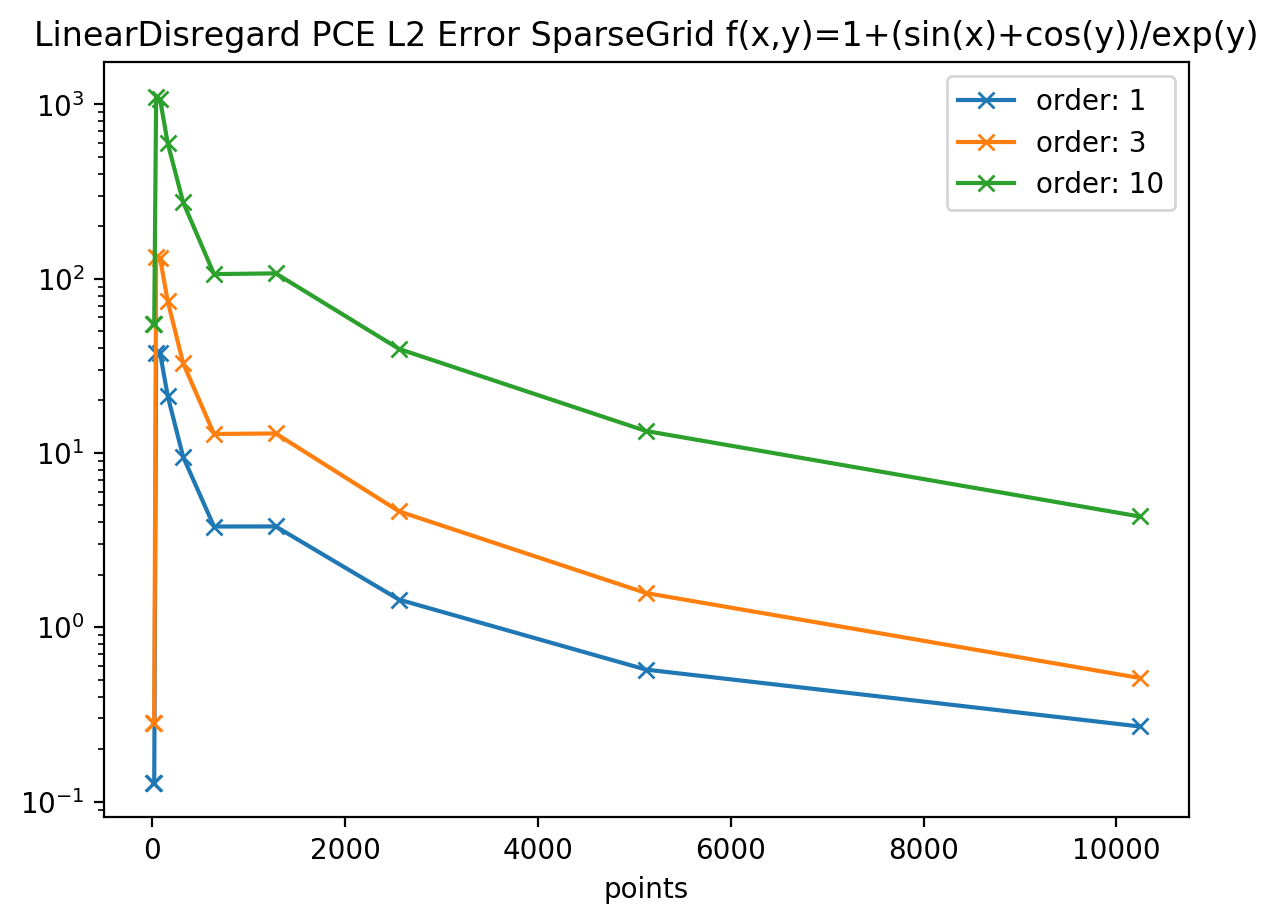

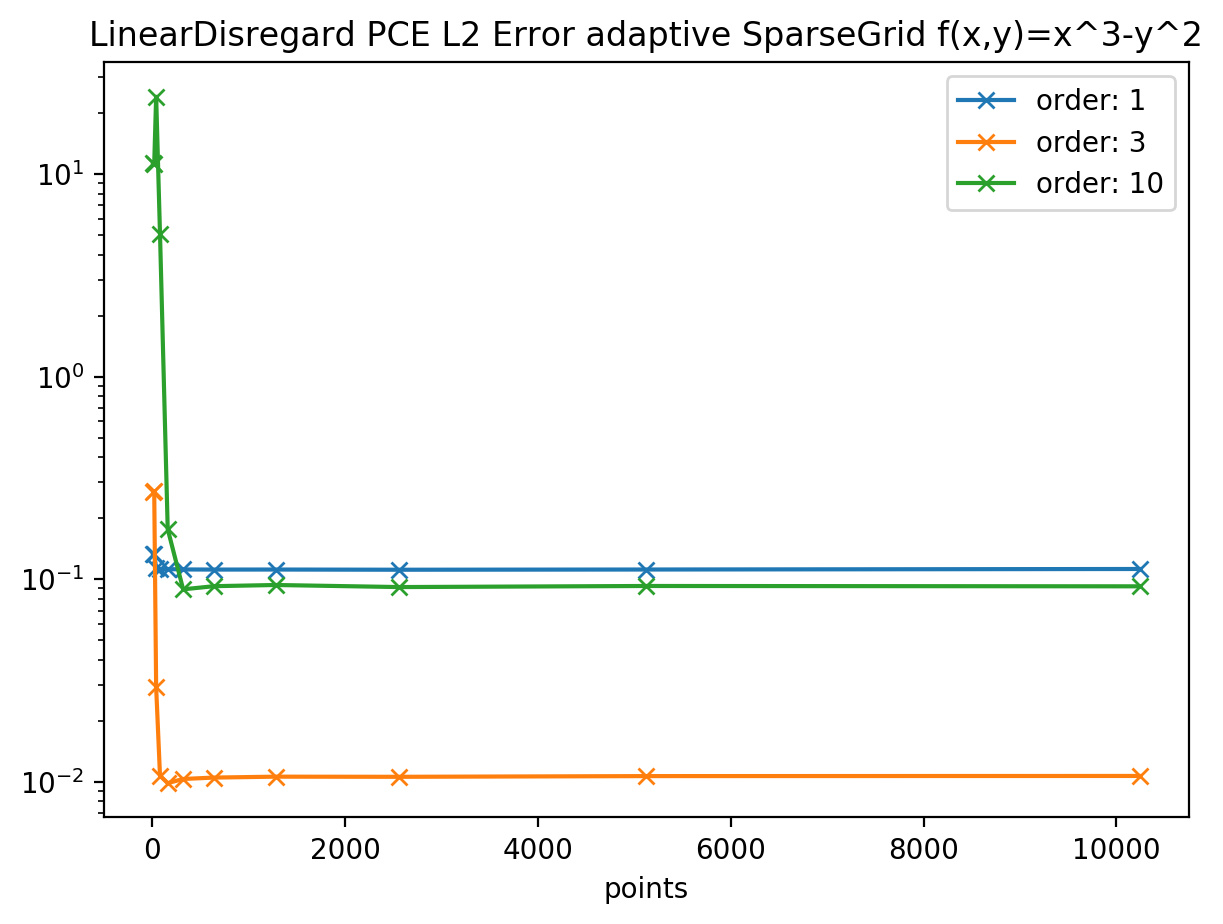

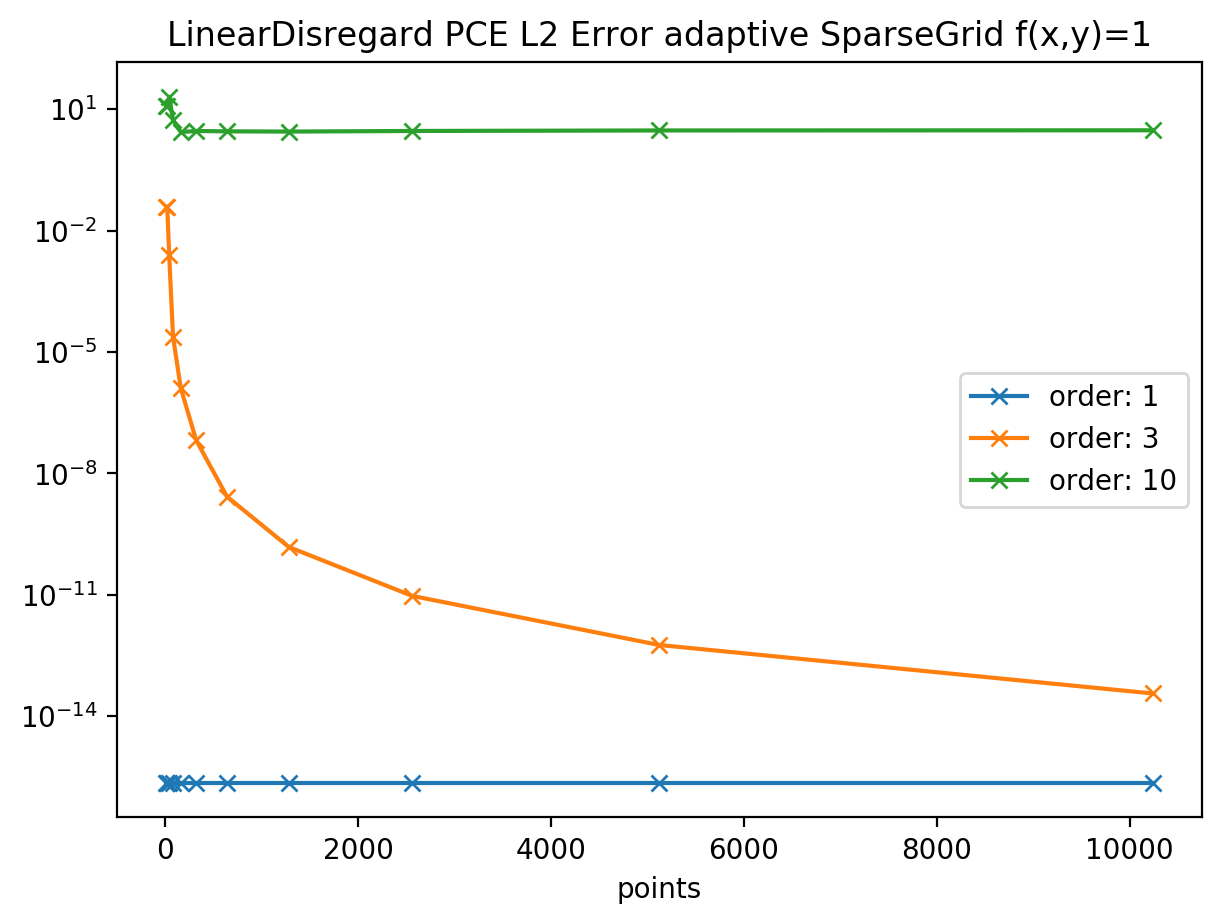

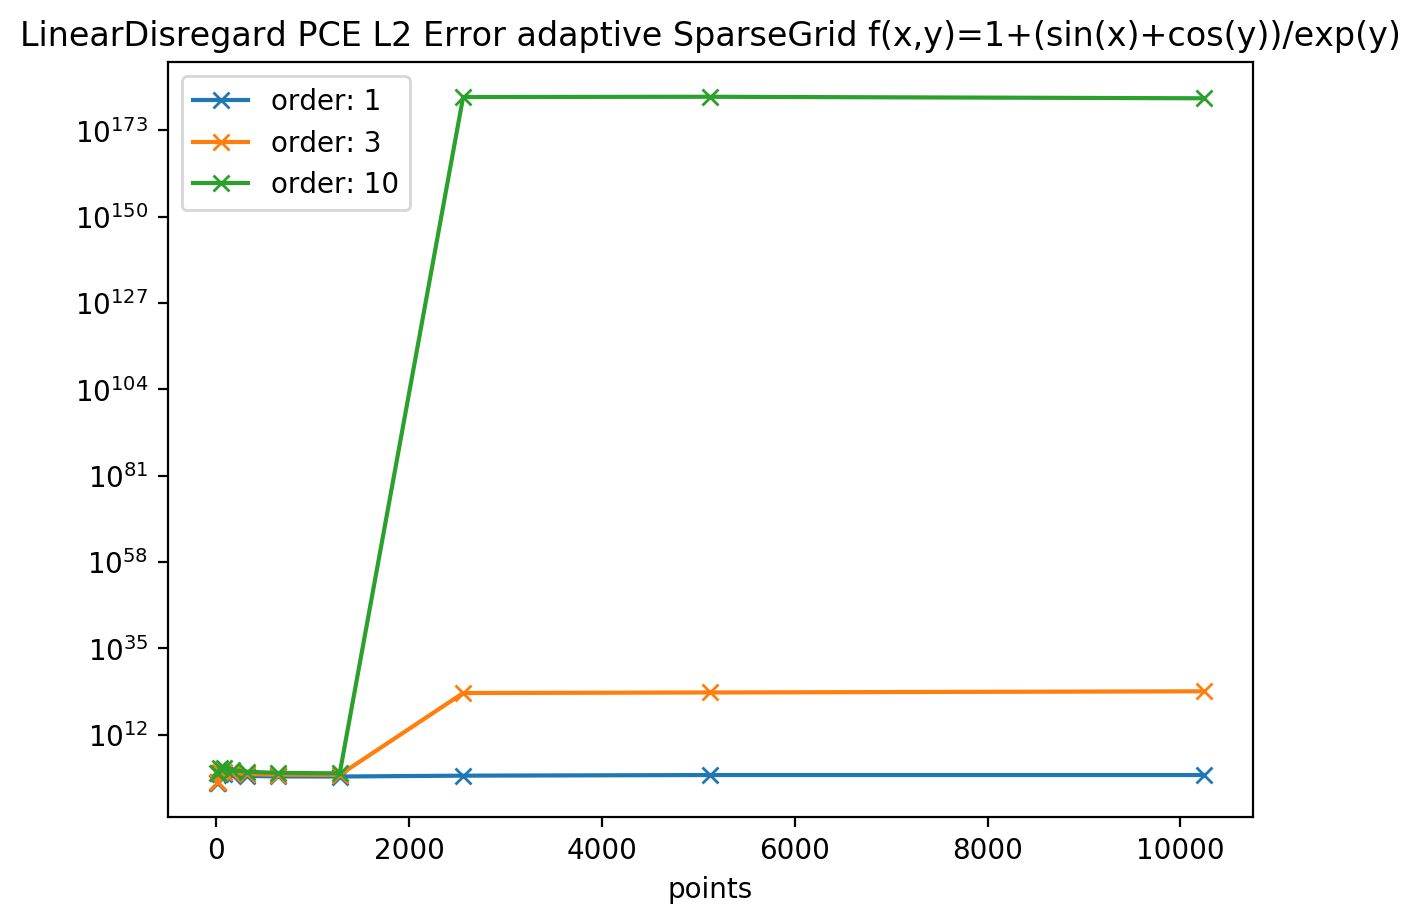

In [21]:
printer("LinearDisregard")

0           1             2             3             4   \
0   100.000000  150.000000  2.250000e+02  3.370000e+02  5.050000e+02   
1    -1.340820   -1.335938 -1.335205e+00 -1.333984e+00 -1.333710e+00   
2     4.000000    4.000000  4.000000e+00  4.000000e+00  4.000000e+00   
3     0.023002    0.012392  1.563723e-02  1.499008e-02  1.502886e-02   
4     0.000007    0.000002  4.997329e-07  6.918482e-08  2.627631e-08   
5     0.000000    0.000000  0.000000e+00  0.000000e+00  0.000000e+00   
6     0.001100    0.000852  1.266292e-04  7.740326e-05  7.228348e-05   
7    -1.343750   -1.335938 -1.335938e+00 -1.333984e+00 -1.333984e+00   
8     4.000000    4.000000  4.000000e+00  4.000000e+00  4.000000e+00   
9     0.000014    0.023002  2.300221e-02  1.239478e-02  1.239478e-02   
10    0.000032    0.000002  2.050708e-06  1.263591e-07  1.268376e-07   
11    0.000000    0.000000  0.000000e+00  0.000000e+00  0.000000e+00   
12    0.002063    0.001279  1.127367e-03  7.965774e-04  7.915675e-04   
13         NaN         NaN           NaN           NaN           NaN   
14         NaN         NaN           NaN           NaN           NaN   
15         NaN         NaN           NaN           NaN           NaN   
16    0.111487    0.111137  1.122703e-01  1.111555e-01  1.119150e-01   
17    0.002552    0.000244  2.463114e-04  2.280599e-05  2.283498e-05   
18    4.841026    0.841375  9.117842e-01  1.246669e-01  1.177912e-01   
19    0.000000    0.000000  0.000000e+00  0.000000e+00  0.000000e+00   
20    0.000151    0.000009  9.552560e-06  5.969573e-07  5.919914e-07   
21    3.259225    0.522744  5.051748e-01  6.449707e-02  6.428404e-02   
22    0.001938    0.001838  1.833019e-03  1.879550e-03  1.947250e-03   
23    0.001821    0.001637  1.648633e-03  1.794928e-03  1.724395e-03   
24    0.002039    0.001858  1.889265e-03  1.247254e-03  1.206216e-03   
25    0.112039    0.111795  1.109741e-01  1.115554e-01  1.111246e-01   
26    0.011914    0.009877  1.042552e-02  1.041790e-02  1.044490e-02   
27    1.816816    0.220163  9.811034e-02  8.708184e-02  9.616606e-02   
28    0.000000    0.000000  0.000000e+00  0.000000e+00  0.000000e+00   
29    0.000012    0.000001  2.805456e-07  3.526283e-08  1.401565e-08   
30    5.679432    2.628448  2.691923e+00  3.067489e+00  2.859820e+00   
31    0.001966    0.001919  1.863698e-03  2.006446e-03  1.842520e-03   
32    0.001682    0.001730  1.759433e-03  1.891194e-03  1.745175e-03   
33    0.001925    0.001257  1.089283e-03  1.057017e-03  1.043014e-03   
34  113.000000  257.000000  2.570000e+02  5.770000e+02  5.770000e+02   

              5             6             7             8             9   \
0   7.570000e+02  1.135000e+03  1.702000e+03  2.553000e+03  3.829000e+03   
1  -1.333496e+00 -1.333384e+00 -1.333372e+00 -1.333344e+00 -1.333340e+00   
2   4.000000e+00  4.000000e+00  4.000000e+00  4.000000e+00  4.000000e+00   
3   1.561775e-02  1.558237e-02  1.570477e-02  1.571511e-02  1.570455e-02   
4   3.363266e-09  8.882263e-10  1.567887e-10  2.871740e-11  7.485900e-12   
5   0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
6   5.231525e-07  5.069803e-07  6.833387e-09  2.560518e-09  5.528811e-10   
7  -1.333496e+00 -1.333496e+00 -1.333374e+00 -1.333374e+00 -1.333344e+00   
8   4.000000e+00  4.000000e+00  4.000000e+00  4.000000e+00  4.000000e+00   
9   1.623464e-02  1.623464e-02  1.563223e-02  1.563223e-02  1.570684e-02   
10  8.028116e-09  7.943153e-09  4.930675e-10  4.978790e-10  3.114000e-11   
11  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
12  2.722652e-04  2.691506e-04  1.347525e-04  1.181152e-04  1.580554e-05   
13           NaN           NaN           NaN           NaN           NaN   
14           NaN           NaN           NaN           NaN           NaN   
15           NaN           NaN           NaN           NaN           NaN   
16  1.123064e-01  1.120944e-01  1.120751e-01  1.118437e-01  1.118088e-01   
17  2.012385e-06  2.026411e-06  1.687998e-07  1.687

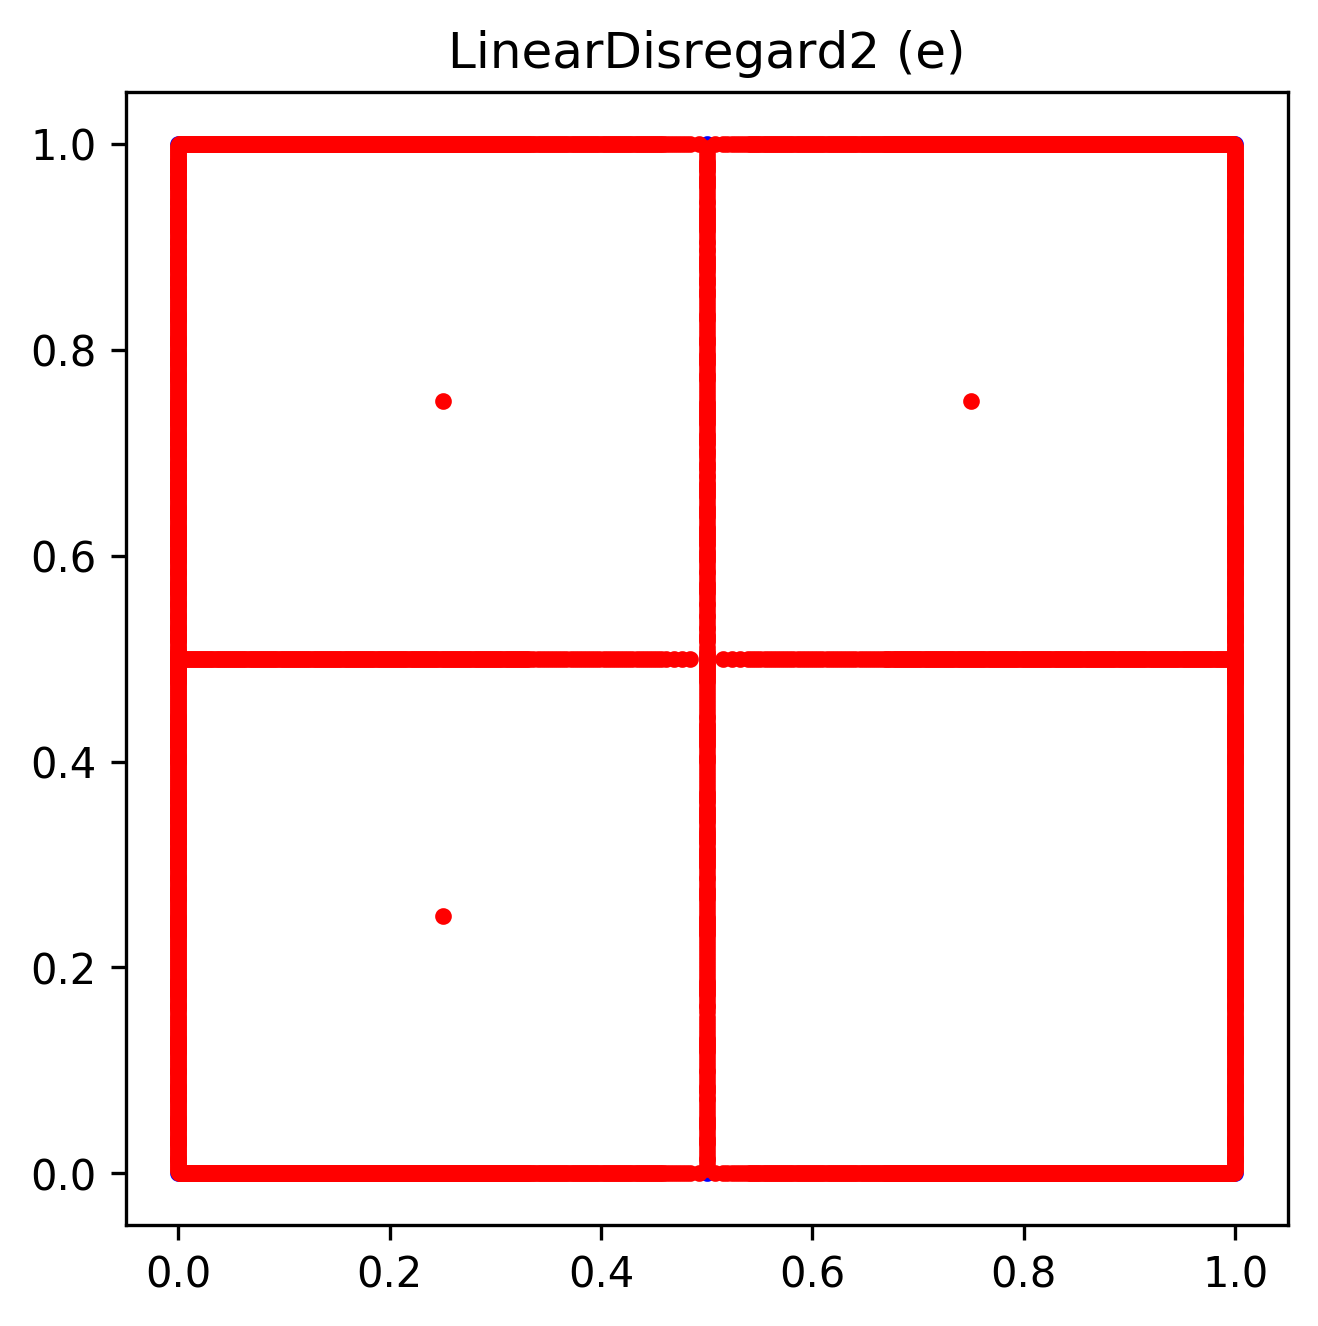

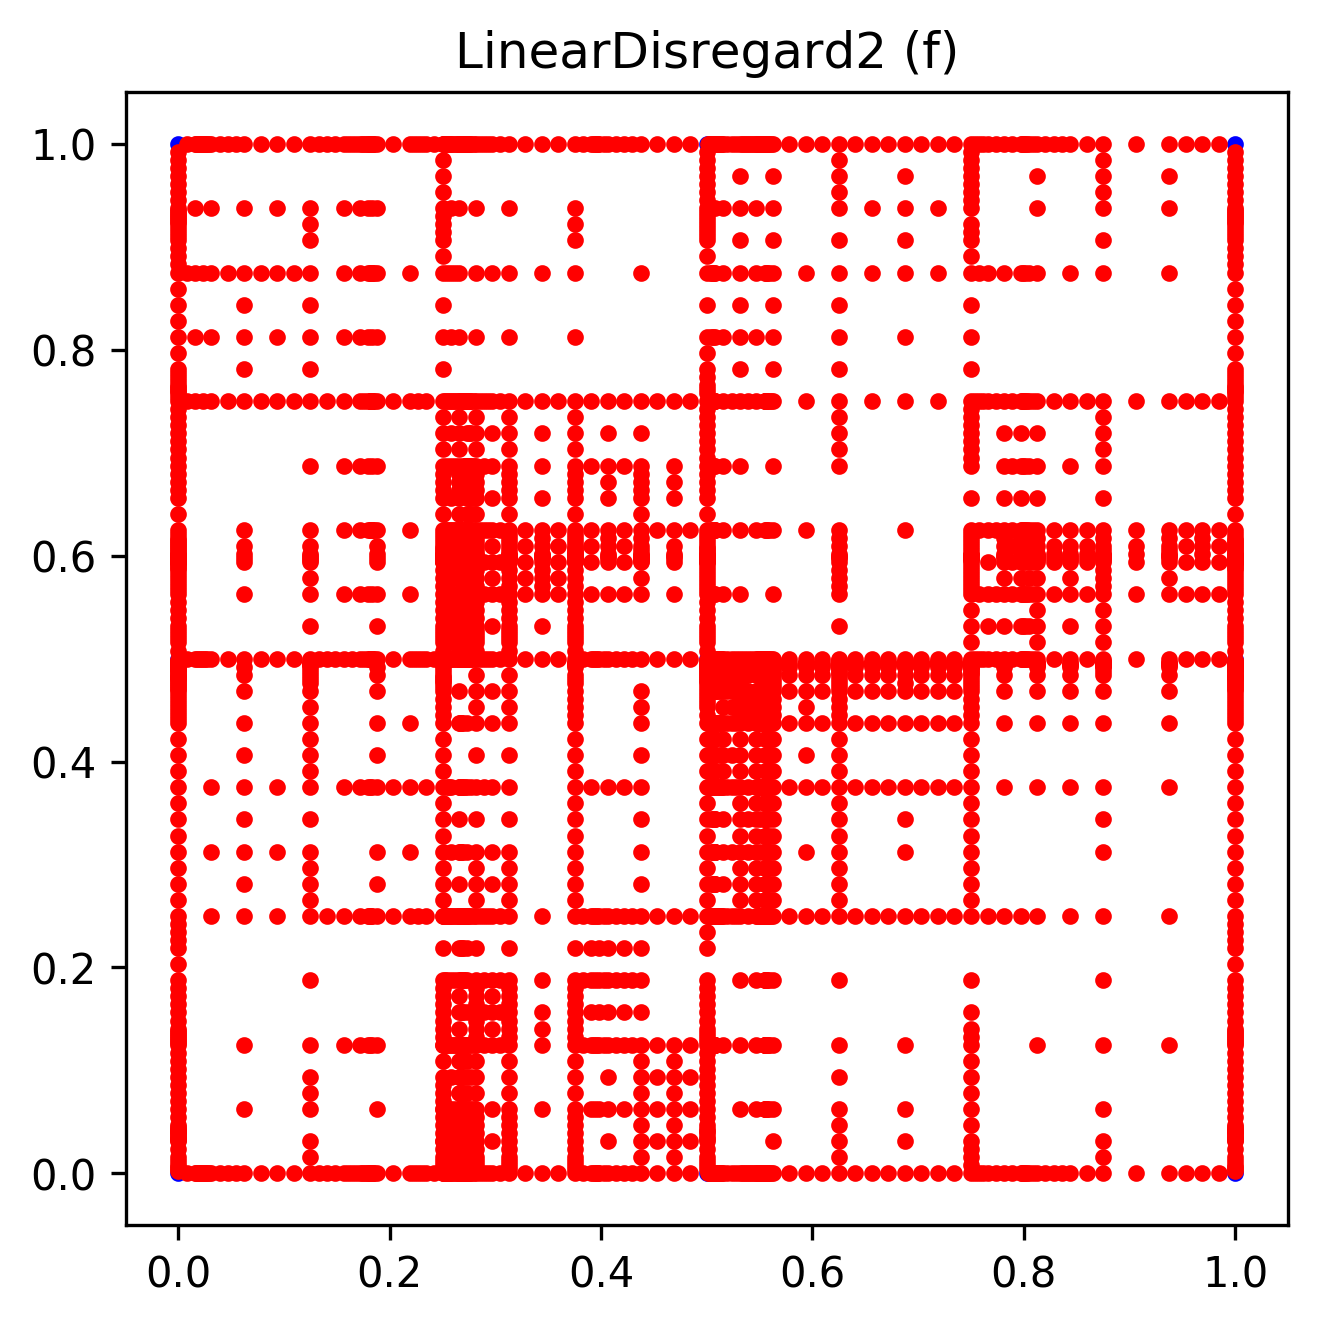

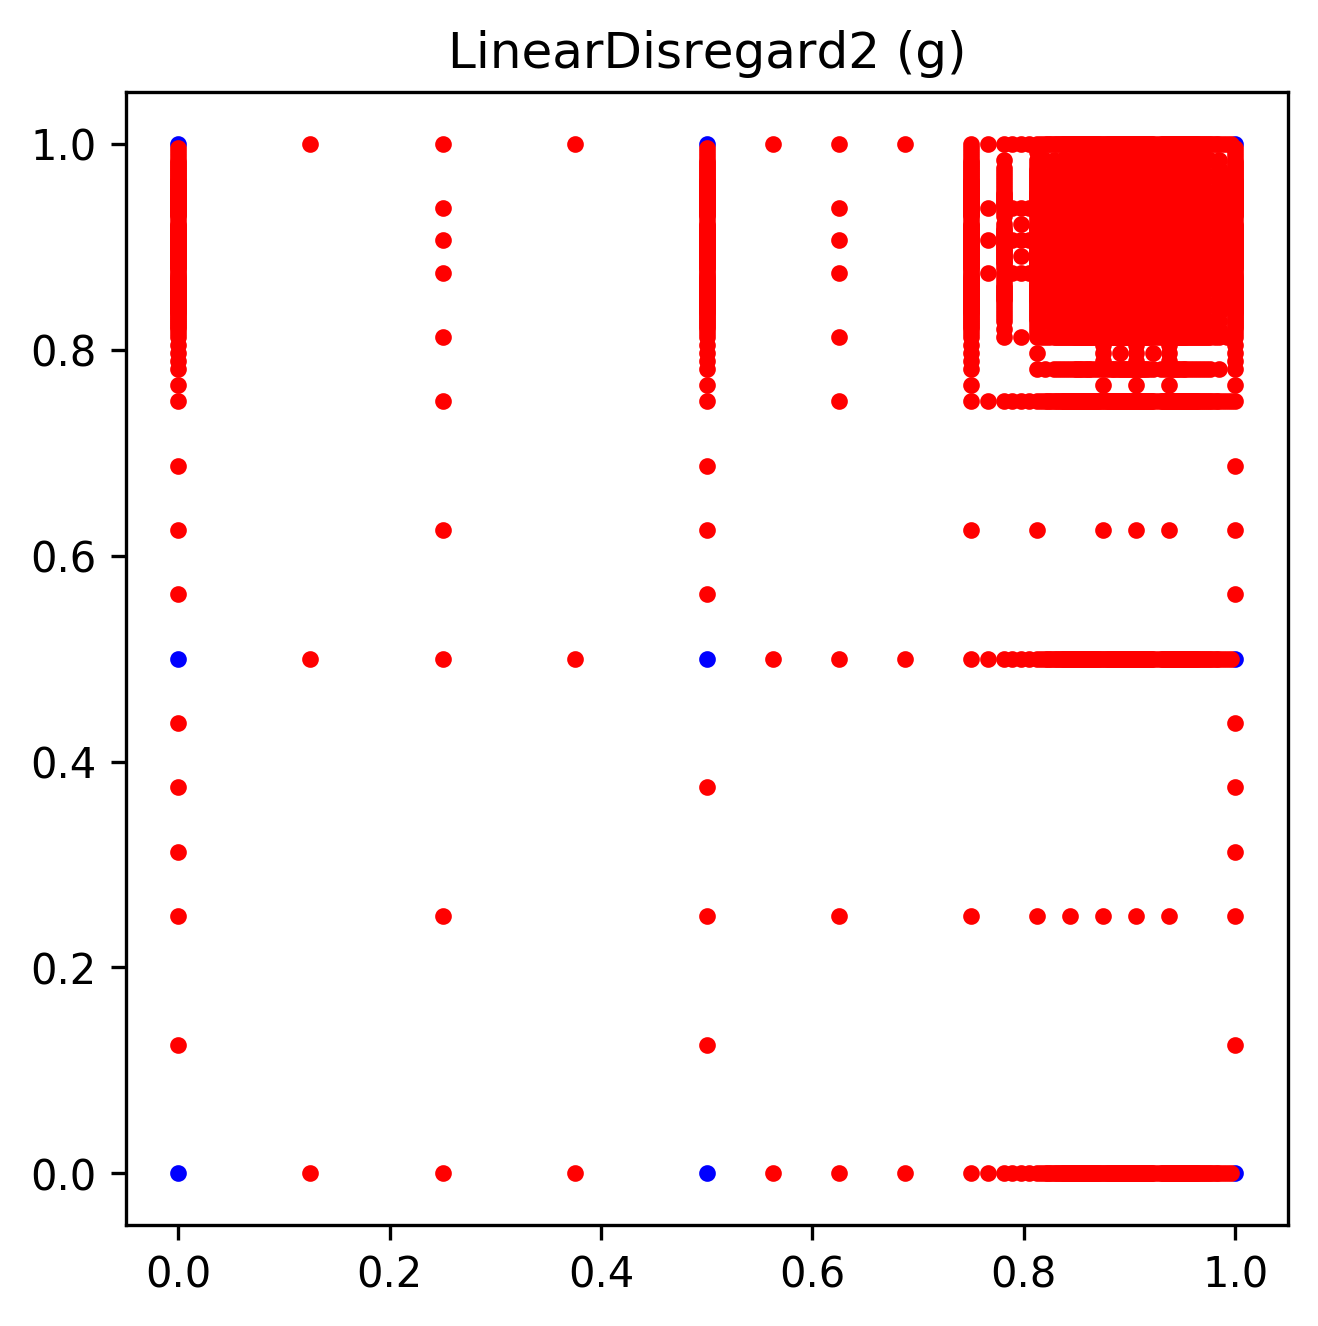

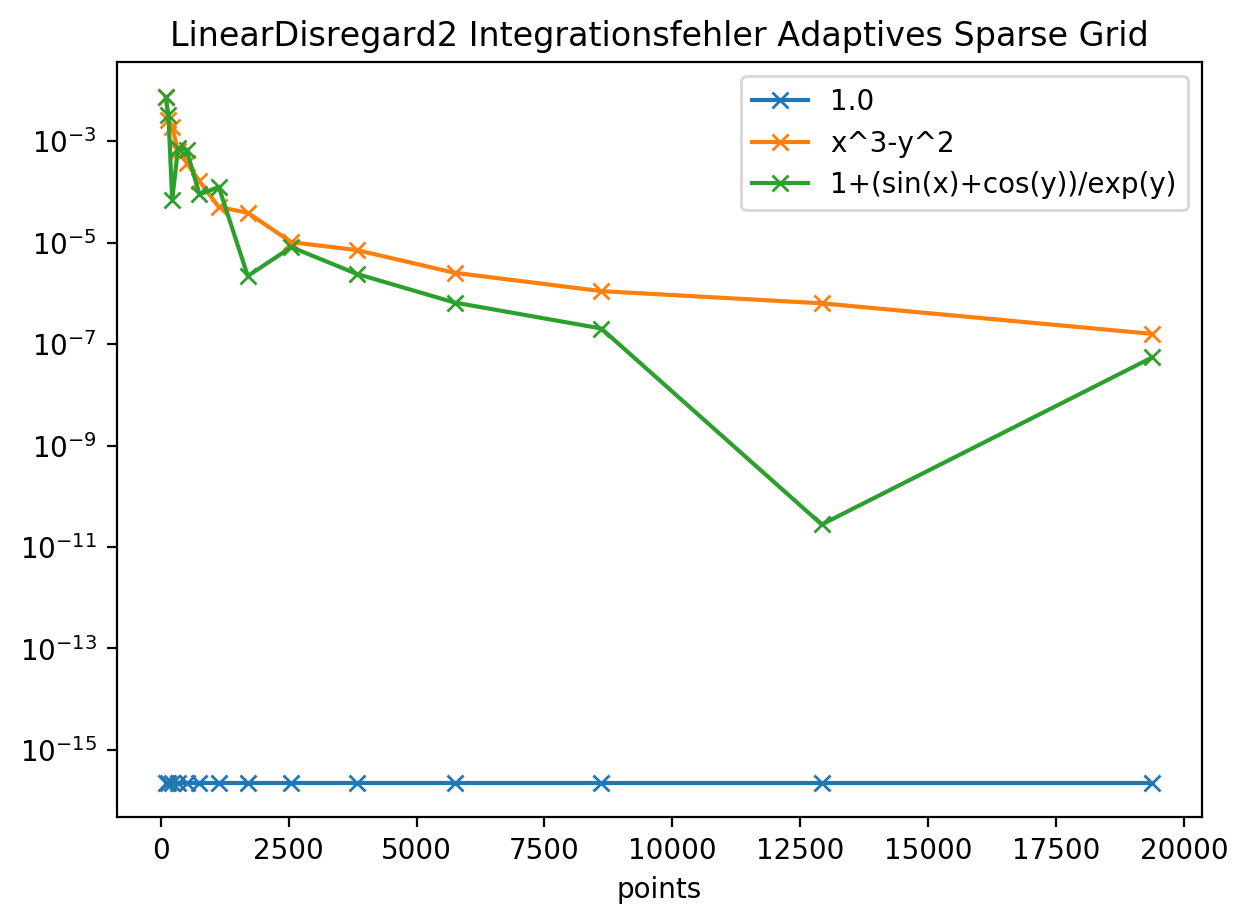

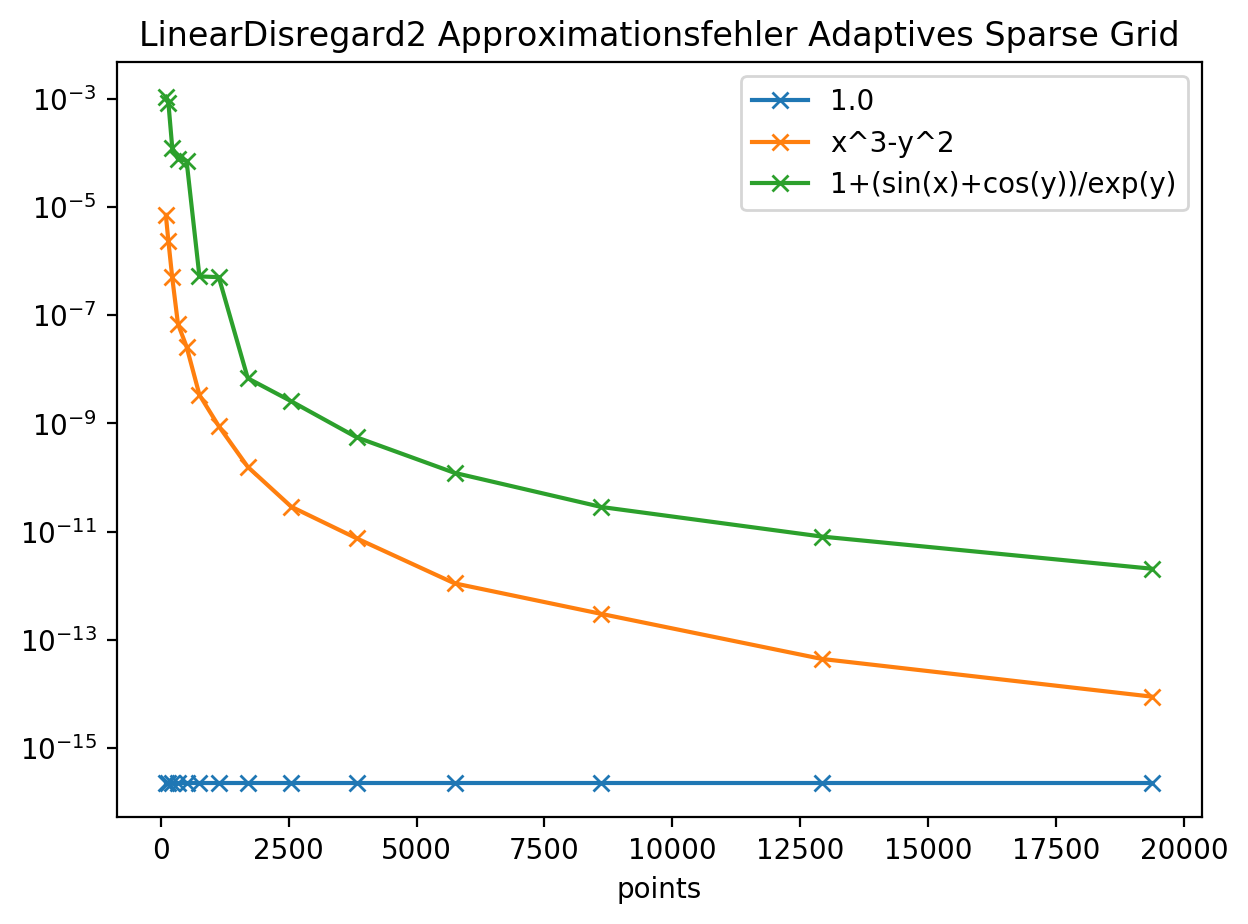

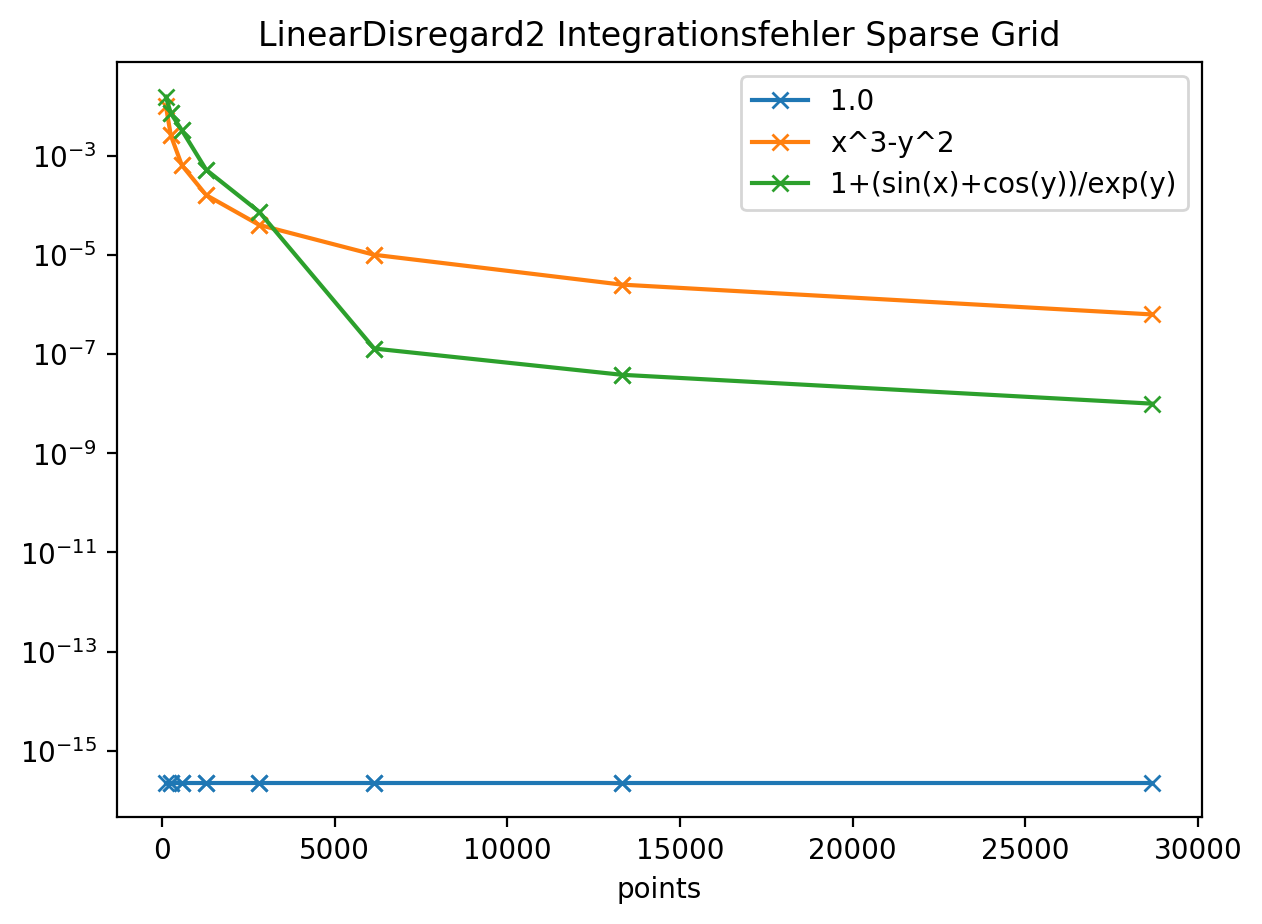

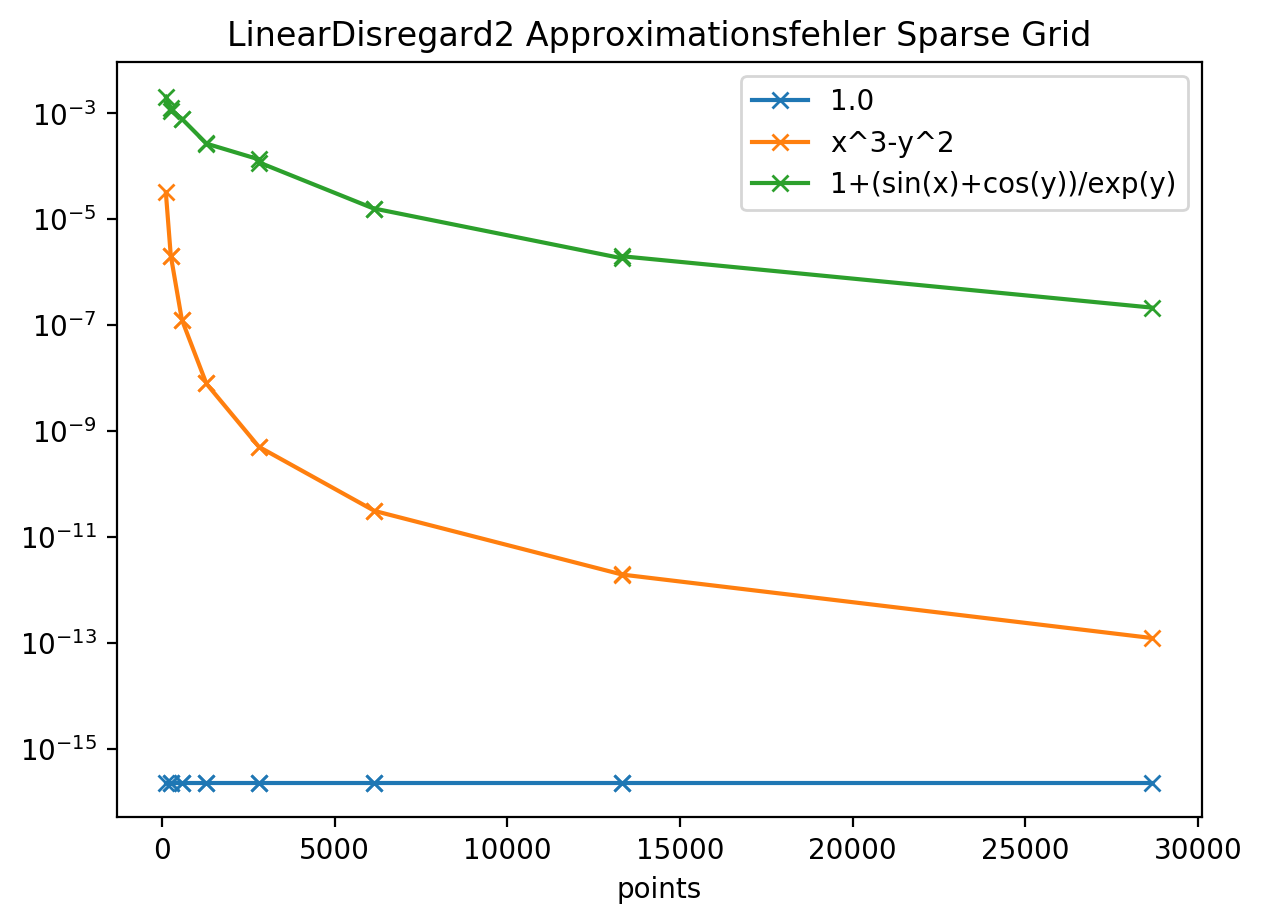

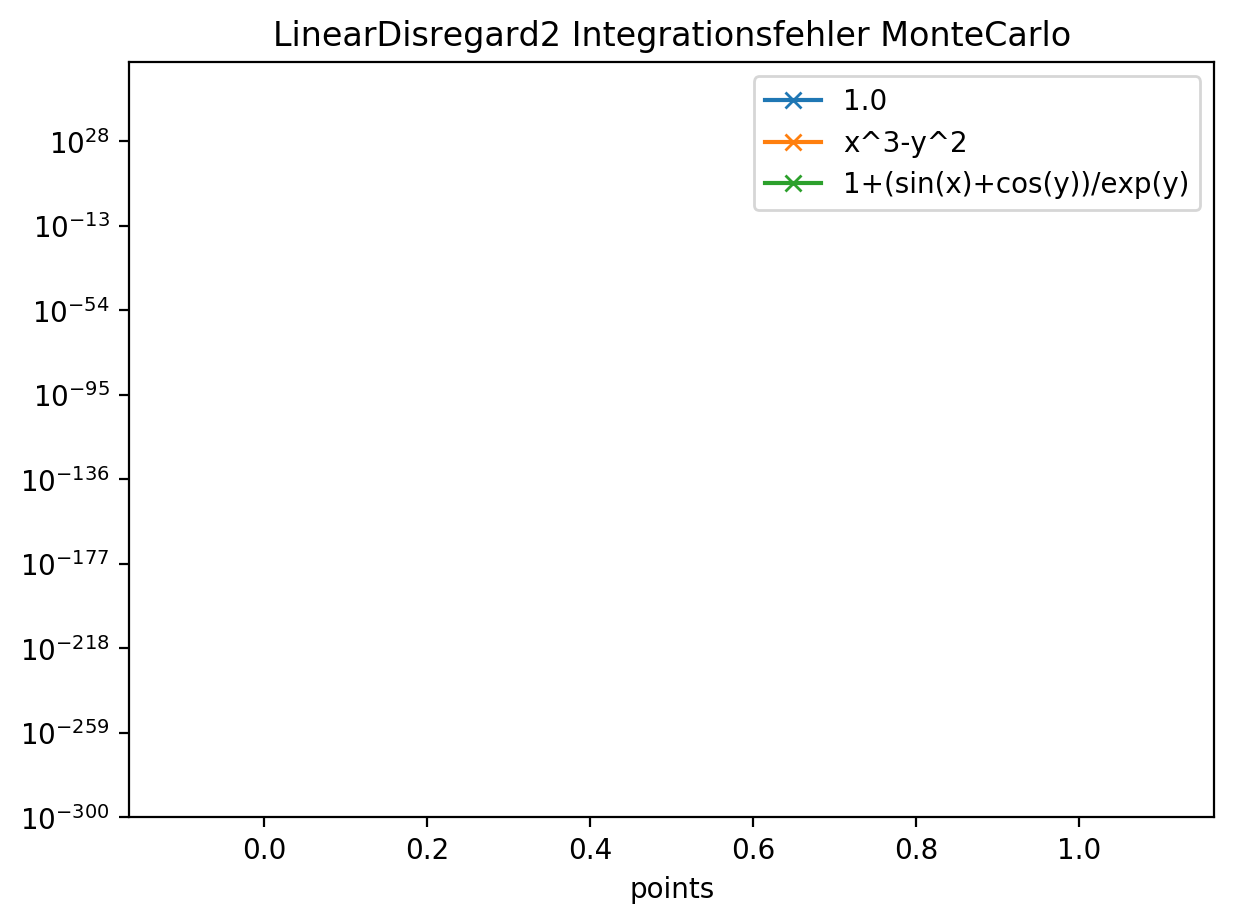

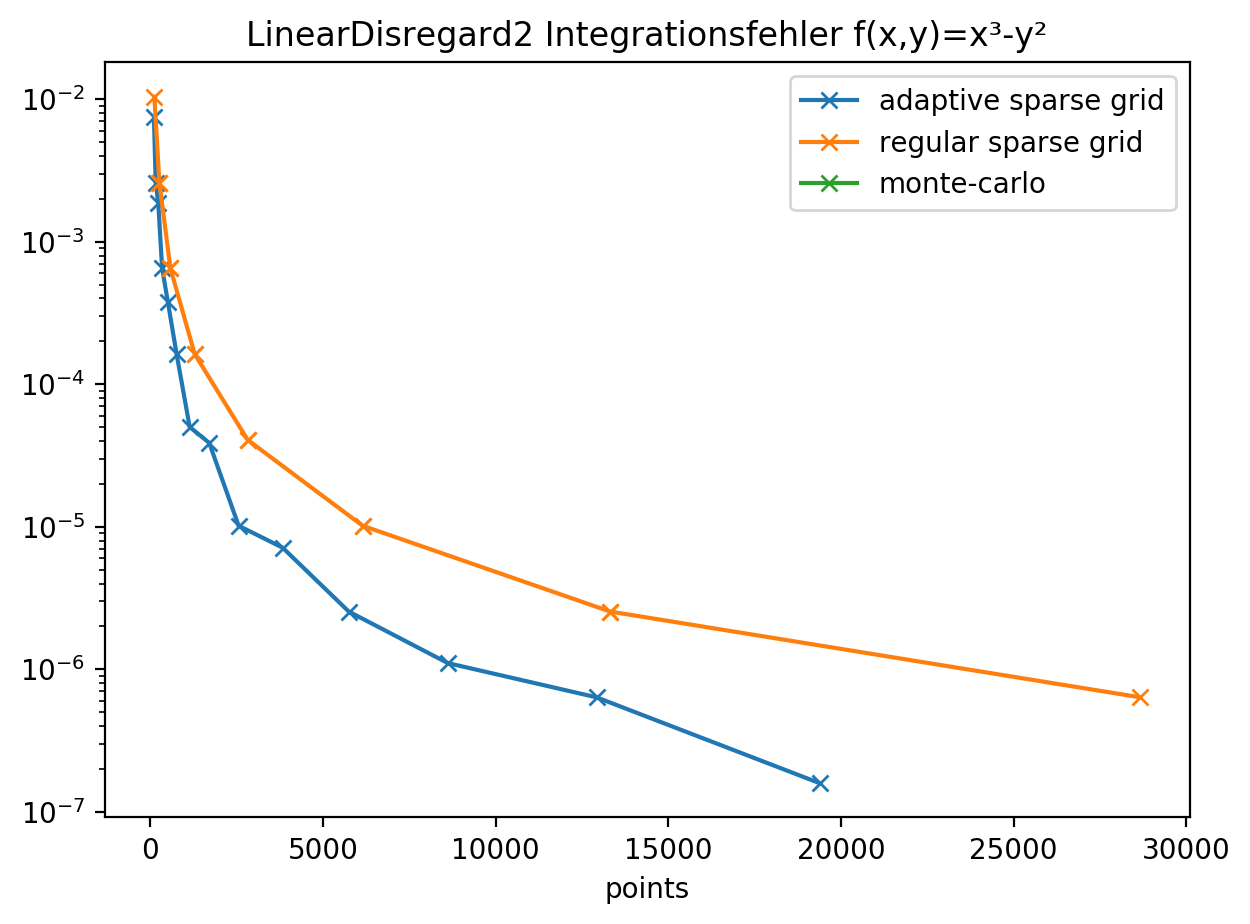

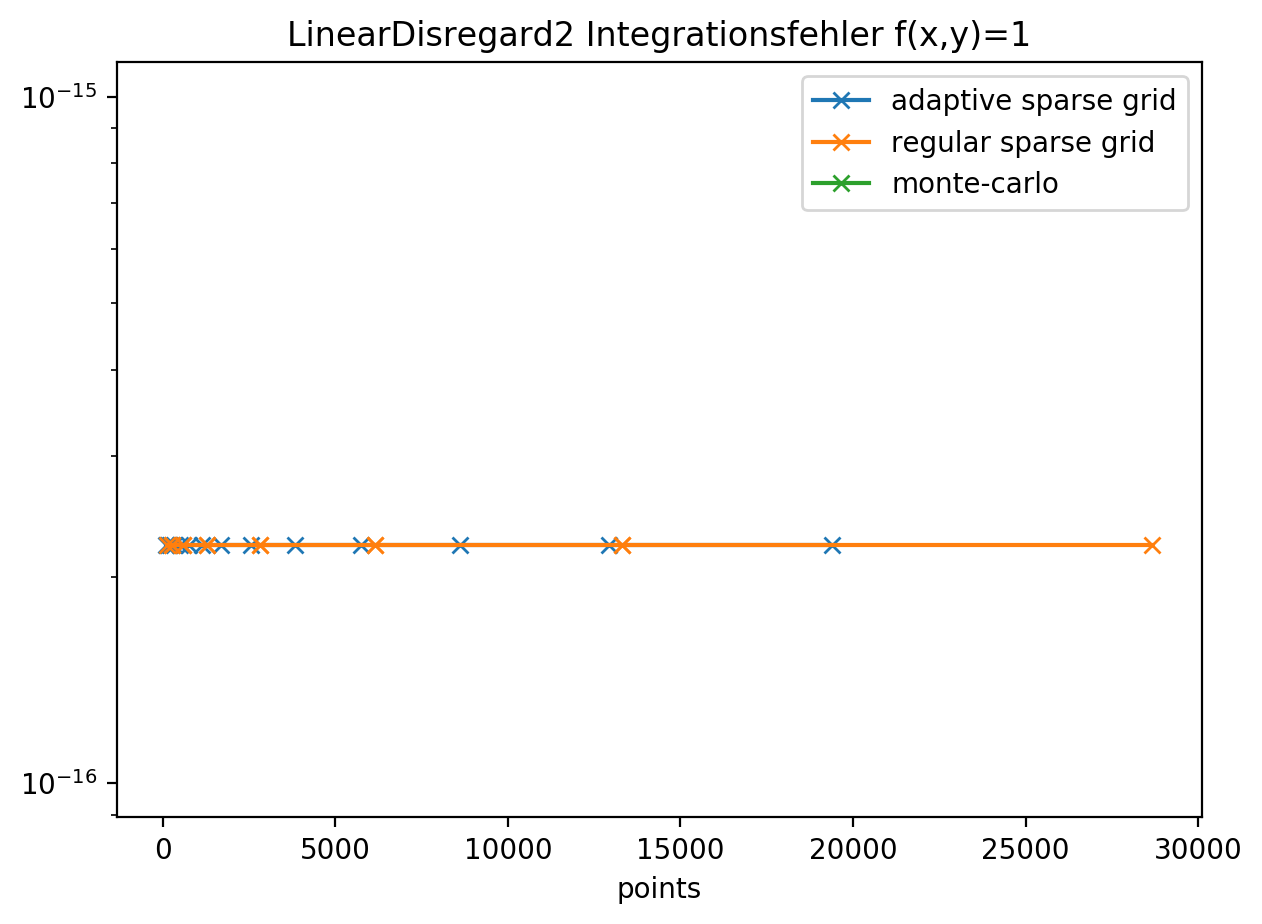

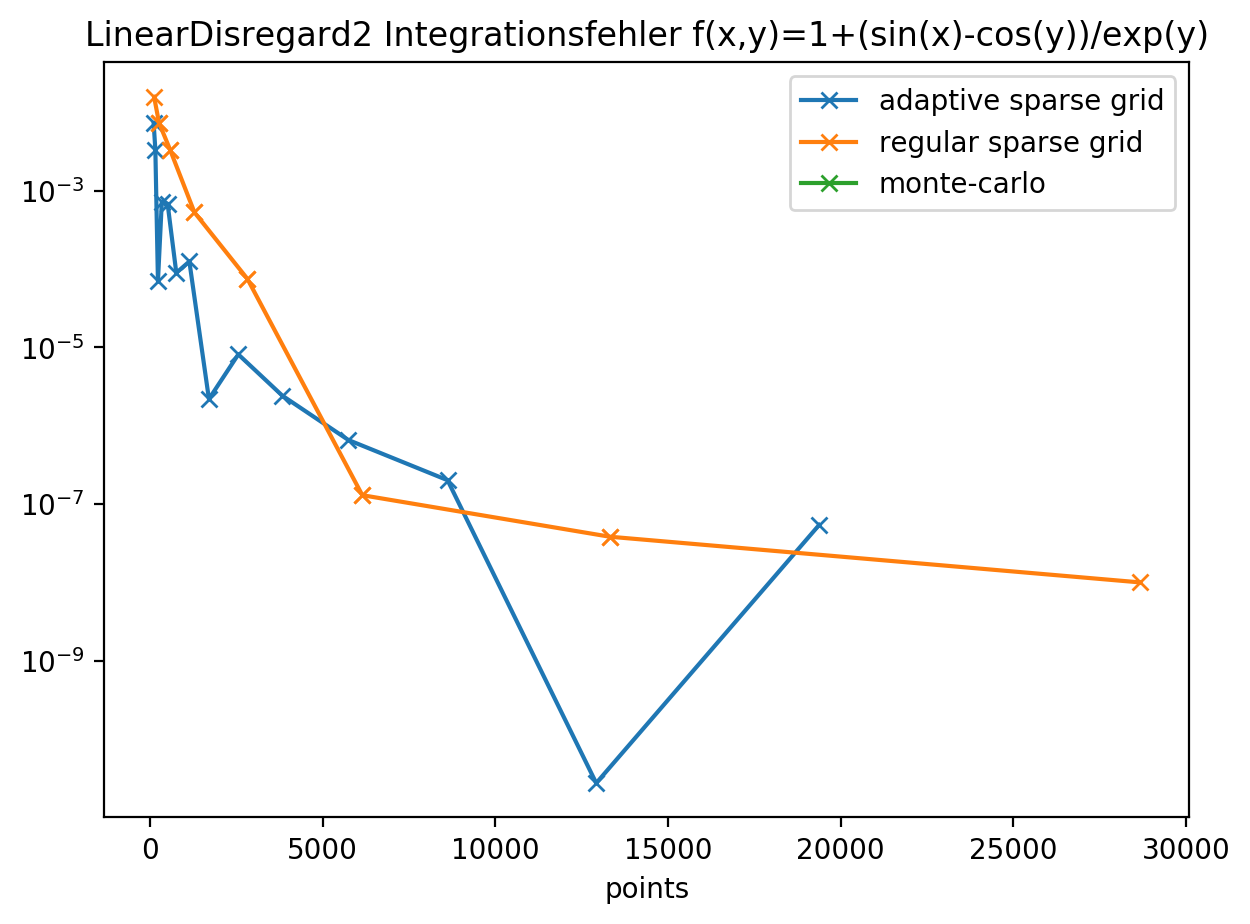

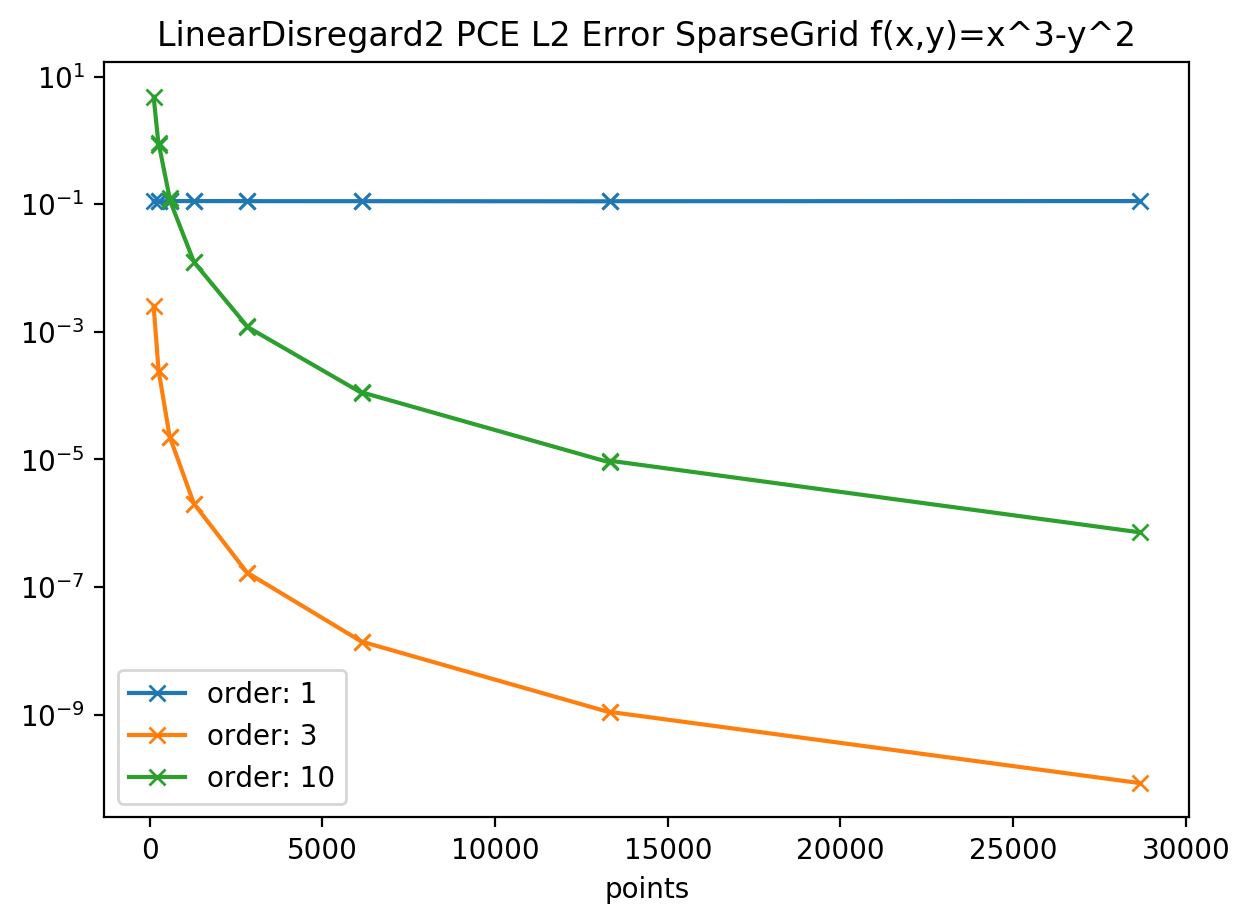

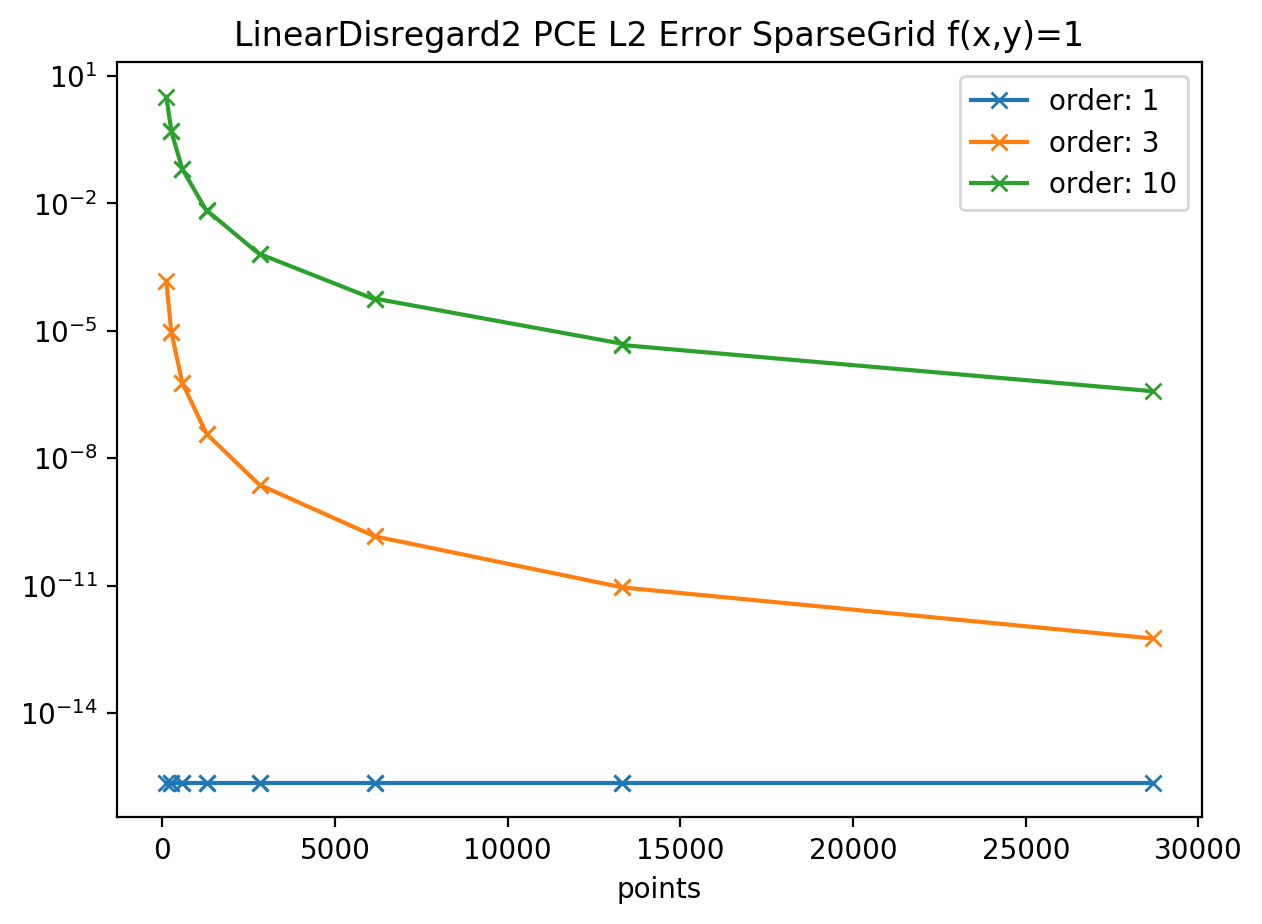

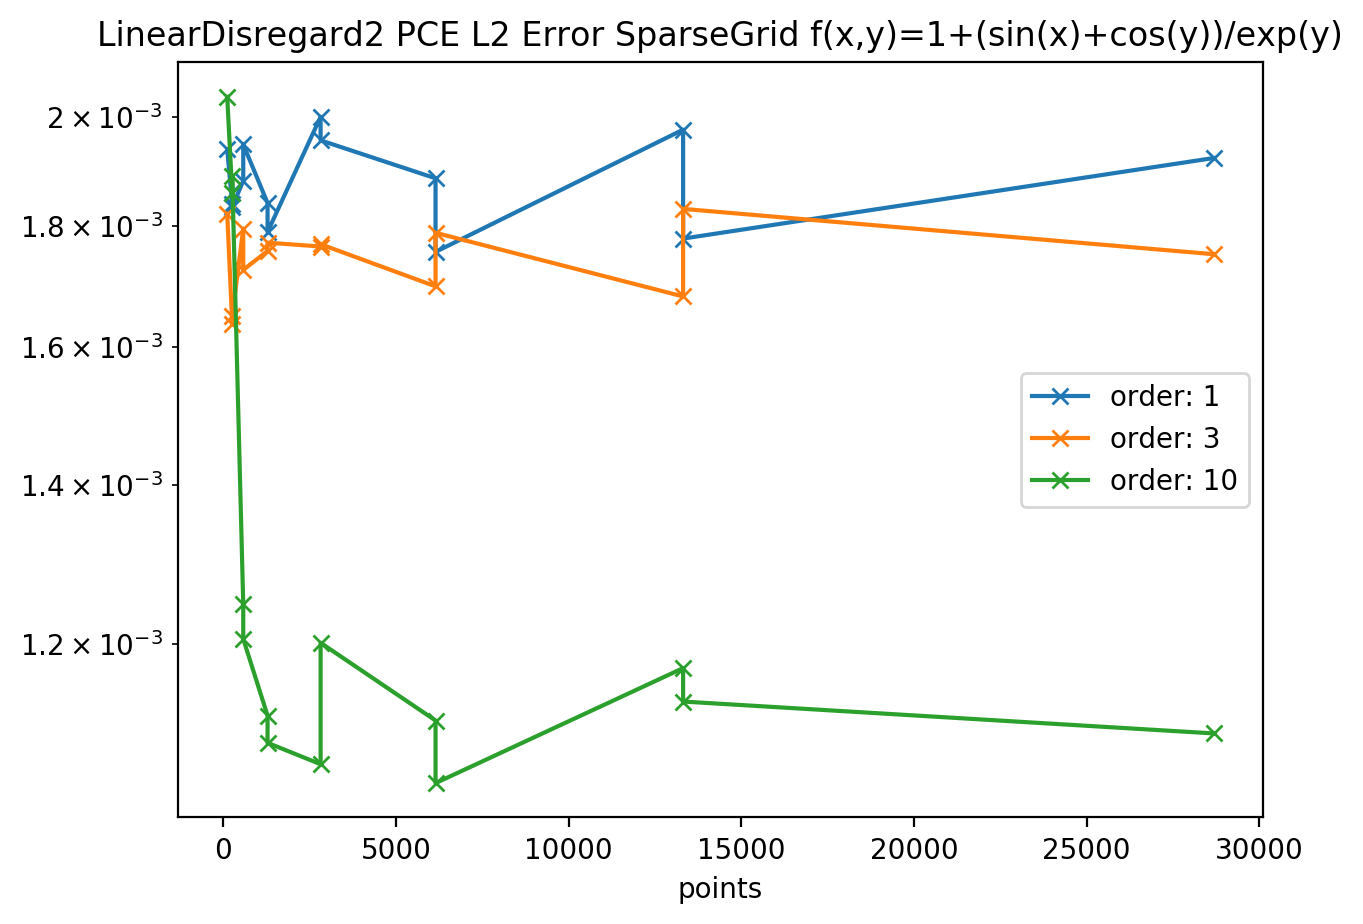

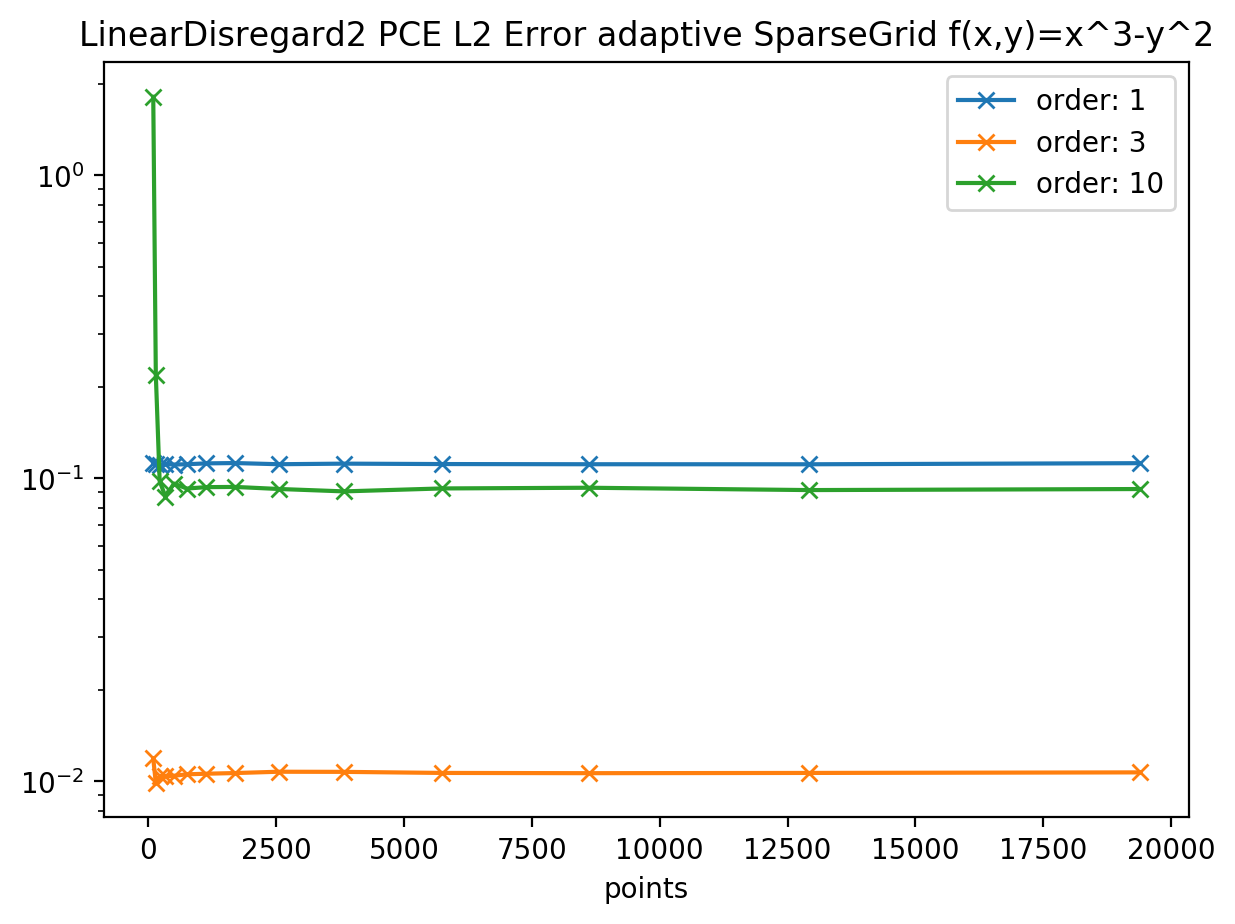

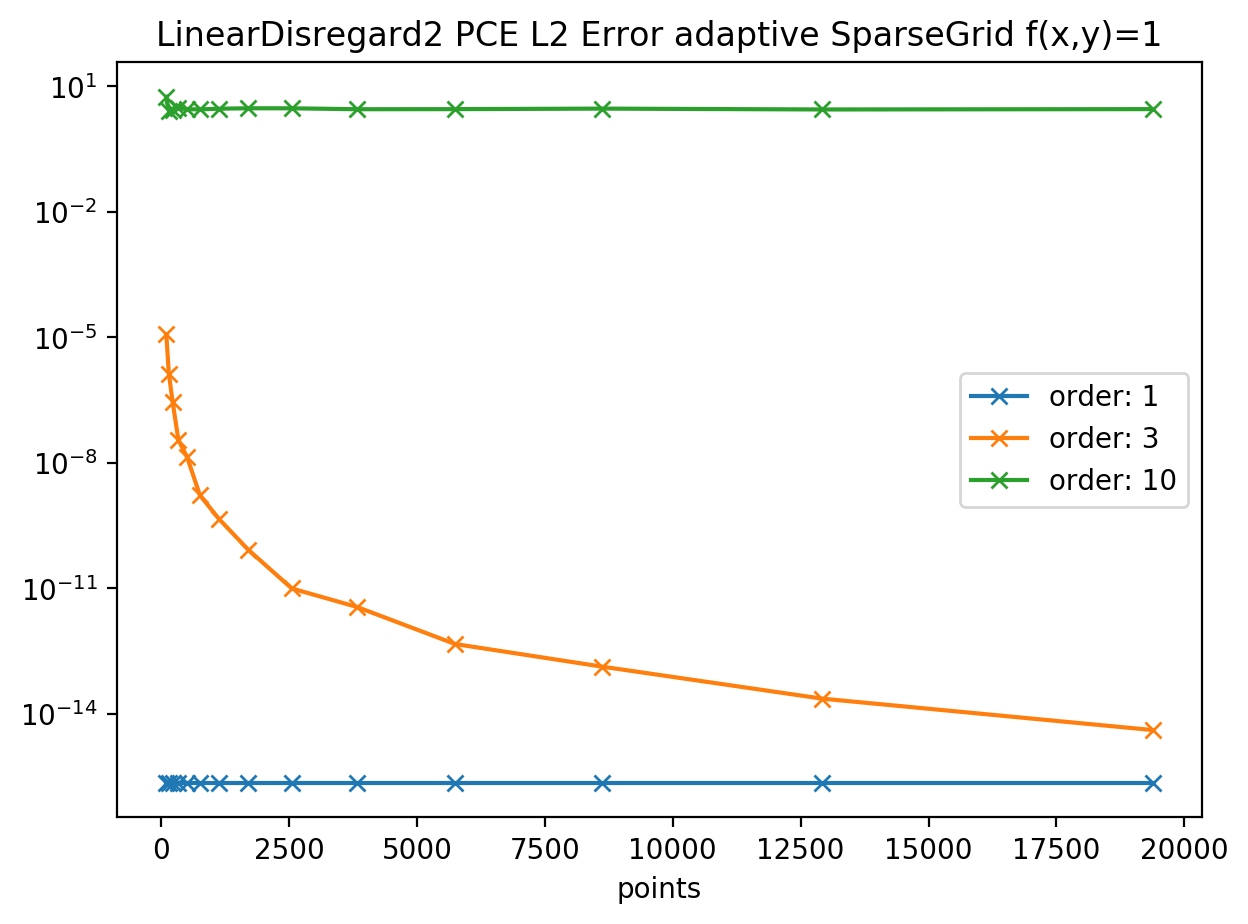

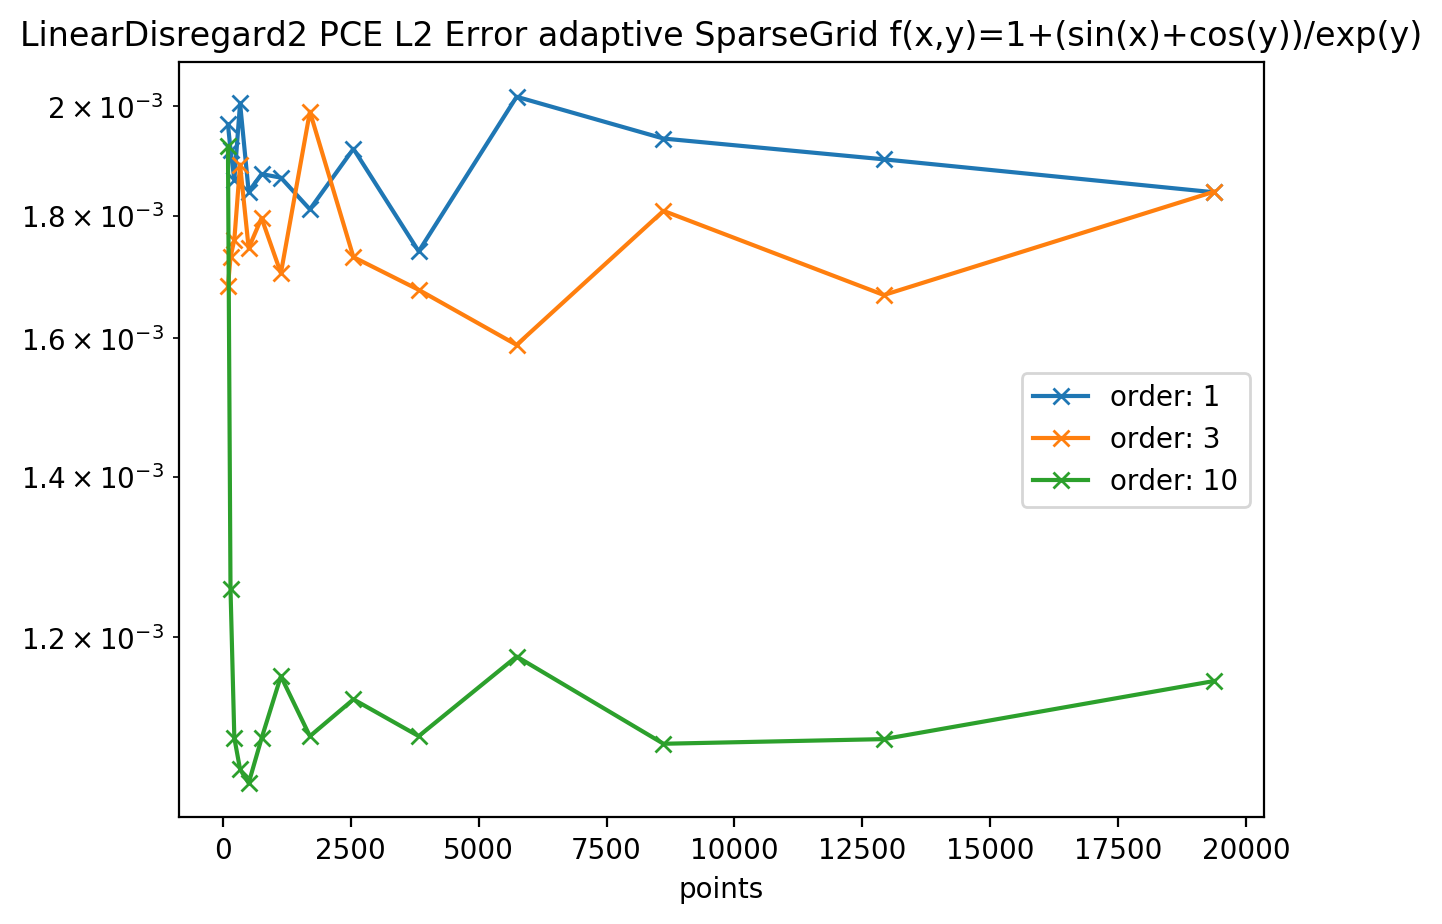

In [7]:
printer("LinearDisregard2")

0           1             2             3             4   \
0    10.000000   20.000000  4.000000e+01  8.000000e+01  1.600000e+02   
1   -10.000000  -10.000000 -1.000000e+01 -1.000000e+01 -1.000000e+01   
2     2.000000    2.000000  2.000000e+00  2.000000e+00  2.000000e+00   
3     3.263167    3.268237  3.269448e+00  3.269786e+00  3.269890e+00   
4     0.000024    0.000002  1.690923e-07  1.977251e-08  1.694714e-09   
5     0.000000    0.000000  0.000000e+00  0.000000e+00  0.000000e+00   
6     0.000025    0.000002  1.080610e-07  9.179473e-09  6.972192e-10   
7   -10.000000  -10.000000 -1.000000e+01 -1.000000e+01 -1.000000e+01   
8     2.000000    2.000000  2.000000e+00  2.000000e+00  2.000000e+00   
9     3.263167    3.268237  3.269505e+00  3.269822e+00  3.269901e+00   
10    0.000024    0.000002  9.553140e-08  5.991586e-09  3.729629e-10   
11    0.000000    0.000000  0.000000e+00  0.000000e+00  0.000000e+00   
12    0.000025    0.000002  9.761900e-08  6.042144e-09  3.782026e-10   
13         NaN         NaN           NaN           NaN           NaN   
14         NaN         NaN           NaN           NaN           NaN   
15         NaN         NaN           NaN           NaN           NaN   
16    0.042610    0.042770  2.410370e-02  2.295018e-02  2.294072e-02   
17    1.194935    1.189581  8.341719e-02  6.087509e-03  4.612430e-04   
18  294.766847  300.599161  2.638427e+02  8.146711e+01  1.362845e+01   
19    0.000000    0.000000  0.000000e+00  0.000000e+00  0.000000e+00   
20    0.039015    0.039191  2.437069e-03  1.533304e-04  9.522641e-06   
21   11.986748   11.900186  1.021795e+01  3.245785e+00  5.272268e-01   
22    0.136394    0.135772  1.253195e-01  1.244437e-01  1.247356e-01   
23    0.183376    0.182560  1.906622e-02  1.993550e-03  3.081355e-04   
24   27.692499   28.343469  1.568902e+01  3.650230e+00  5.379218e-01   
25    0.042564    0.042716  2.407312e-02  2.283380e-02  2.269916e-02   
26    1.202027    1.197921  1.092459e-01  1.163380e-02  9.962714e-03   
27  299.803371  296.578614  4.866933e+02  9.554059e+01  8.627873e-01   
28    0.000000    0.000000  0.000000e+00  0.000000e+00  0.000000e+00   
29    0.039006    0.039024  2.435915e-03  2.342618e-05  1.282989e-06   
30   11.595321   11.825490  2.111087e+01  5.552154e+00  2.586098e+00   
31    0.135853    0.135440  1.241017e-01  1.235046e-01  1.248034e-01   
32    0.183079    0.181876  1.918215e-02  3.119912e-03  4.051879e-04   
33   28.194778   28.933293  1.751144e+01  1.056935e+01  8.857244e+00   

              5             6             7             8             9   \
0   3.200000e+02  6.400000e+02  1.280000e+03  2.560000e+03  5.120000e+03   
1  -1.000000e+01 -1.000000e+01 -1.000000e+01 -1.000000e+01 -1.000000e+01   
2   2.000000e+00  2.000000e+00  2.063560e+00  2.115077e+00  2.131787e+00   
3   3.269919e+00  3.269925e+00  3.269927e+00  3.269928e+00  3.269928e+00   
4   1.452775e-10  8.699700e-12  5.845000e-13  3.780000e-14  2.300000e-15   
5   0.000000e+00  0.000000e+00  1.339565e-01  2.368826e-01  2.693753e-01   
6   7.324780e-11  3.746700e-12  3.476000e-13  1.620000e-14  1.000000e-15   
7  -1.000000e+01 -1.000000e+01 -1.000000e+01 -1.000000e+01 -1.000000e+01   
8   2.000000e+00  2.000000e+00  2.000000e+00  2.000000e+00  2.000000e+00   
9   3.269921e+00  3.269926e+00  3.269927e+00  3.269928e+00  3.269928e+00   
10  2.344260e-11  1.454900e-12  9.080000e-14  5.600000e-15  4.000000e-16   
11  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
12  2.402270e-11  1.468300e-12  9.250000e-14  5.800000e-15  4.000000e-16   
13           NaN           NaN           NaN           NaN           NaN   
14           NaN           NaN           NaN           NaN           NaN   
15           NaN           NaN           NaN           NaN           NaN   
16  2.274546e-02  2.294864e-02  2.275272e-02  2.285508e-02  2.284625e-02   
17  3.596447e-05  2.786347e-06  2.745703e-06  2.155016e-07  1.619665e-08   
18  1.627410e+00  1.723470e-01  1.698550e-01  1

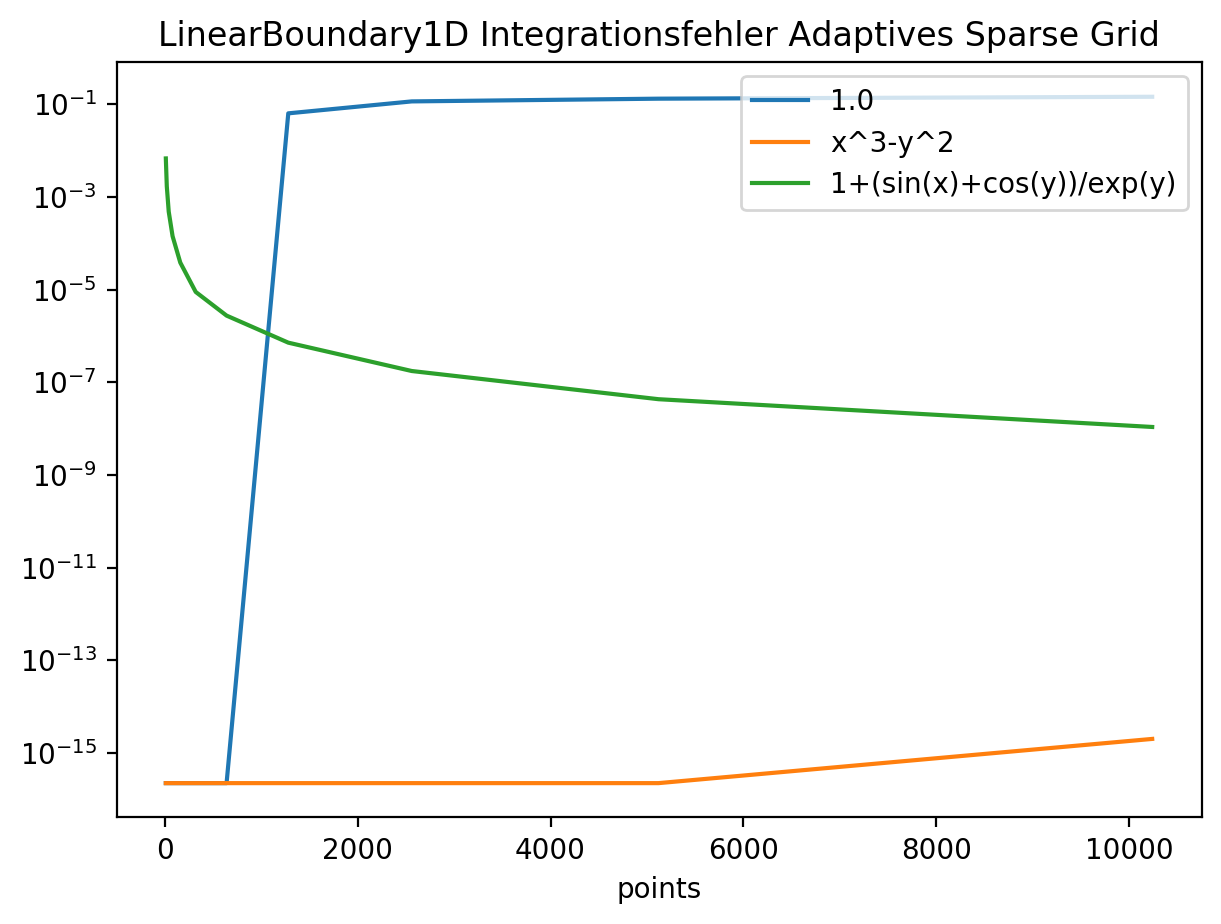

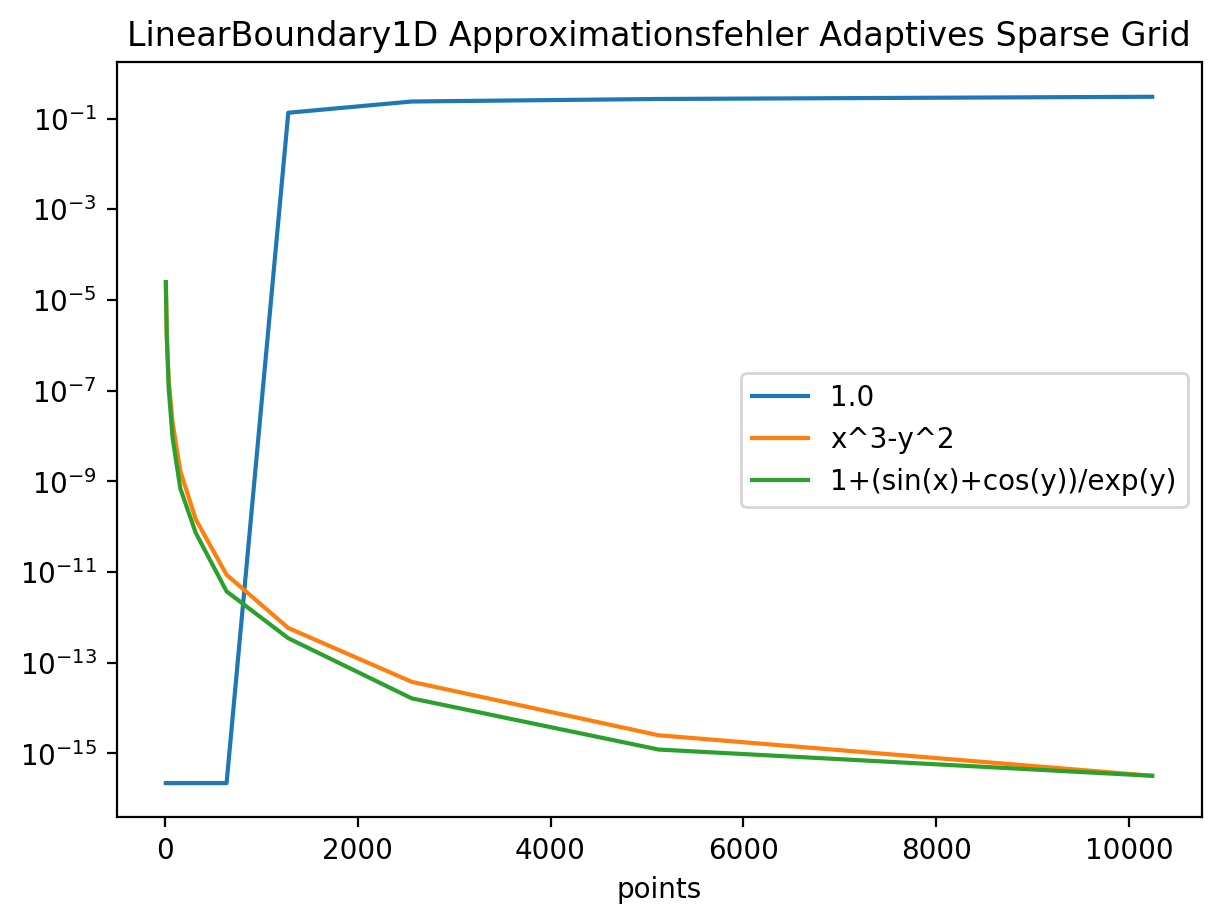

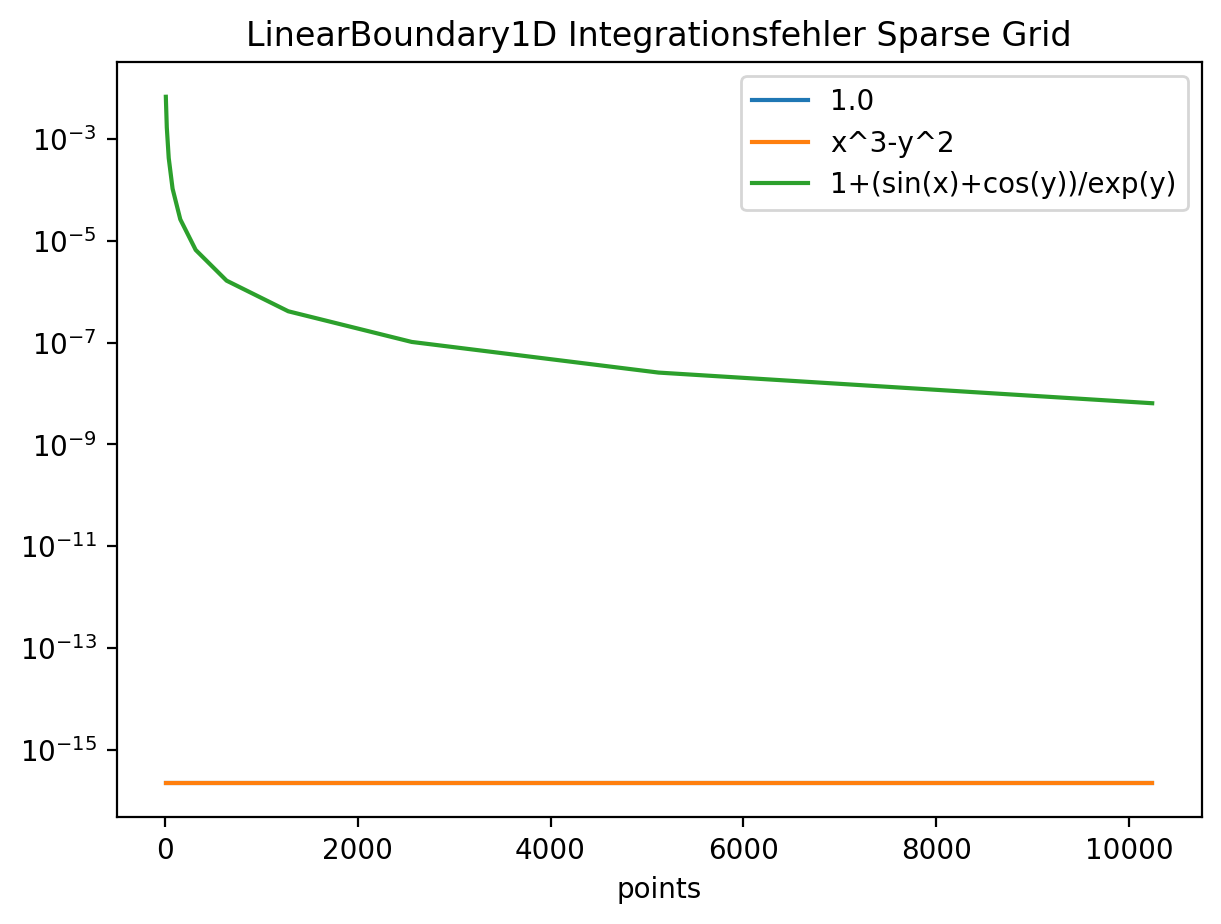

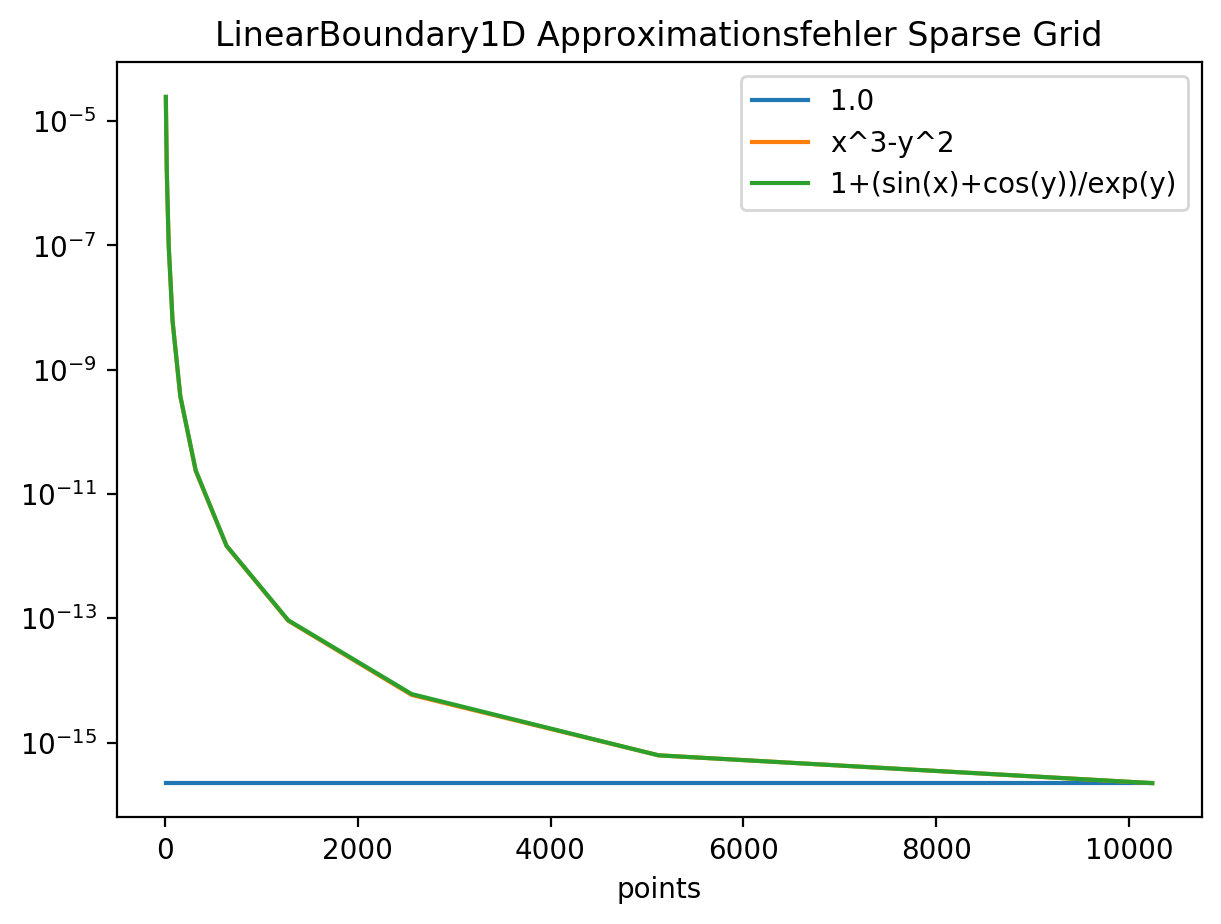

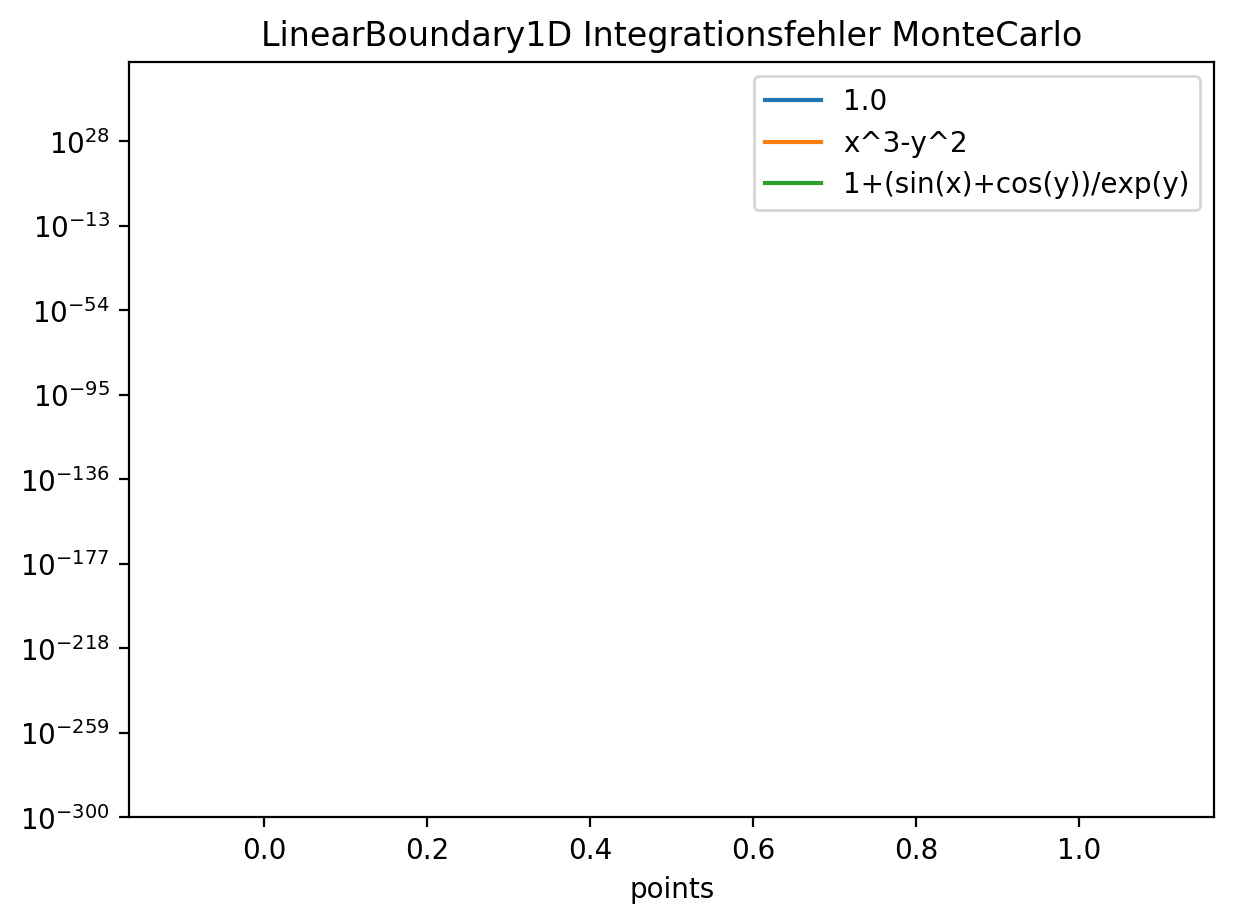

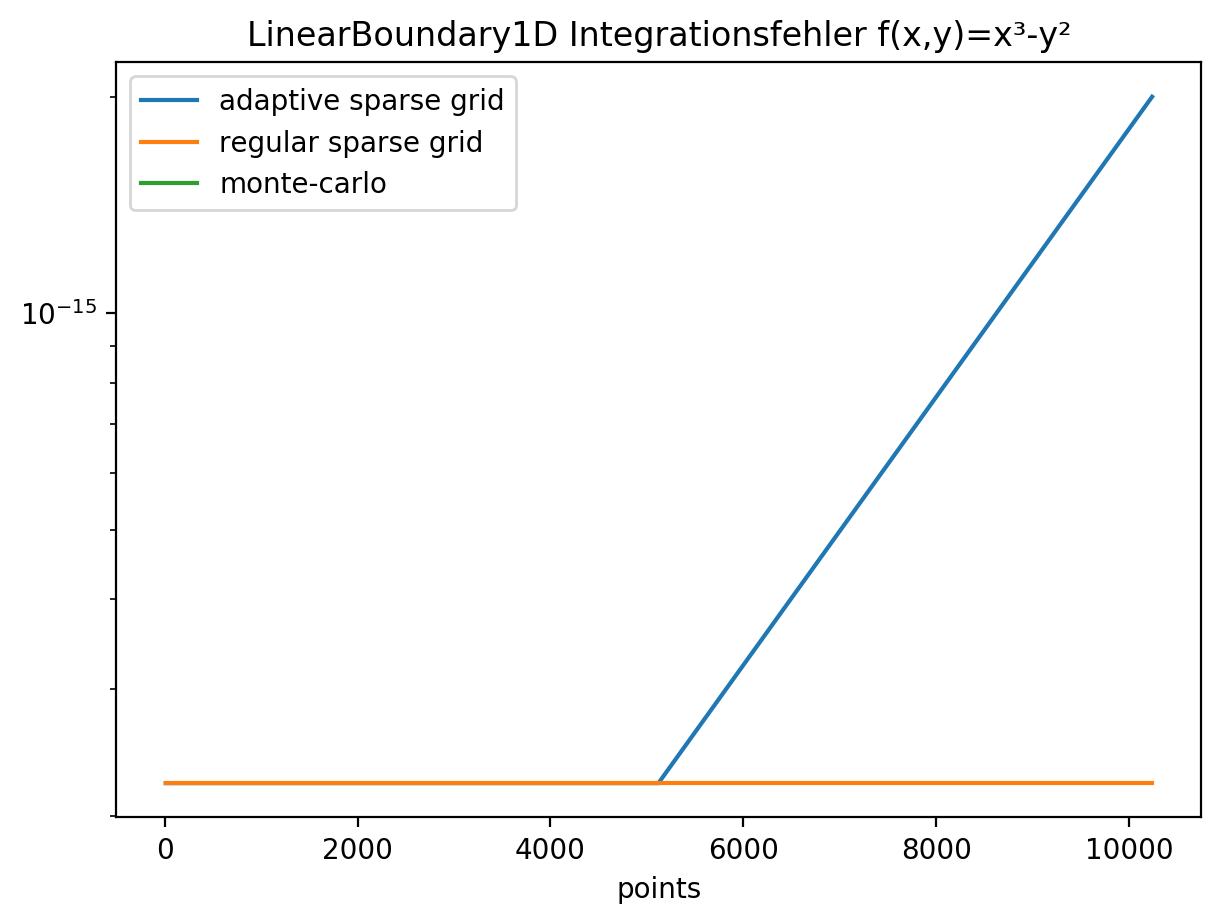

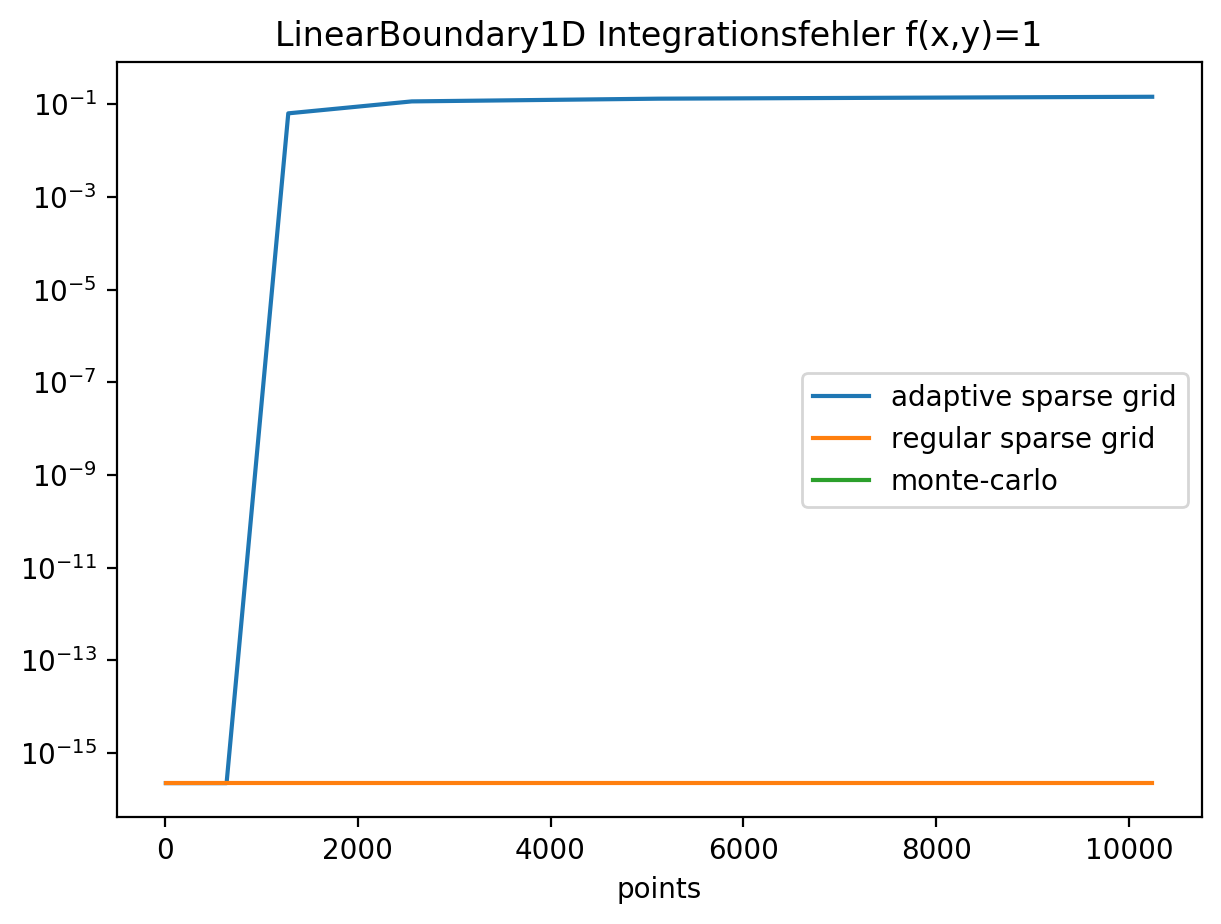

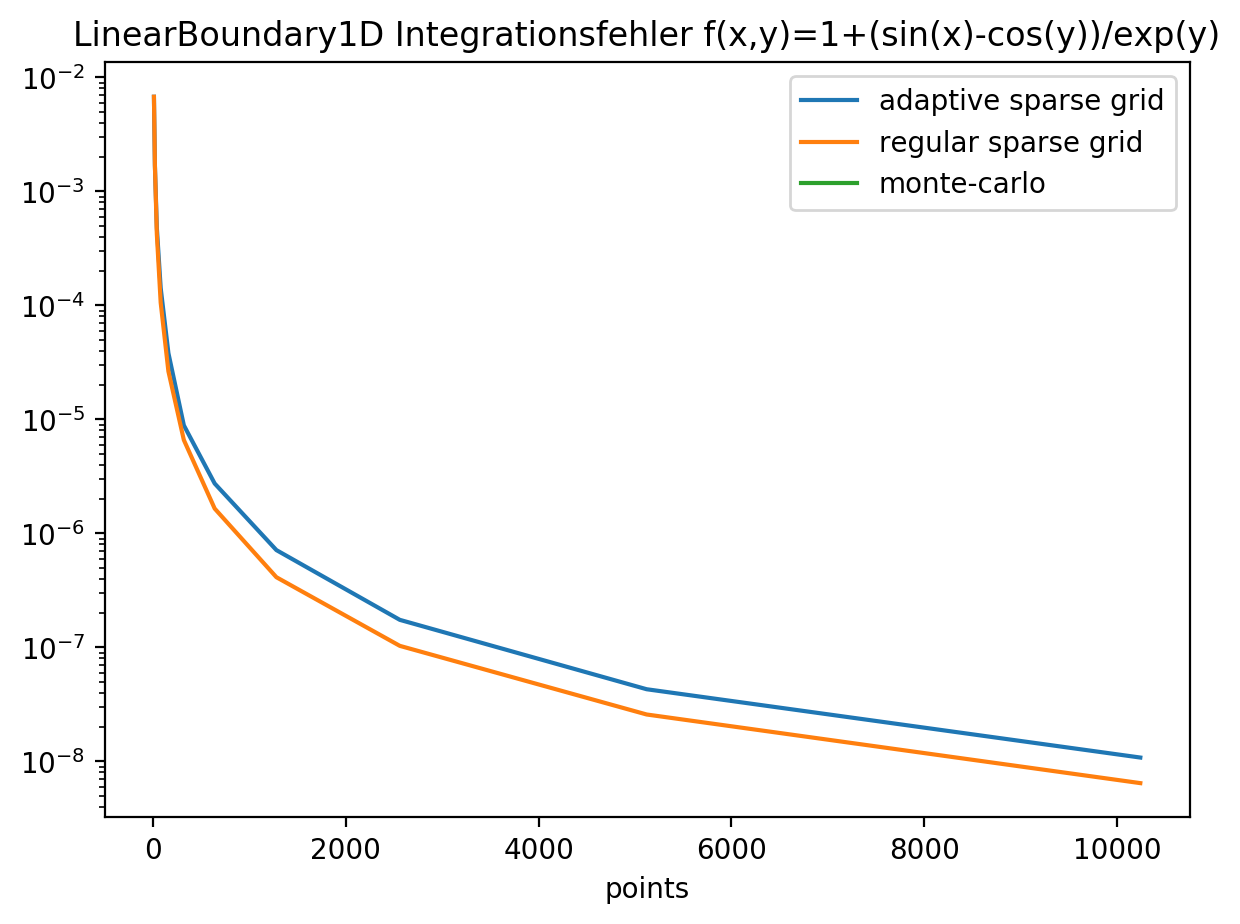

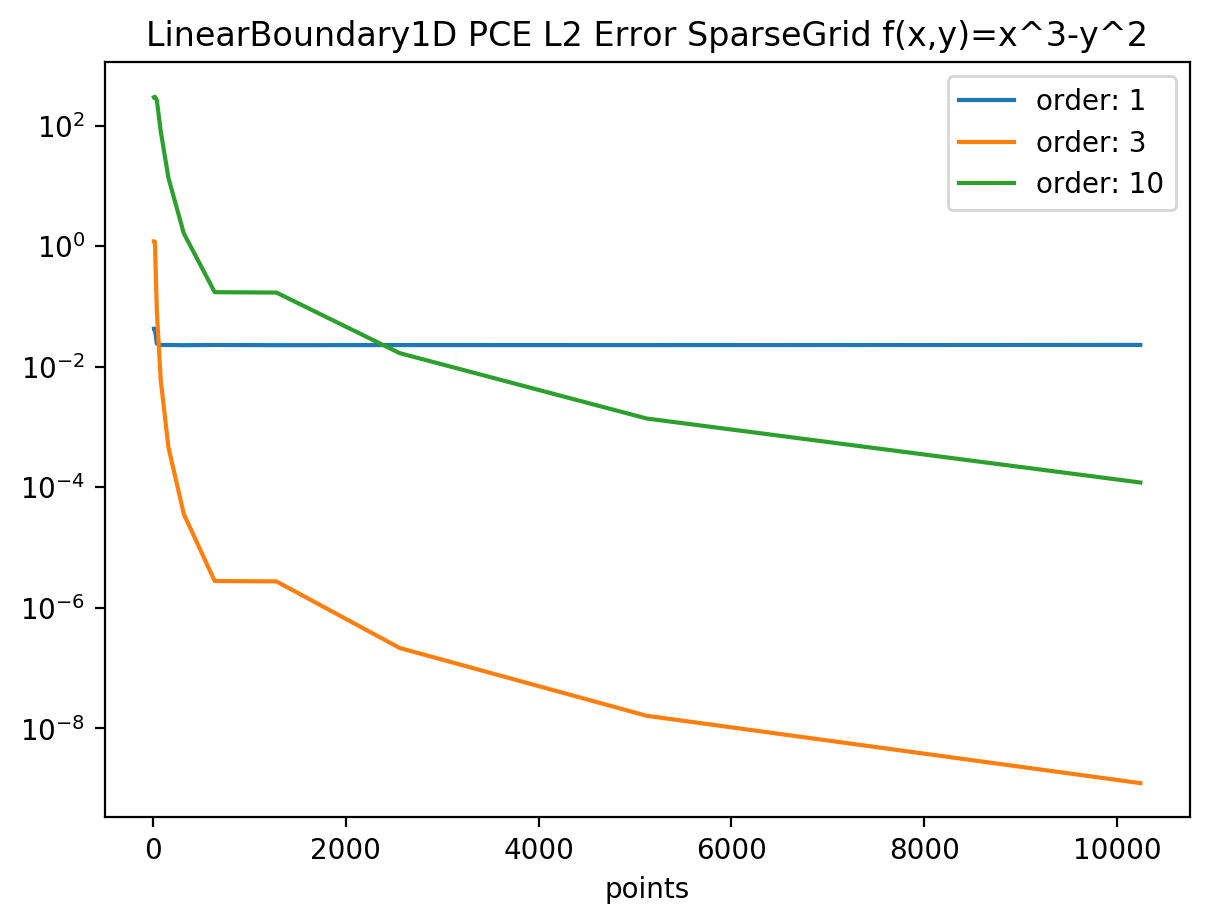

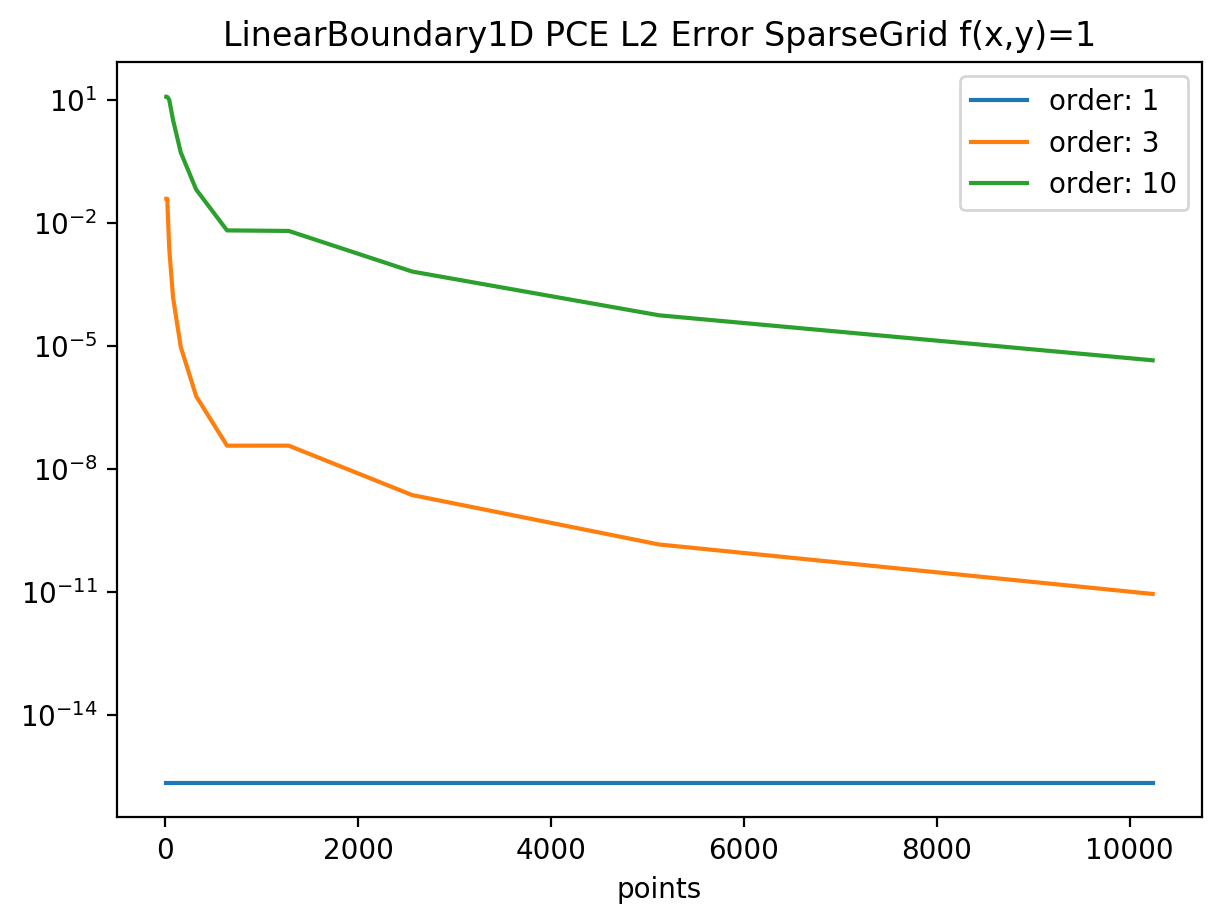

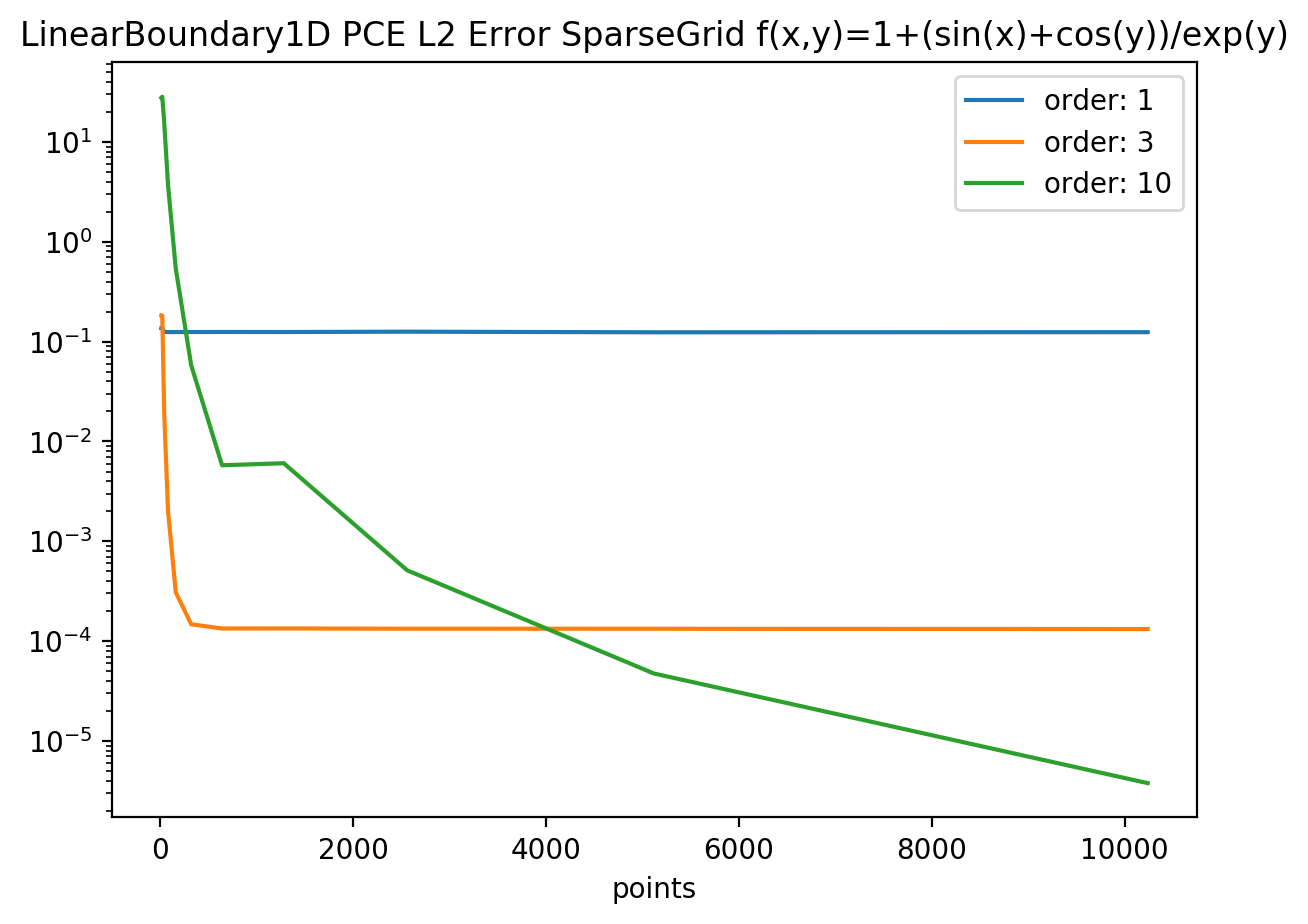

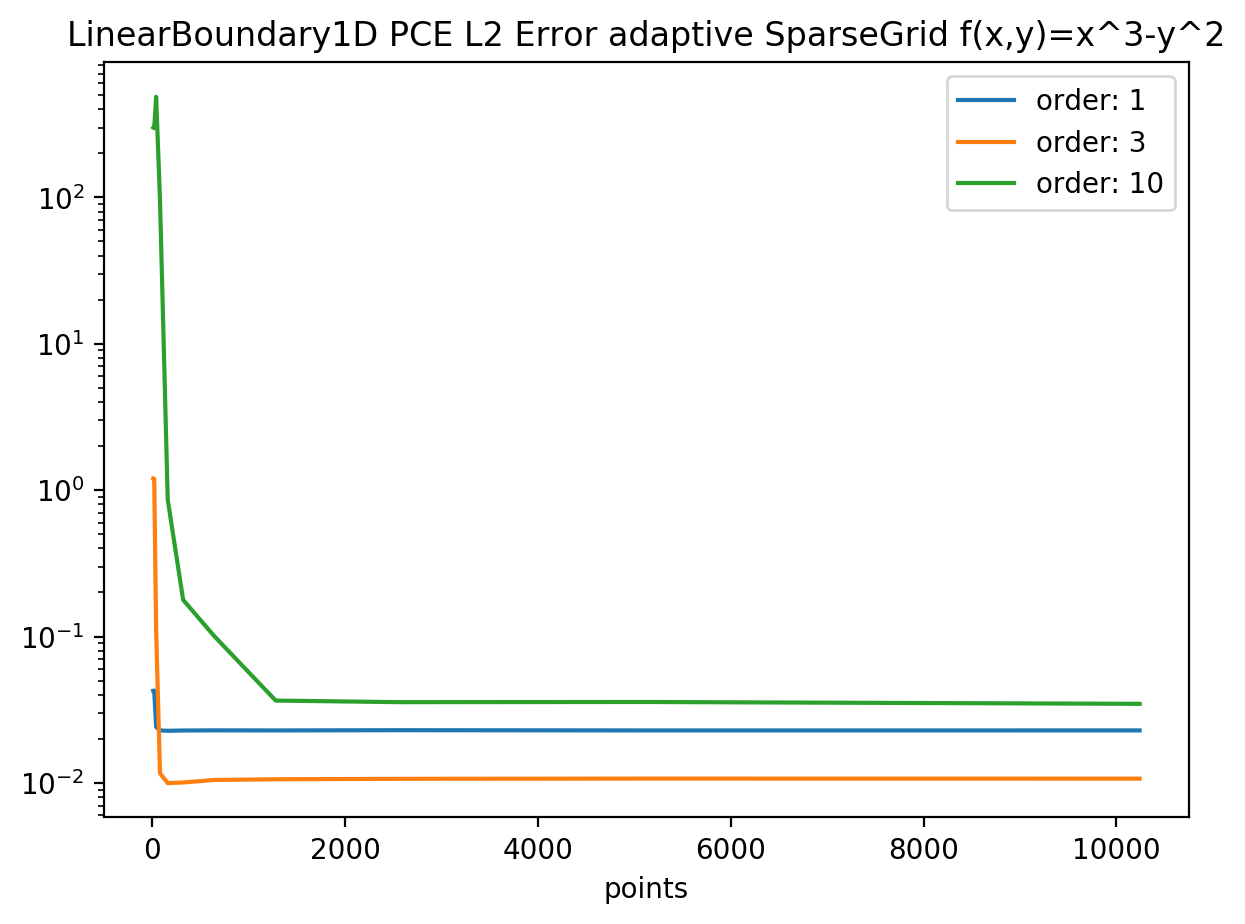

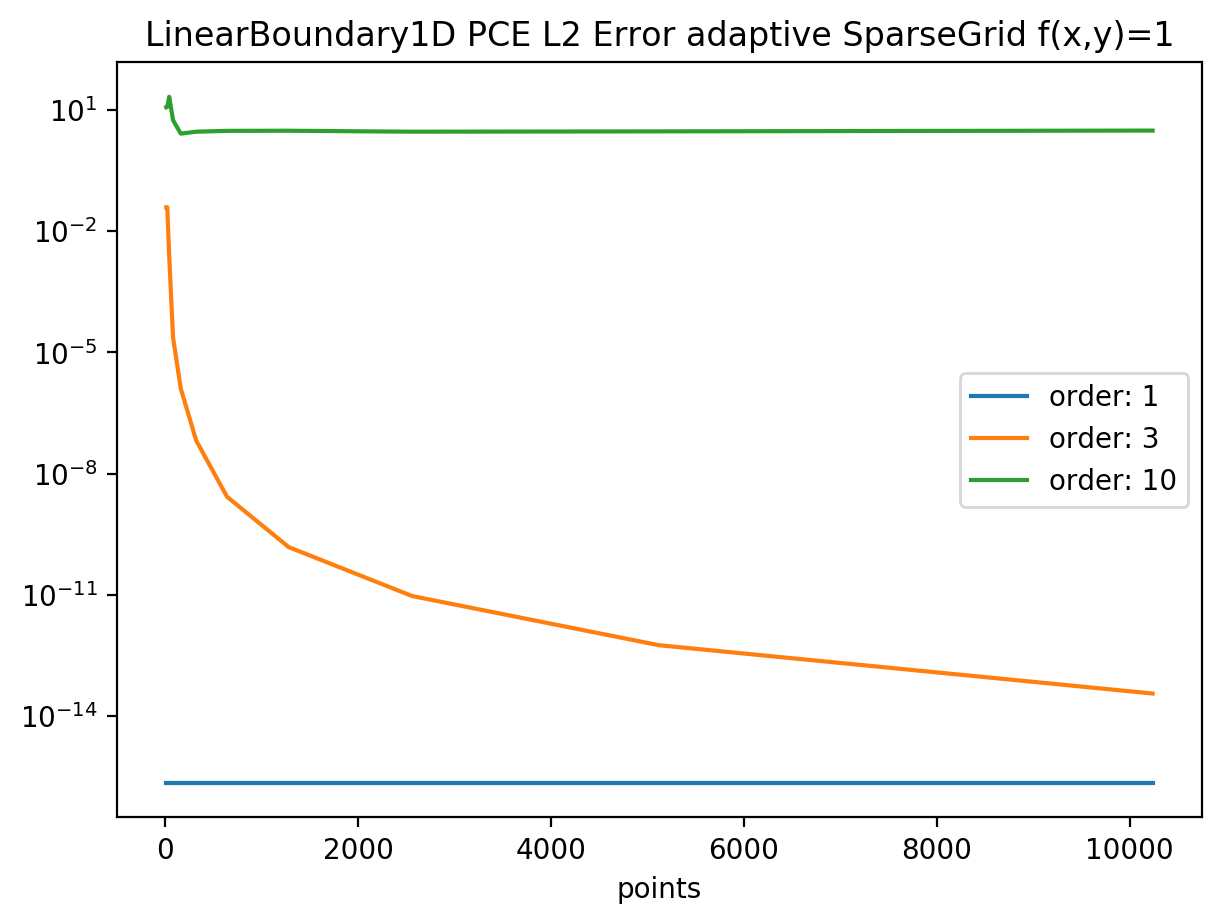

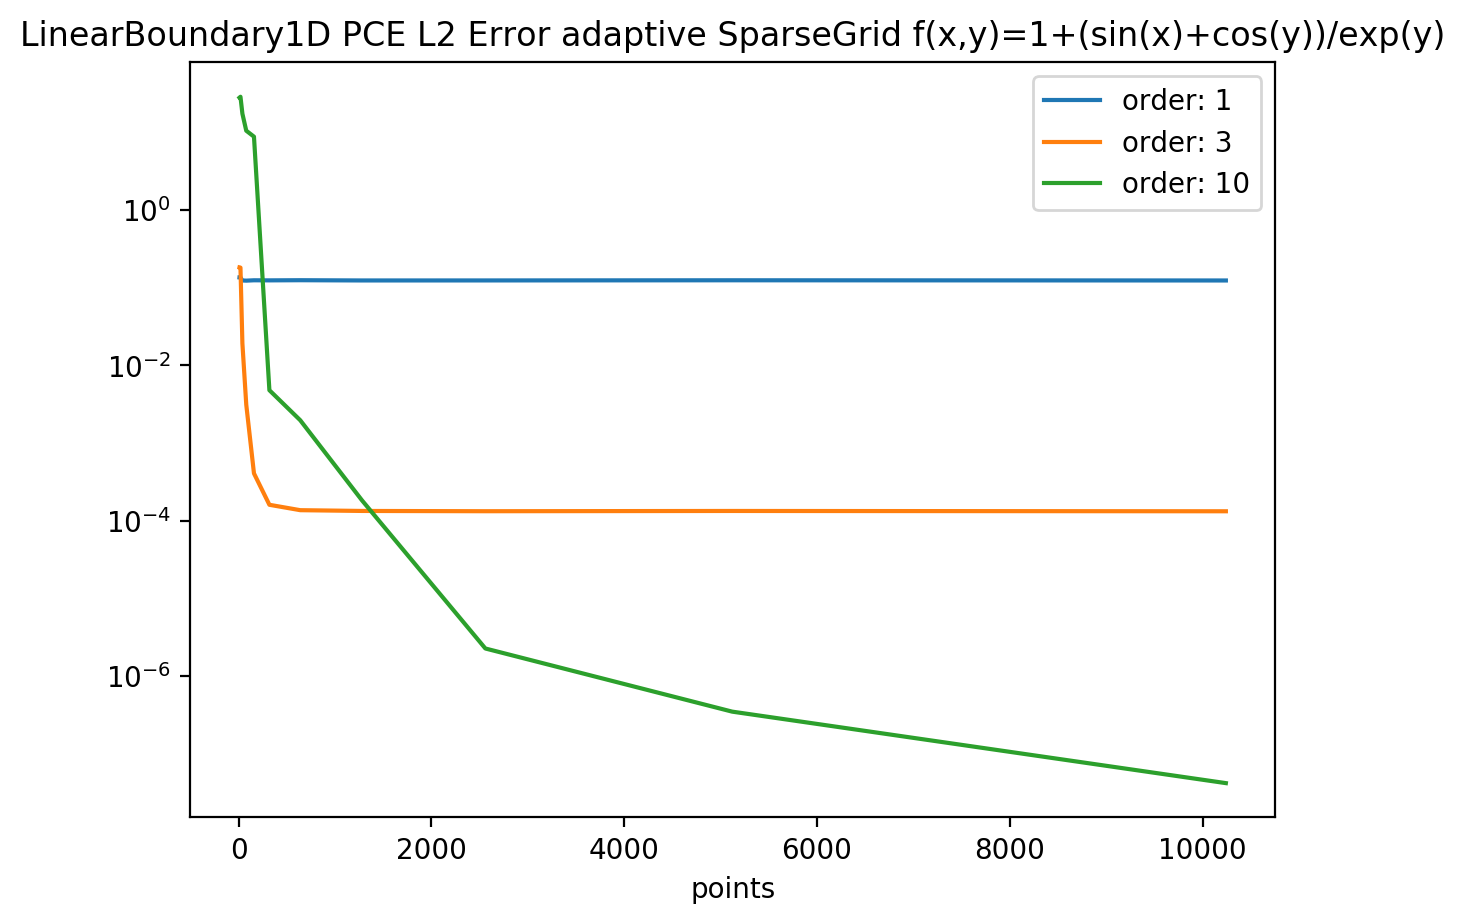

In [11]:
printer1D('LinearBoundary1D')

0             1             2             3             4   \
0  1.000000e+01  2.000000e+01  4.000000e+01  8.000000e+01  1.600000e+02   
1 -1.333333e+00 -1.333333e+00 -1.333333e+00 -1.333333e+00 -1.333333e+00   
2  4.000000e+00  4.000000e+00  4.000000e+00  4.000000e+00  4.000000e+00   
3  7.861380e+00  7.861380e+00  7.866506e+00  7.866836e+00  7.866842e+00   
4  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
5  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
6  1.512309e-08  1.729524e-08  2.067857e-10  8.569000e-13  5.060000e-14   

             5           6            7            8   \
0  3.200000e+02  640.000000  1280.000000  2560.000000   
1 -1.333333e+00   -1.333333    -1.333333    -1.333333   
2  4.000000e+00    4.000000     4.000000     4.000000   
3  7.866843e+00    7.866843     7.866843     7.866843   
4  0.000000e+00    0.000000     0.000000     0.000000   
5  0.000000e+00    0.000000     0.000000     0.000000   
6  1.300000e-15    0.000000     0.000000     0.000000   

                                                9   \
0                                             5120   
1  353313147248370164682356424704.0000000000000000   
2                               4.0000000000000000   
3                               7.8668429923871415   
4                               0.0403185203501333   
5                               0.0000000000000000   
6                               0.0000000000000000   

                                                10  11  
0                                            10240 NaN  
1  373554630270852823649102069760.0000000000000000 NaN  
2                               4.0000000000000000 NaN  
3                               7.8668429924003869 NaN  
4                               0.0862605068367788 NaN  
5                               0.0000000000000000 NaN  
6                               0.0000000000000000 NaN

TypeError: unsupported operand type(s) for -: 'str' and 'int'

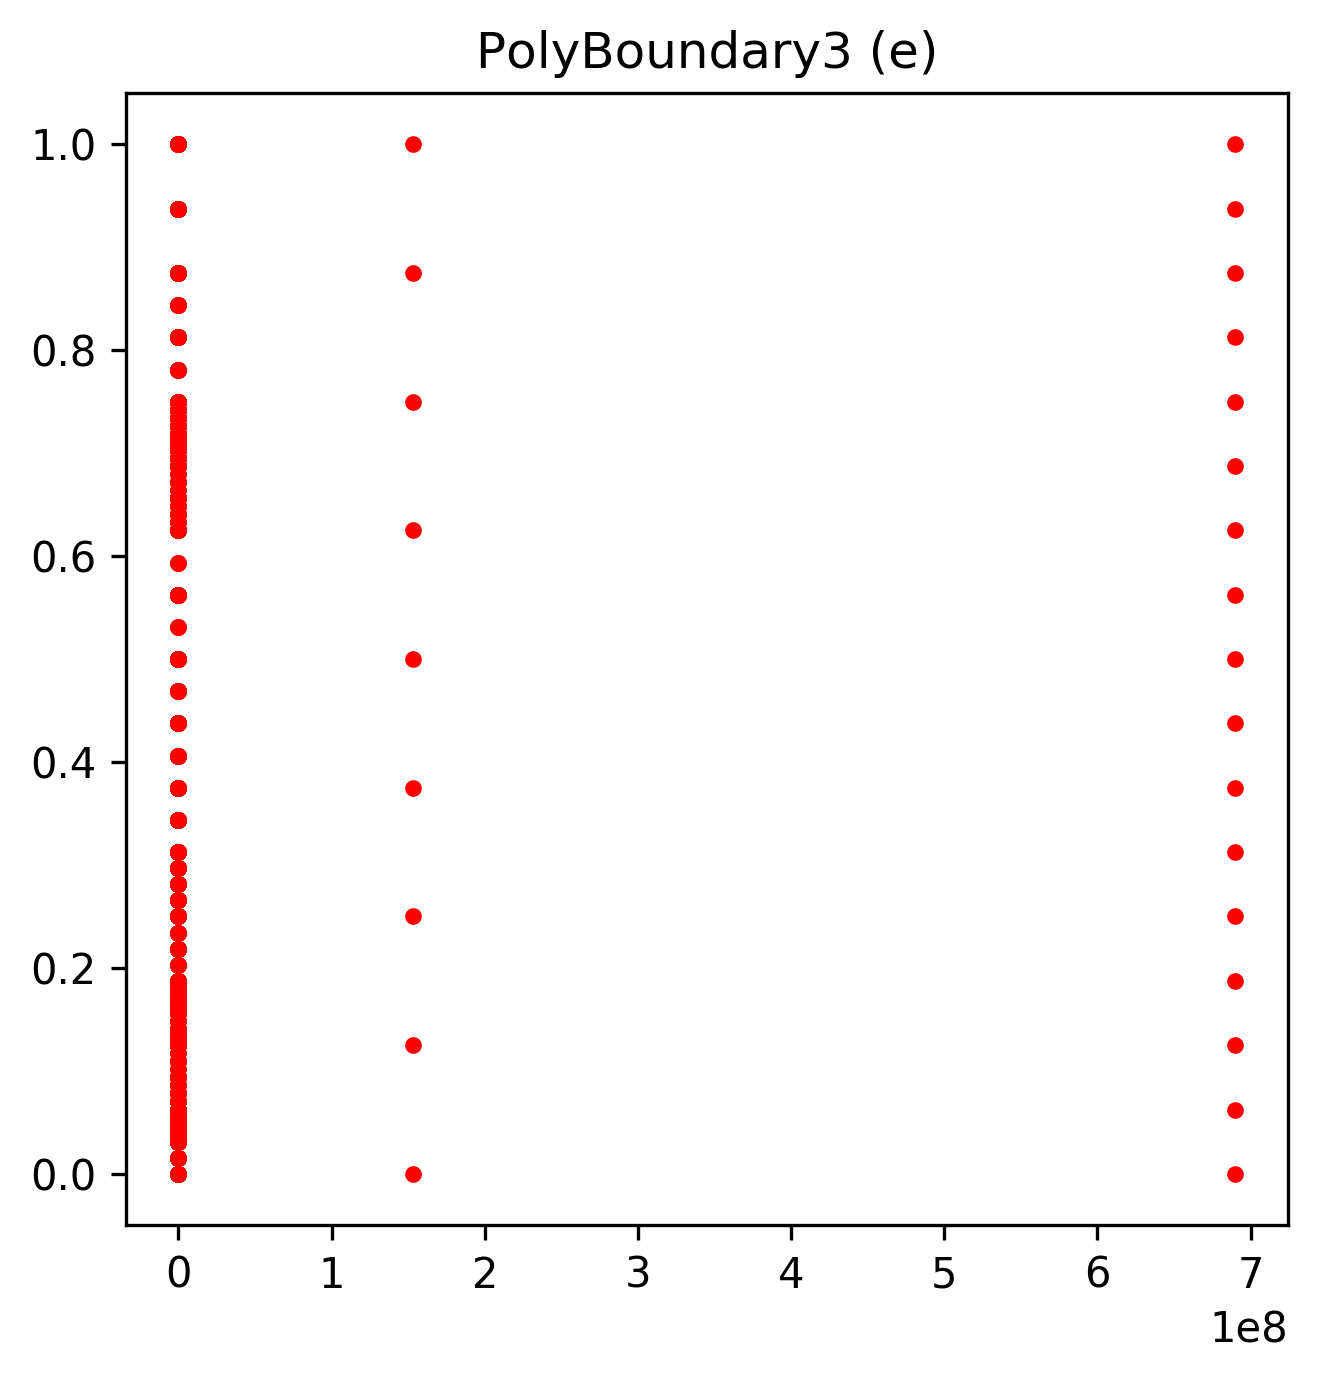

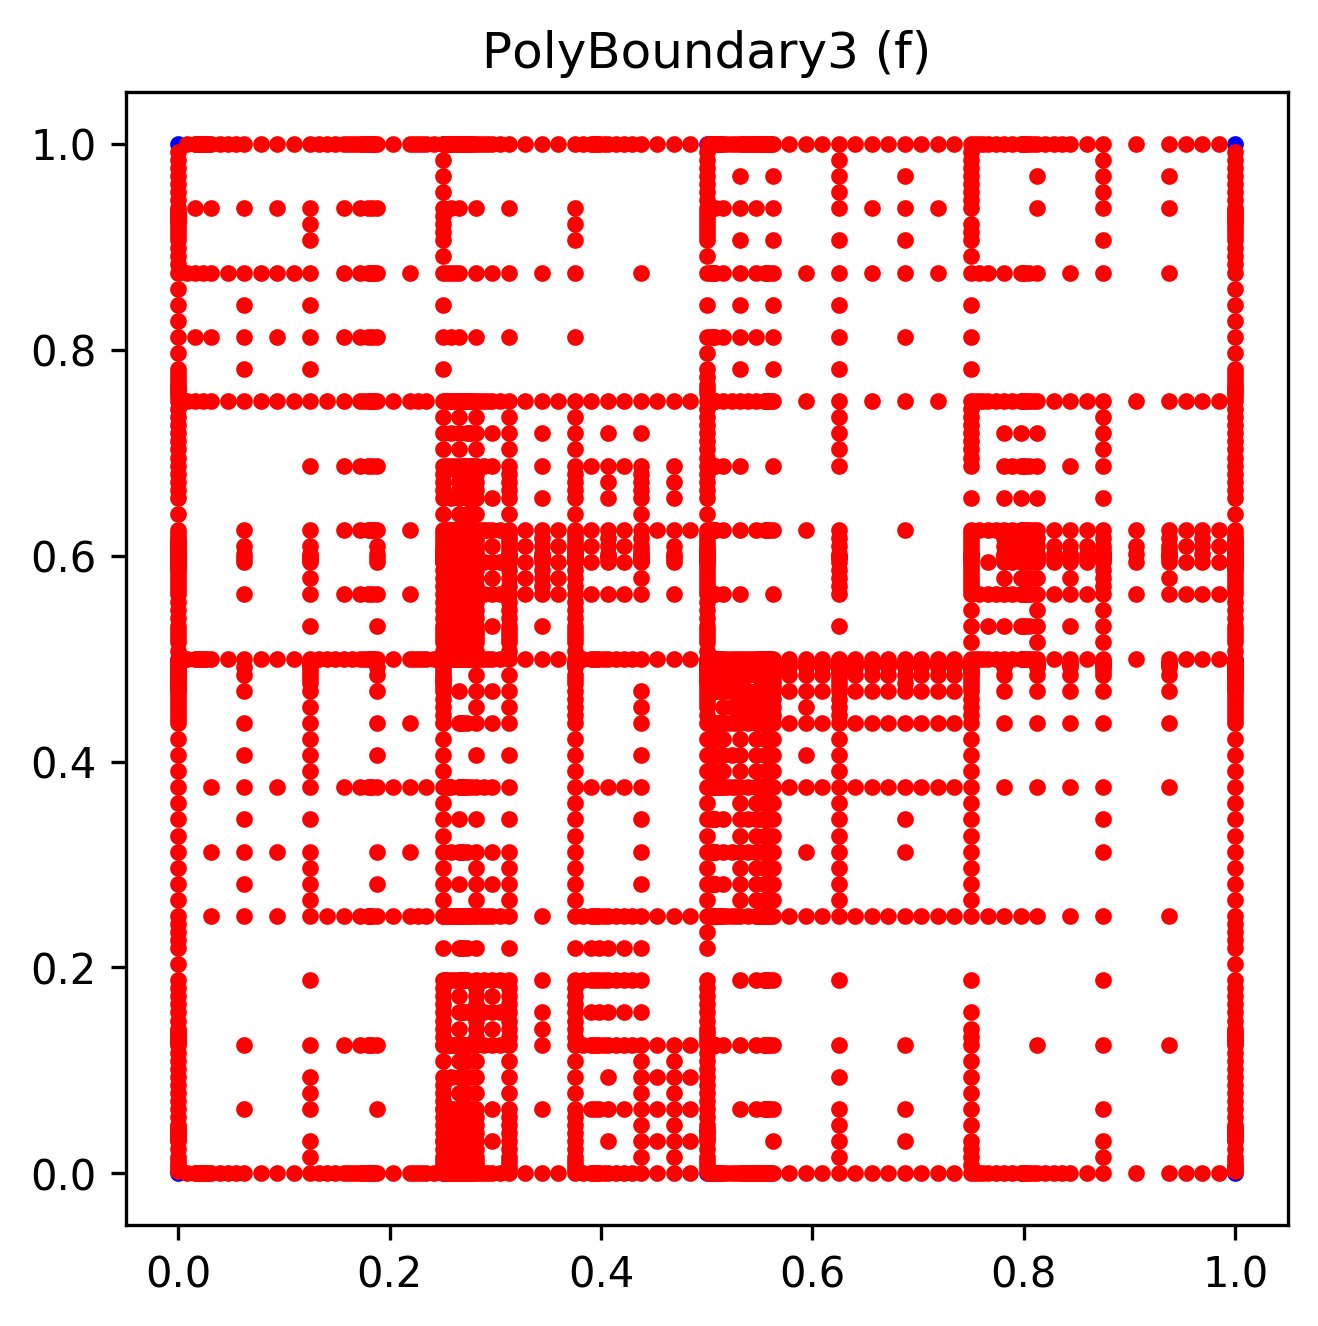

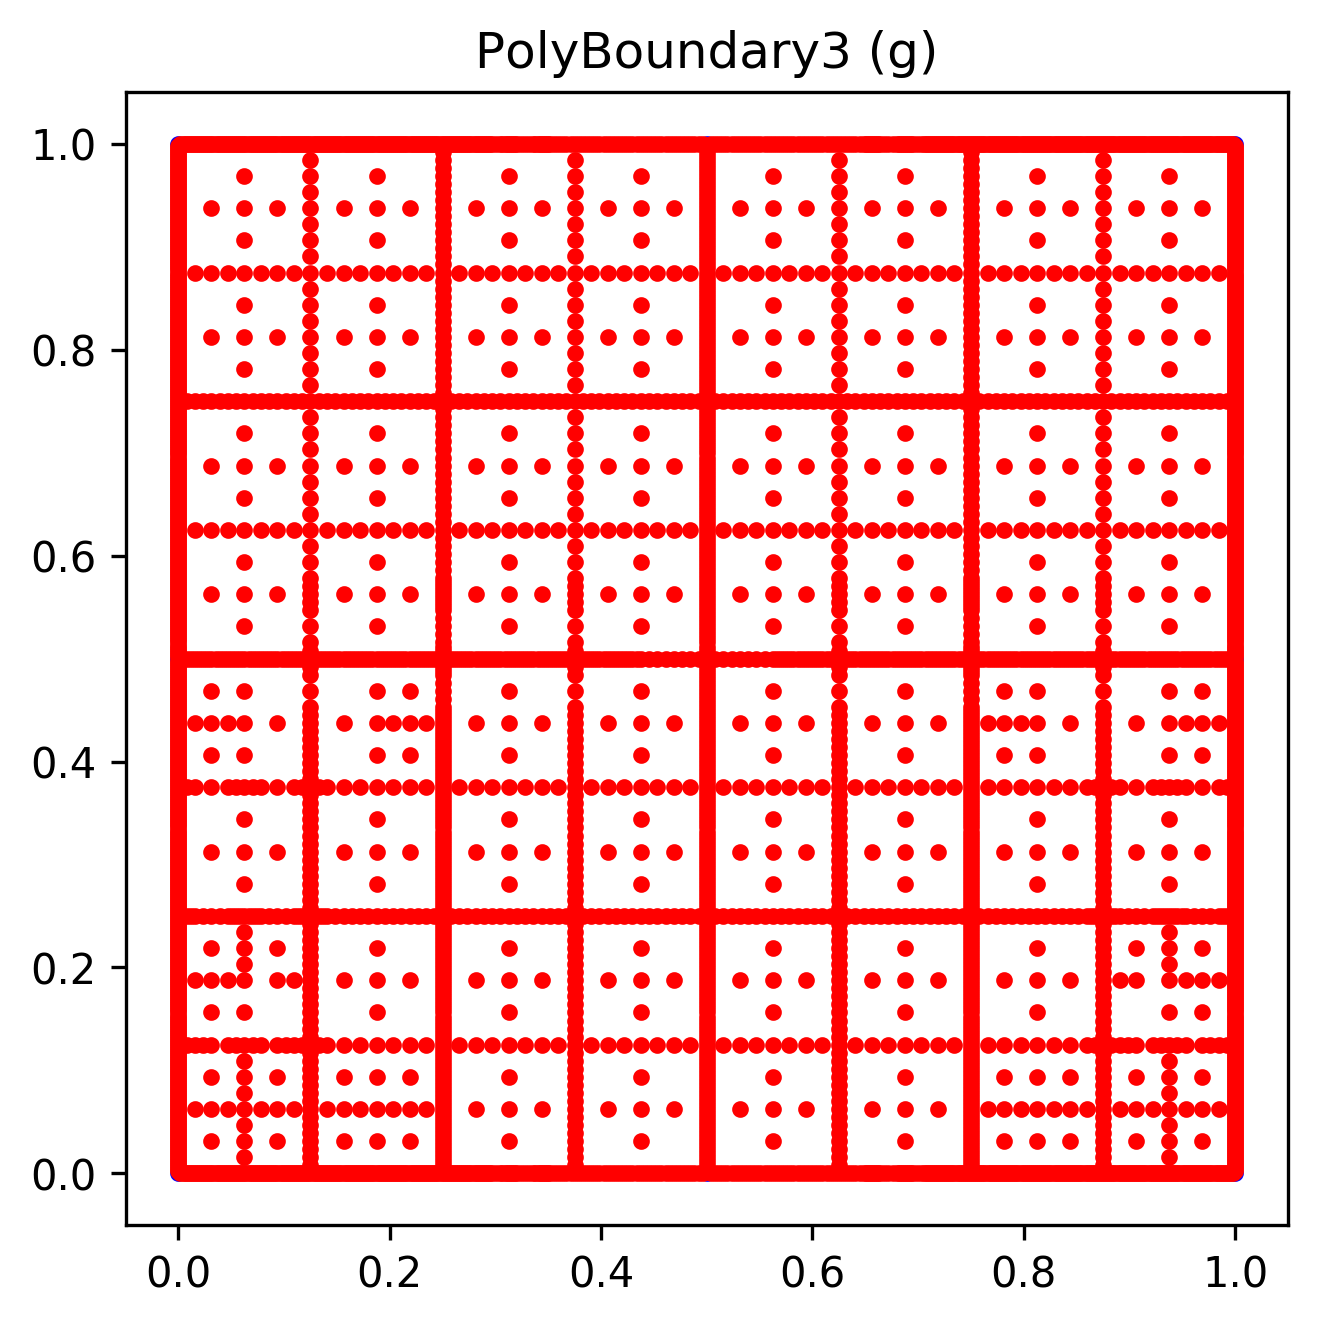

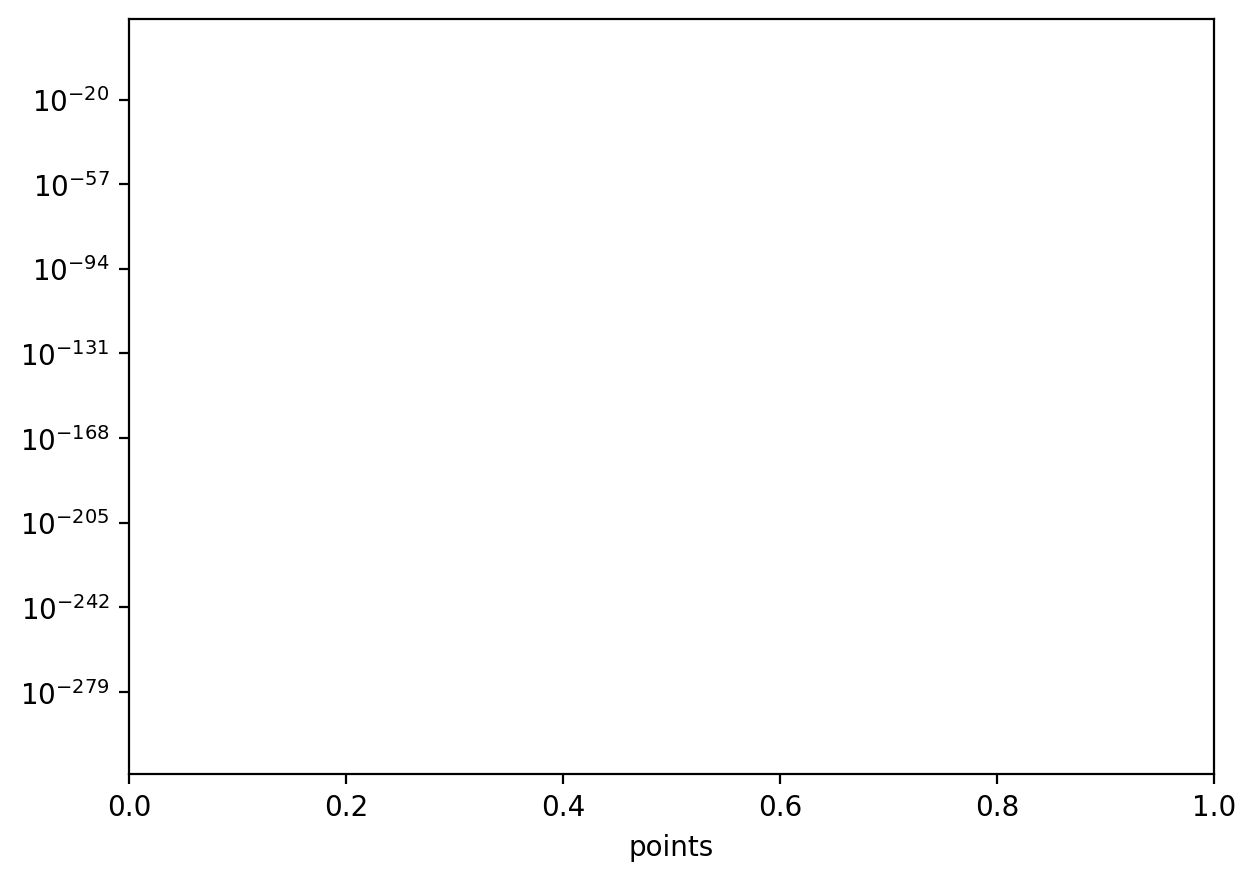

In [27]:
printer('PolyBoundary3')

0             1             2             3             4   \
0   5.000000e+01  7.500000e+01  1.120000e+02  1.680000e+02  2.520000e+02   
1  -1.333333e+00 -1.333333e+00 -1.333333e+00 -1.333333e+00 -1.333333e+00   
2   4.000000e+00  4.000000e+00  4.000000e+00  4.000000e+00  4.000000e+00   
3   7.866879e+00  7.866879e+00  7.866846e+00  7.866846e+00  7.866843e+00   
4   0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
5   0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
6   5.310632e-10  5.360277e-10  9.032900e-12  1.787900e-12  2.740000e-14   
7  -1.333333e+00 -1.333333e+00 -1.333333e+00 -1.333333e+00 -1.333333e+00   
8   4.000000e+00  4.000000e+00  4.000000e+00  4.000000e+00  4.000000e+00   
9   7.866842e+00  7.866842e+00  7.866842e+00  7.866843e+00  7.866843e+00   
10  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
11  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
12  8.286440e-11  8.308250e-11  8.499630e-11  1.672000e-13  1.672000e-13   
13 -1.318450e+00 -1.328467e+00 -1.330155e+00 -1.332586e+00 -1.332080e+00   
14  4.000000e+00  4.000000e+00  4.000000e+00  4.000000e+00  4.000000e+00   
15  7.863257e+00  7.885663e+00  7.872690e+00  7.863916e+00  7.885438e+00   
16  1.115004e-01  1.111319e-01  1.111641e-01  1.119274e-01  1.118735e-01   
17  3.148881e-07  3.172560e-07  3.141437e-07  1.914322e-10  1.911346e-10   
18  6.143172e-01  6.039768e-01  5.953738e-01  1.034868e-02  1.027720e-02   
19  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
20  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
21  2.313042e-01  2.249826e-01  2.308988e-01  1.143383e-03  1.116677e-03   
22  1.240477e-01  1.228949e-01  1.238021e-01  1.234858e-01  1.228069e-01   
23  6.035389e-04  6.003730e-04  6.045915e-04  6.034182e-04  6.085918e-04   
24  1.265229e+00  1.273238e+00  1.297115e+00  1.128636e-02  1.141243e-02   
25  1.119127e-01  1.120836e-01  1.108025e-01  1.114456e-01  1.117815e-01   
26  3.509745e-07  4.258031e-10  2.708100e-12  7.728000e-13  2.120000e-14   
27  1.261737e+00  1.188045e+00  1.817701e-02  9.187934e-03  6.418218e-04   
28  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
29  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
30  1.033174e+00  4.361996e-01  3.426593e-01  4.695217e-04  3.704939e-07   
31  1.247756e-01  1.242520e-01  1.228620e-01  1.225843e-01  1.234720e-01   
32  6.055967e-04  6.001331e-04  6.032750e-04  6.006336e-04  6.010648e-04   
33  6.154717e+00  5.797774e+00  1.720038e-01  4.278730e-04  2.965008e-05   
34  1.130000e+02  1.130000e+02  1.130000e+02  2.570000e+02  2.570000e+02   

              5             6             7             8             9   10  
0   3.780000e+02  5.670000e+02  8.500000e+02  1.275000e+03  1.912000e+03 NaN  
1  -1.333333e+00 -1.333333e+00 -1.333333e+00 -1.333333e+00 -1.333333e+00 NaN  
2   4.000000e+00  4.000000e+00  4.000000e+00  4.000000e+00  4.000000e+00 NaN  
3   7.866843e+00  7.866843e+00  7.866843e+00  7.866843e+00  7.866843e+00 NaN  
4   0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00 NaN  
5   0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00 NaN  
6   2.100000e-15  1.000000e-16  0.000000e+00  0.000000e+00  0.000000e+00 NaN  
7  -1.333333e+00 -1.333333e+00 -1.333333e+00 -1.333333e+00 -1.333333e+00 NaN  
8   4.000000e+00  4.000000e+00  4.000000e+00  4.000000e+00  4.000000e+00 NaN  
9   7.866843e+00  7.866843e+00  7.866843e+00  7.866843e+00  7.866843e+00 NaN  
10  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00 NaN  
11  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00 NaN  
12  4.000000e-16  4.000000e-16  0.000000e+00  0.000000e+00  0.000000e+00 NaN  
13 -1.334235e+00 -1.330628e+00 -1.331552e+00 -1.335787e+00 -1.333935e+00 NaN  
14  4.000000e+00  4.000000e+00  4.000000e+00  4.000000e+00  4.000000e+00 NaN  
15  7.869323e

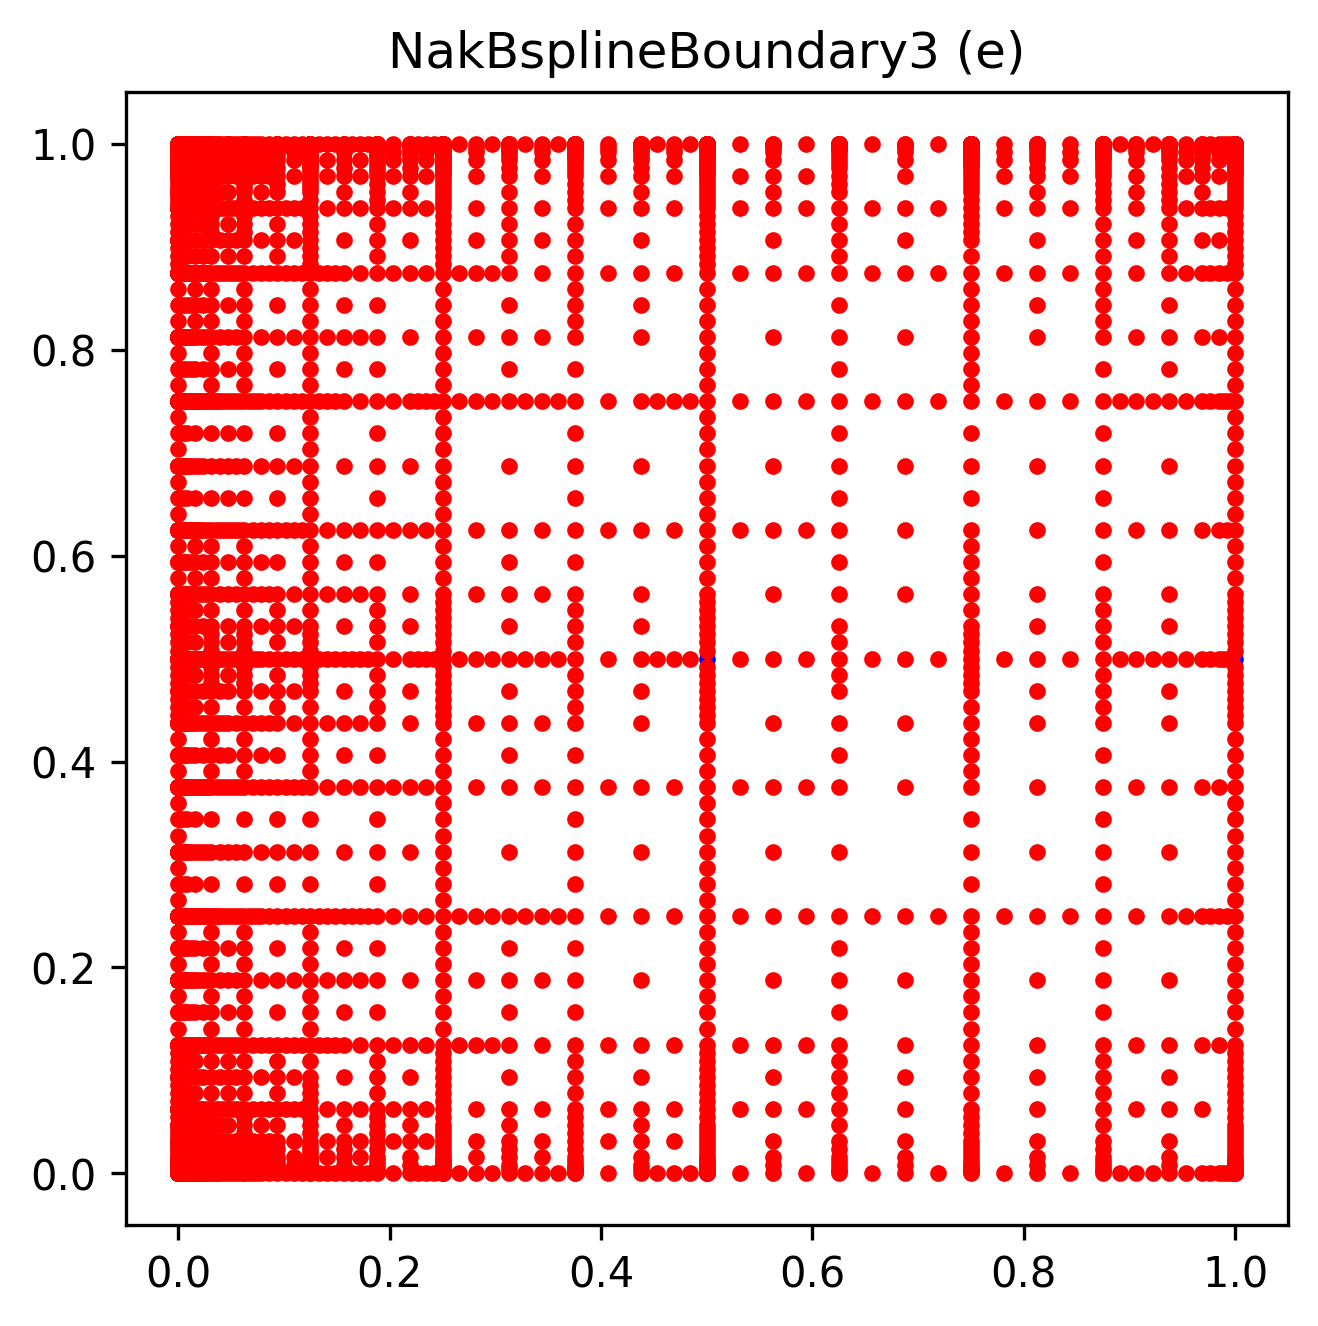

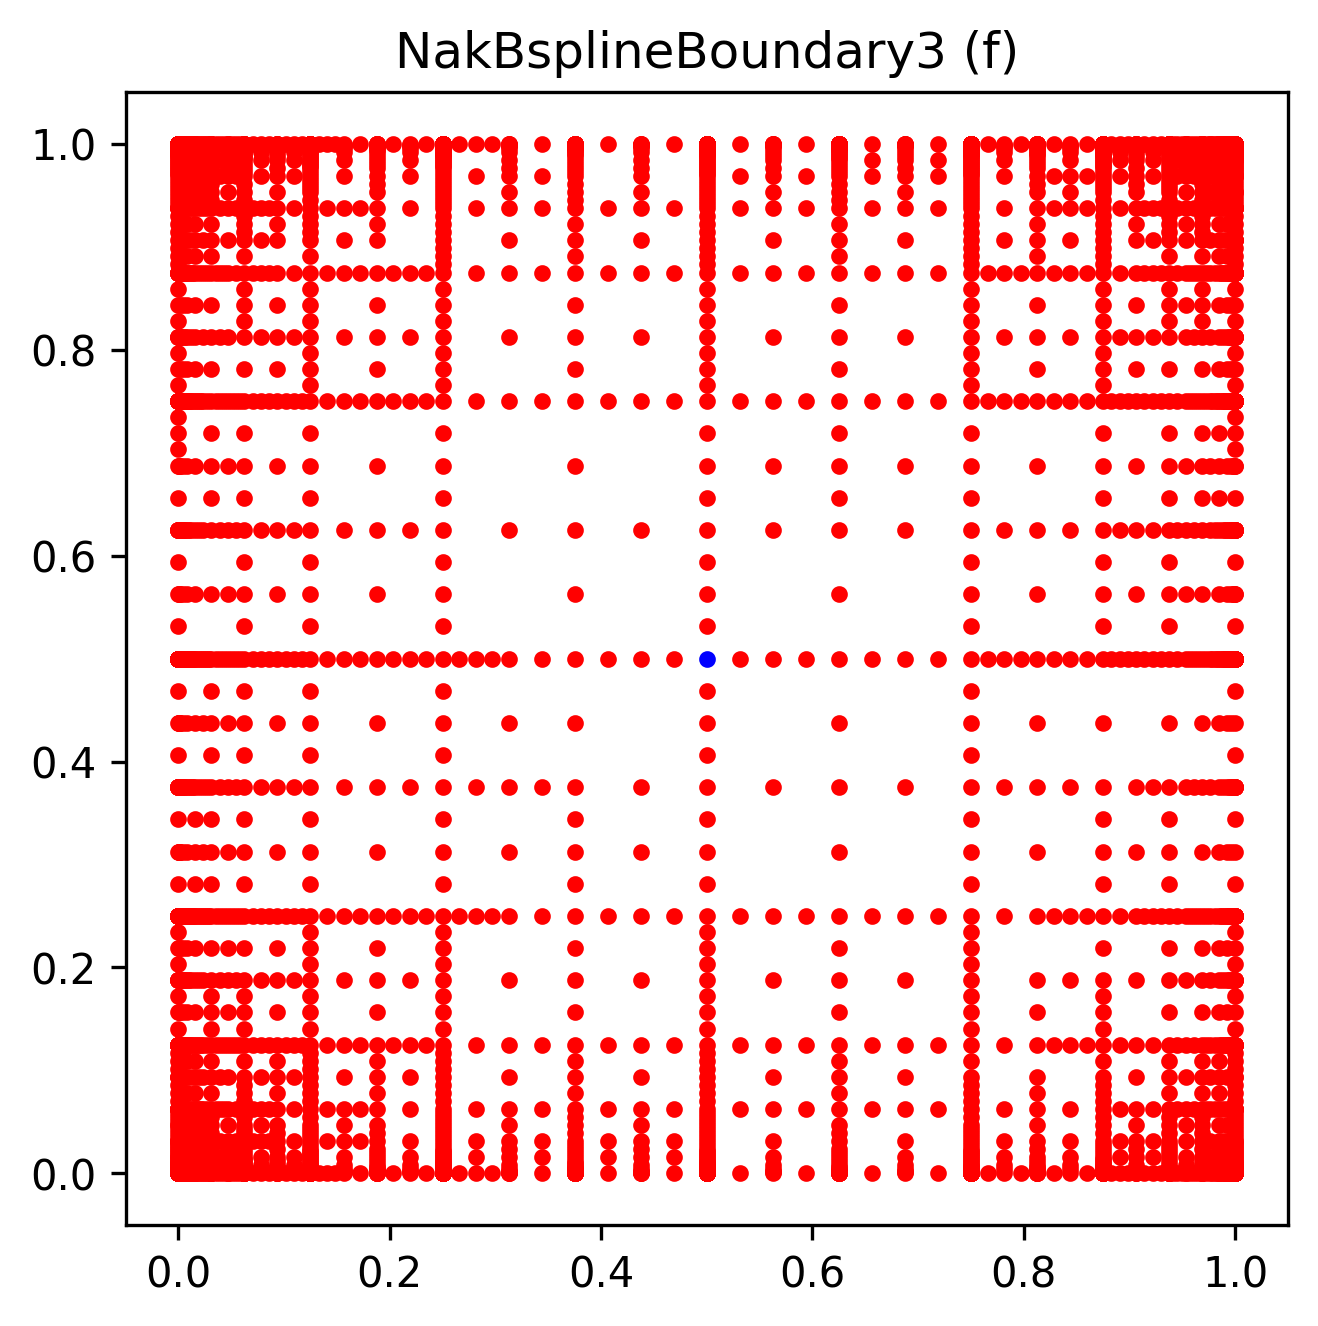

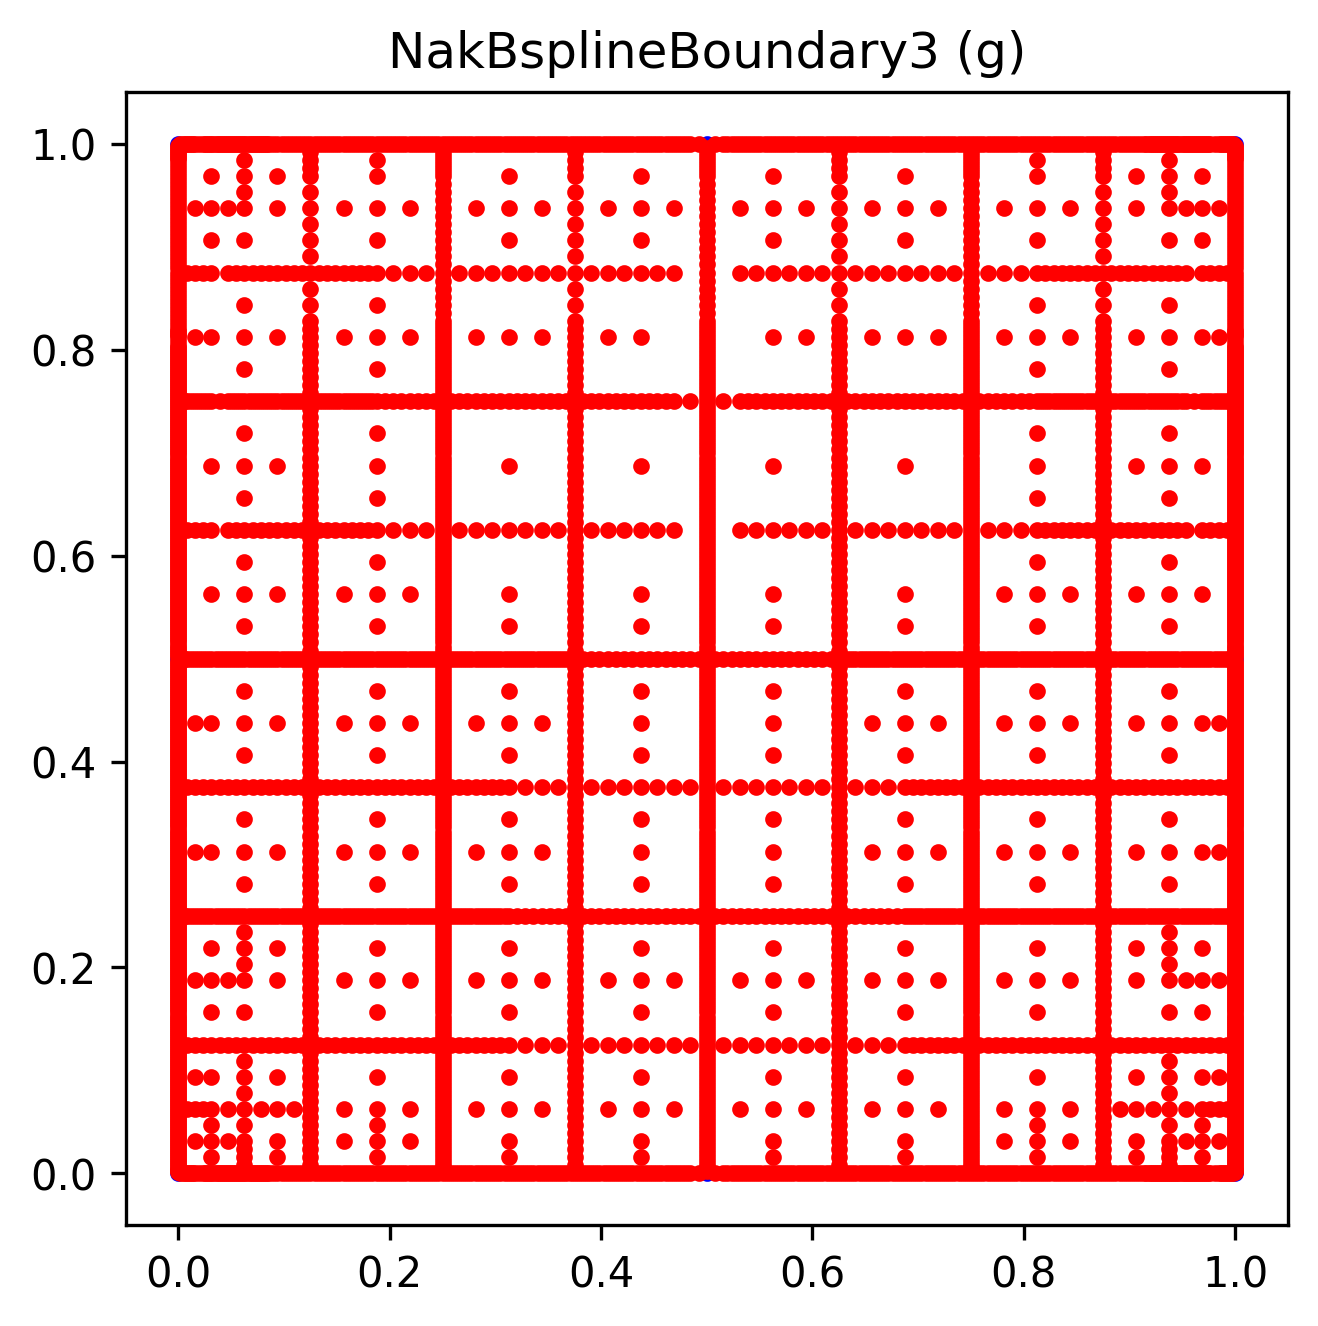

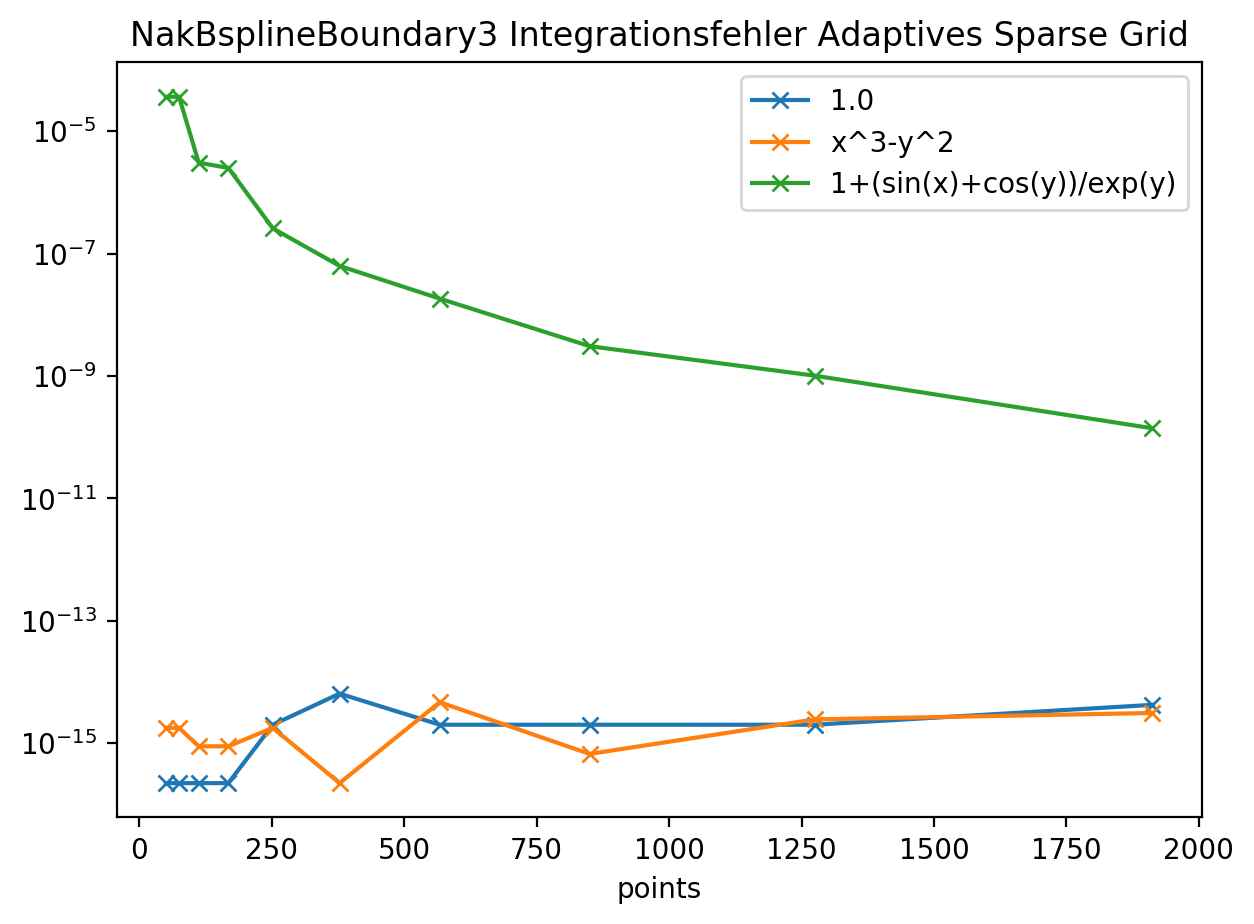

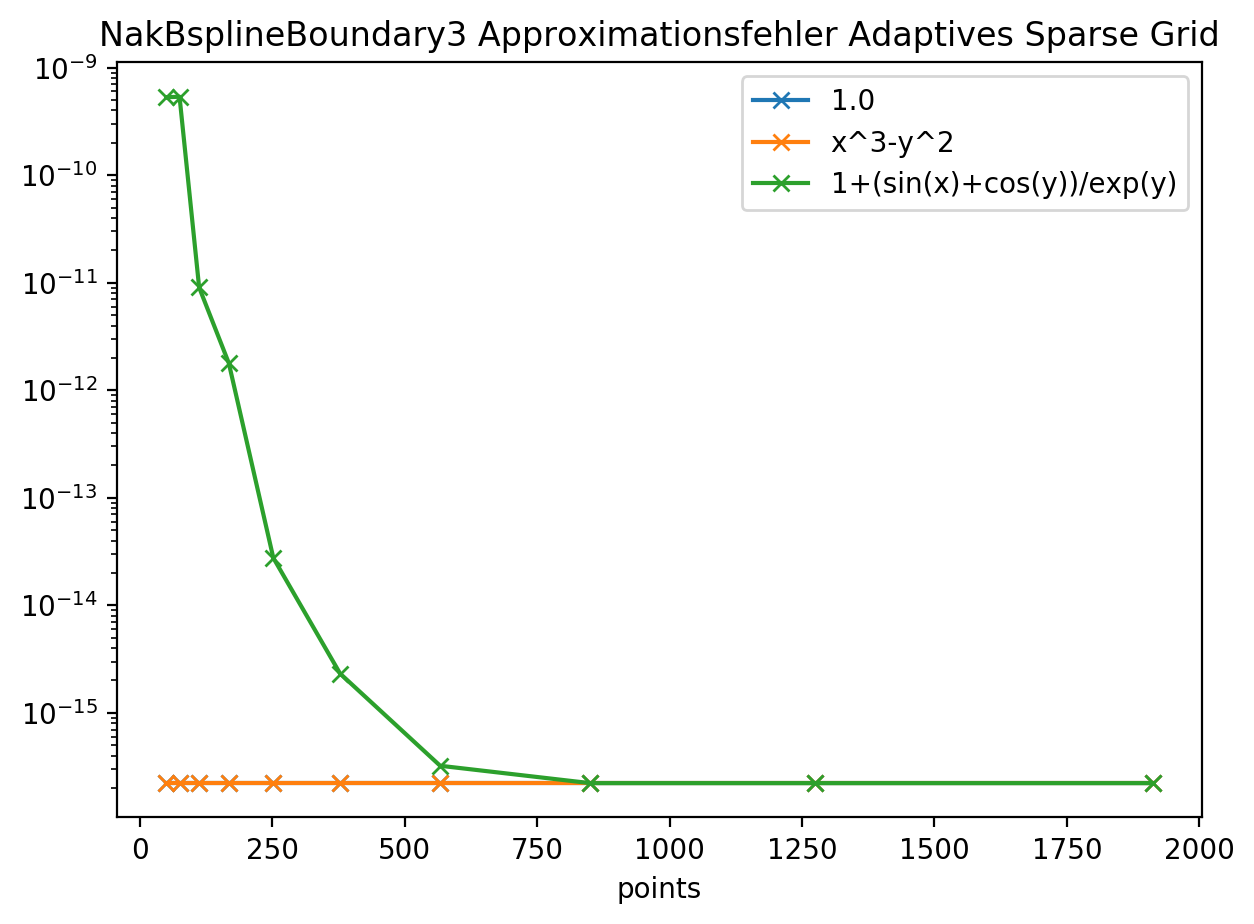

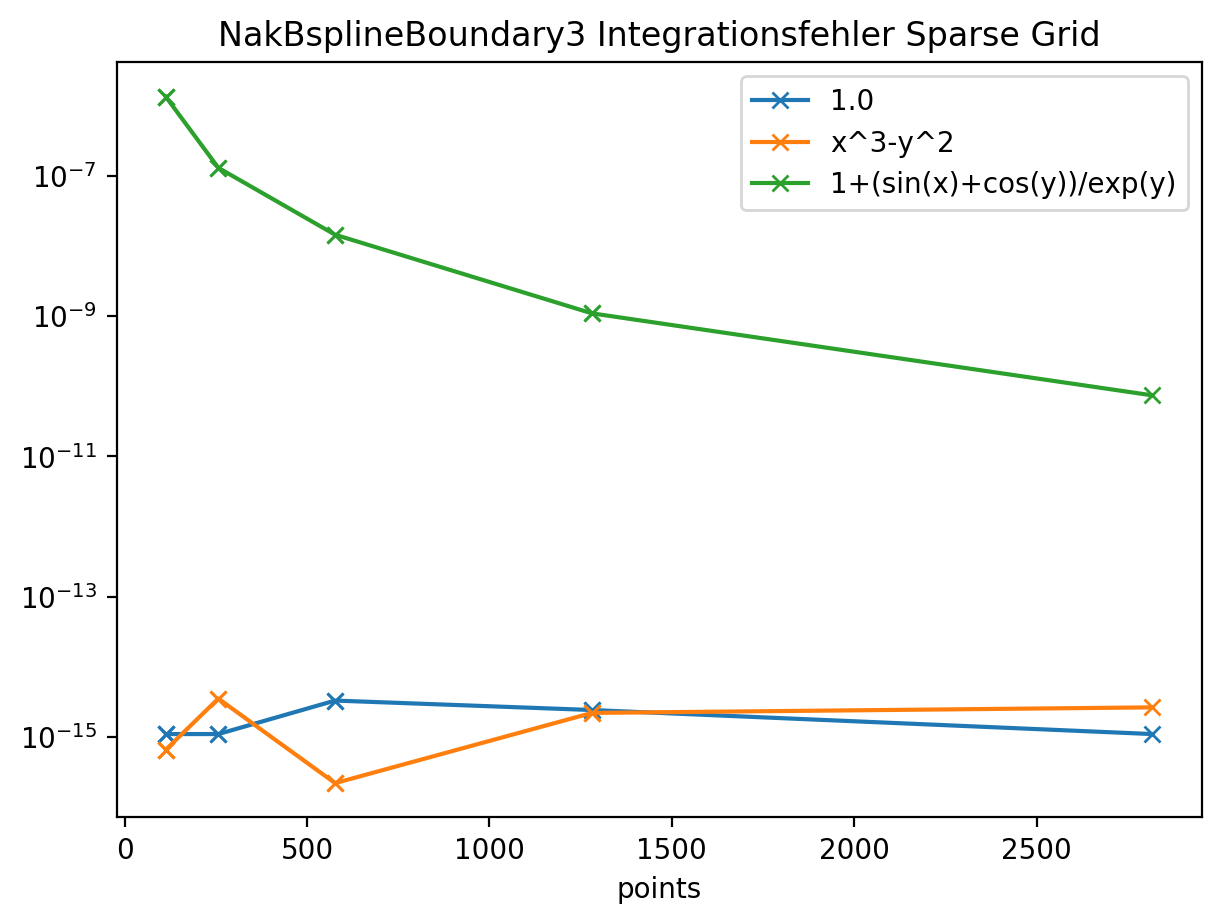

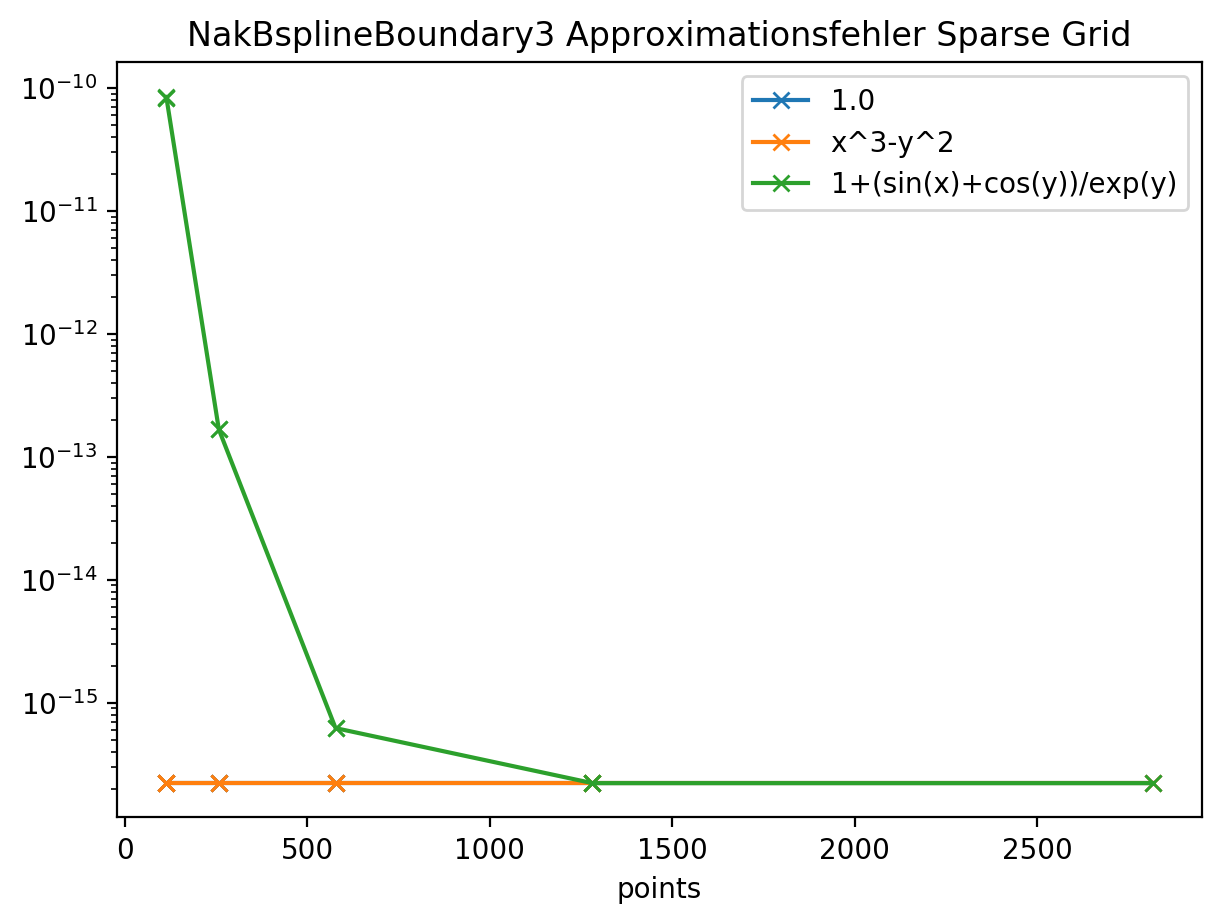

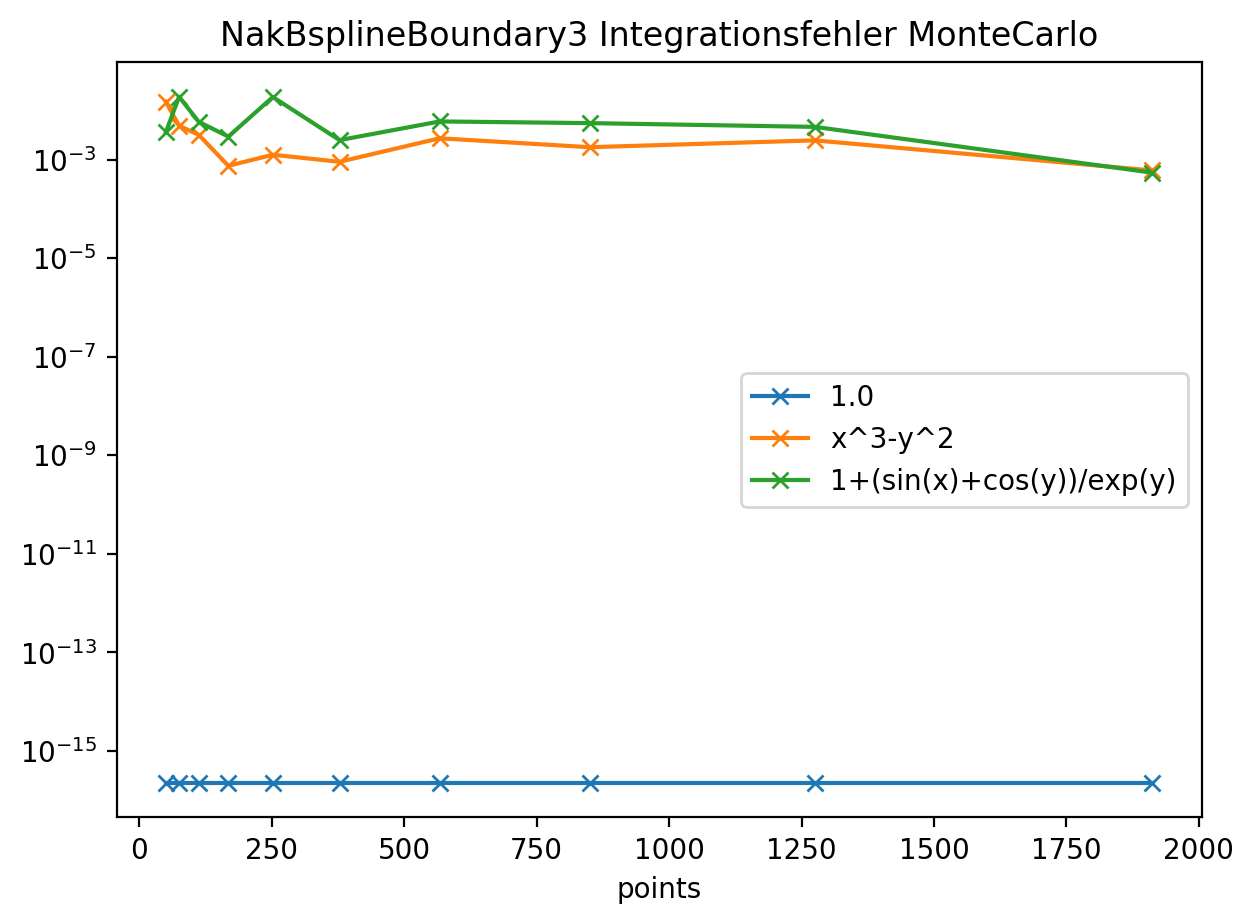

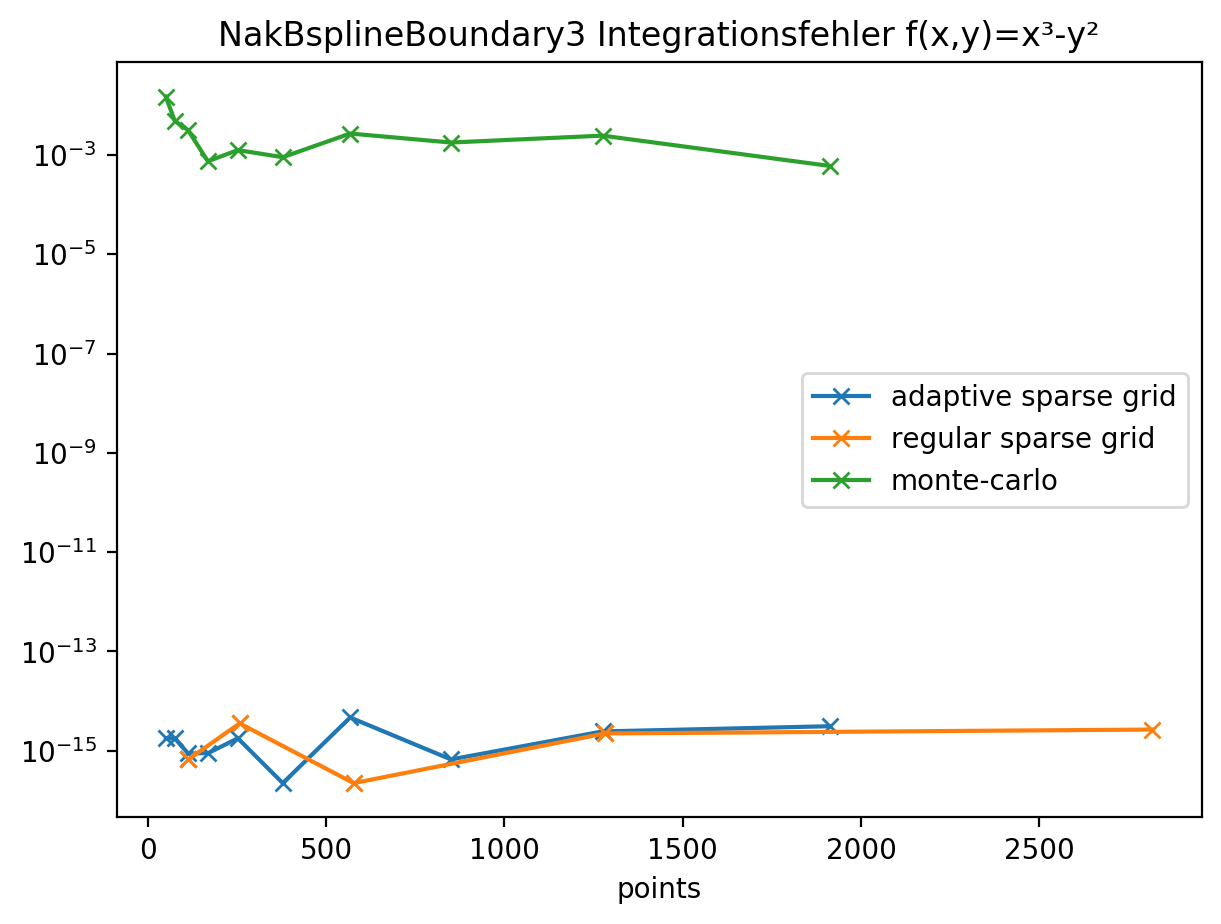

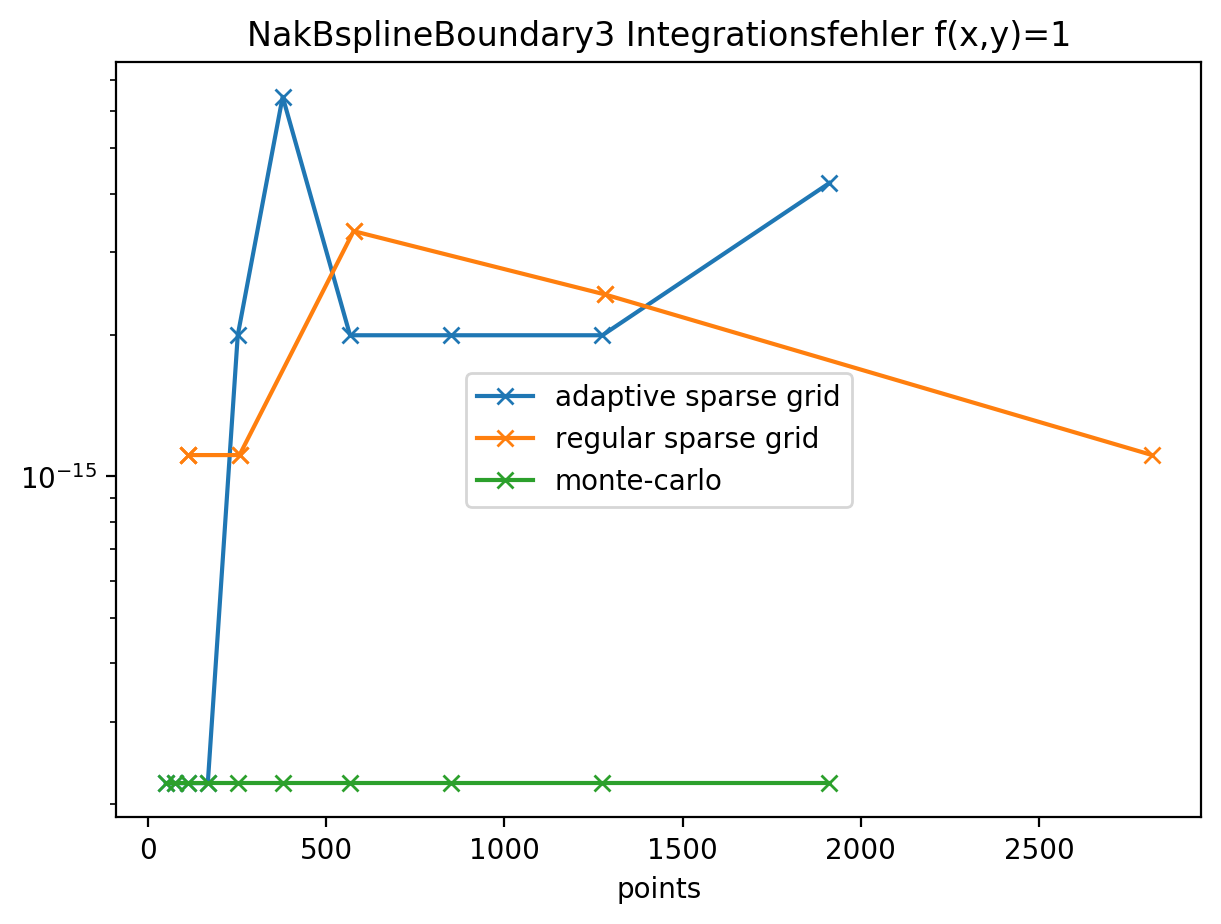

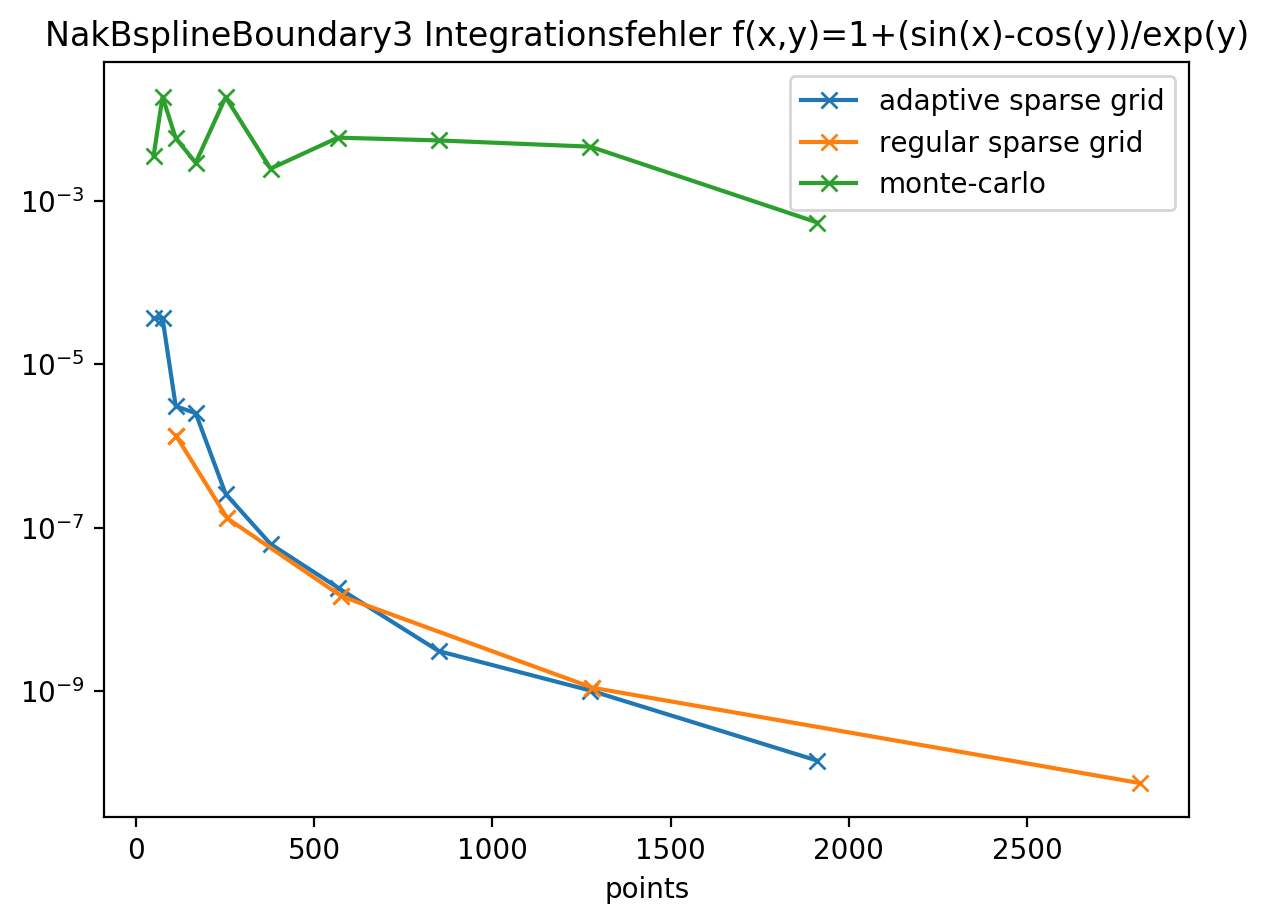

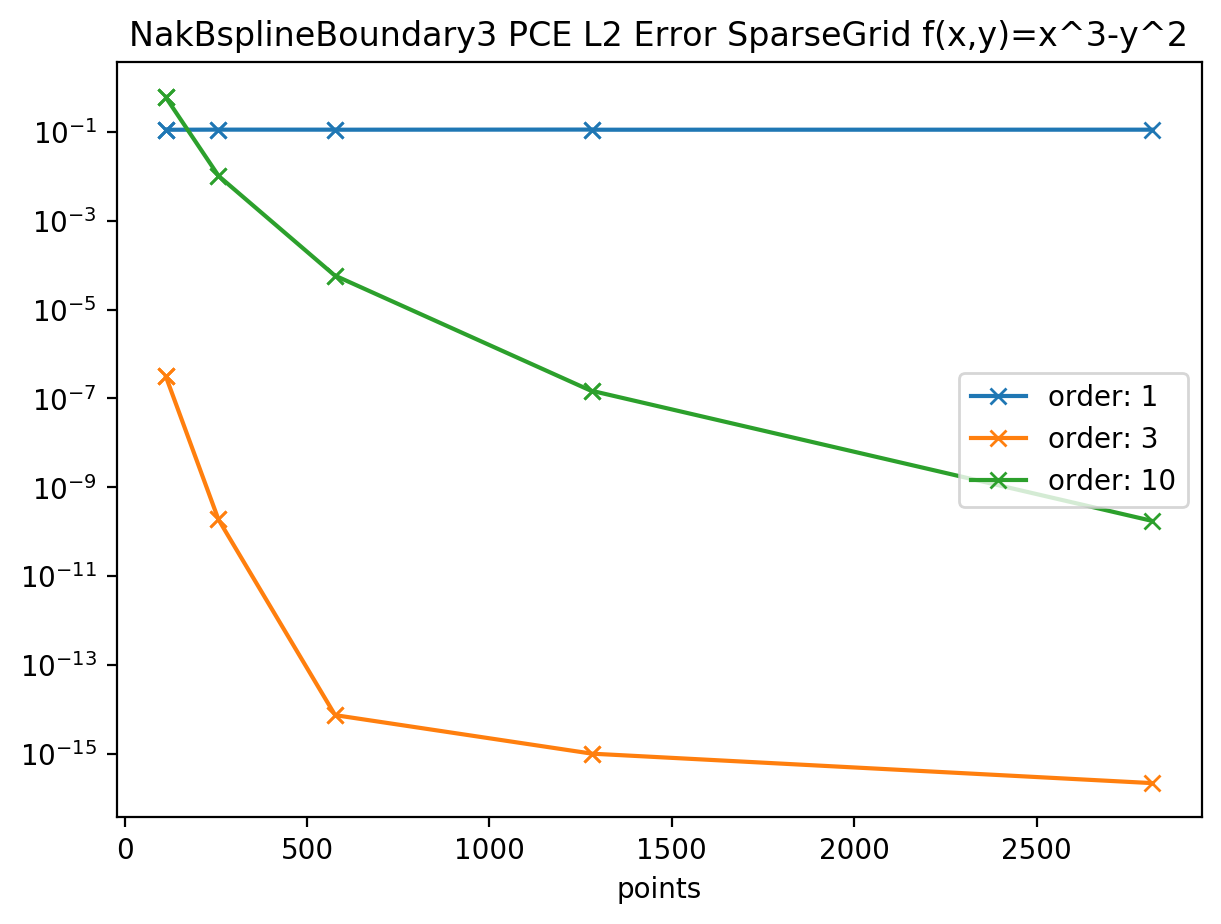

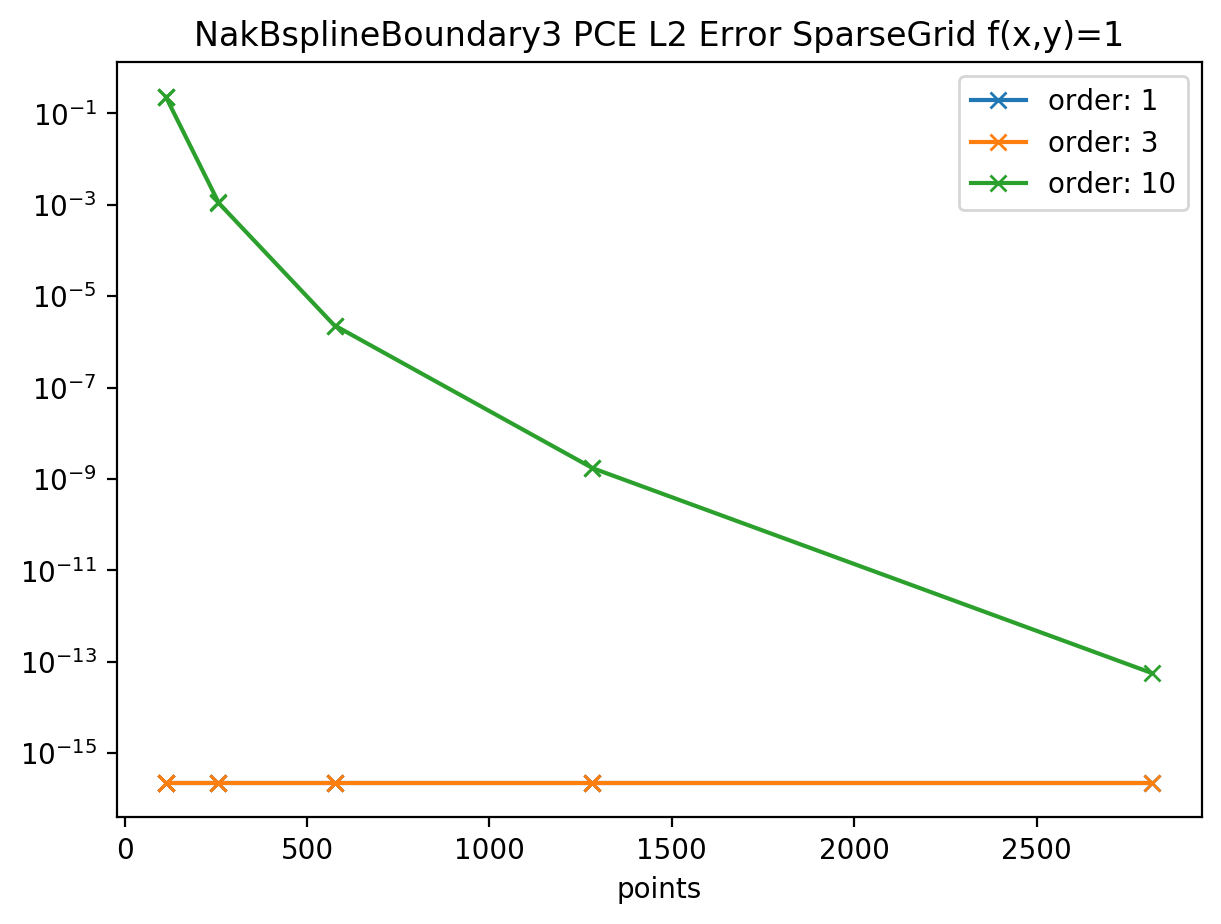

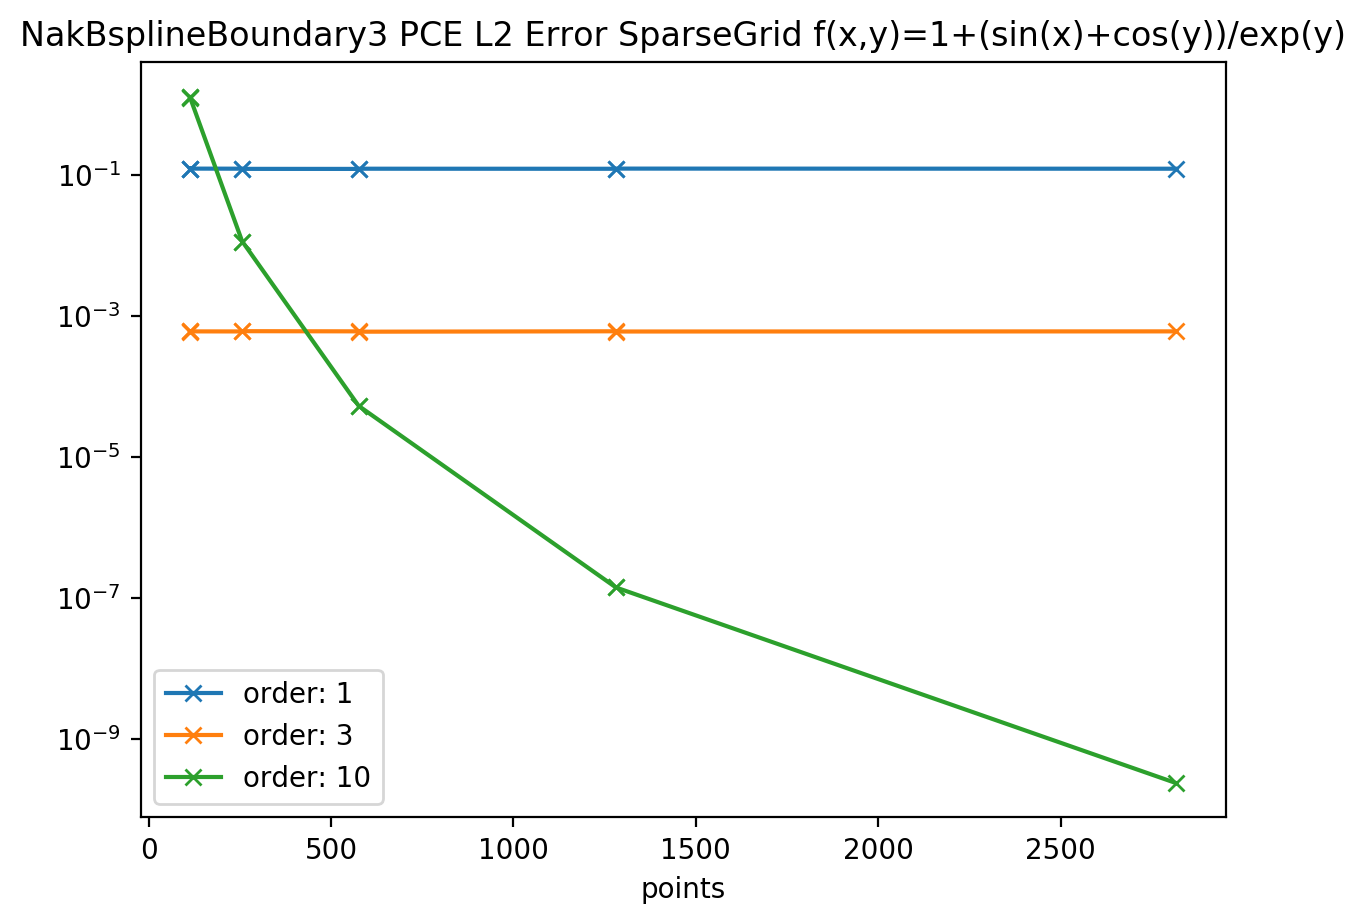

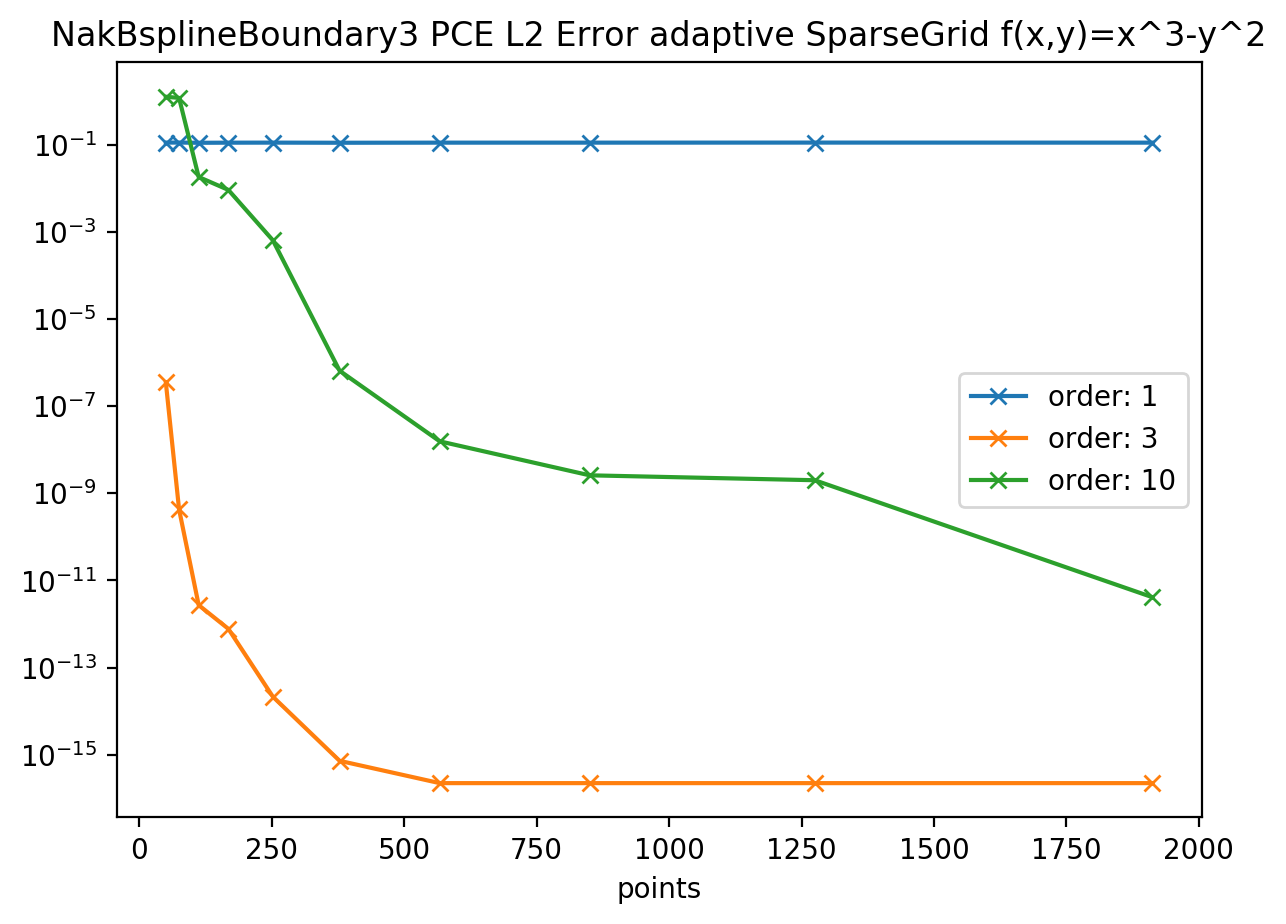

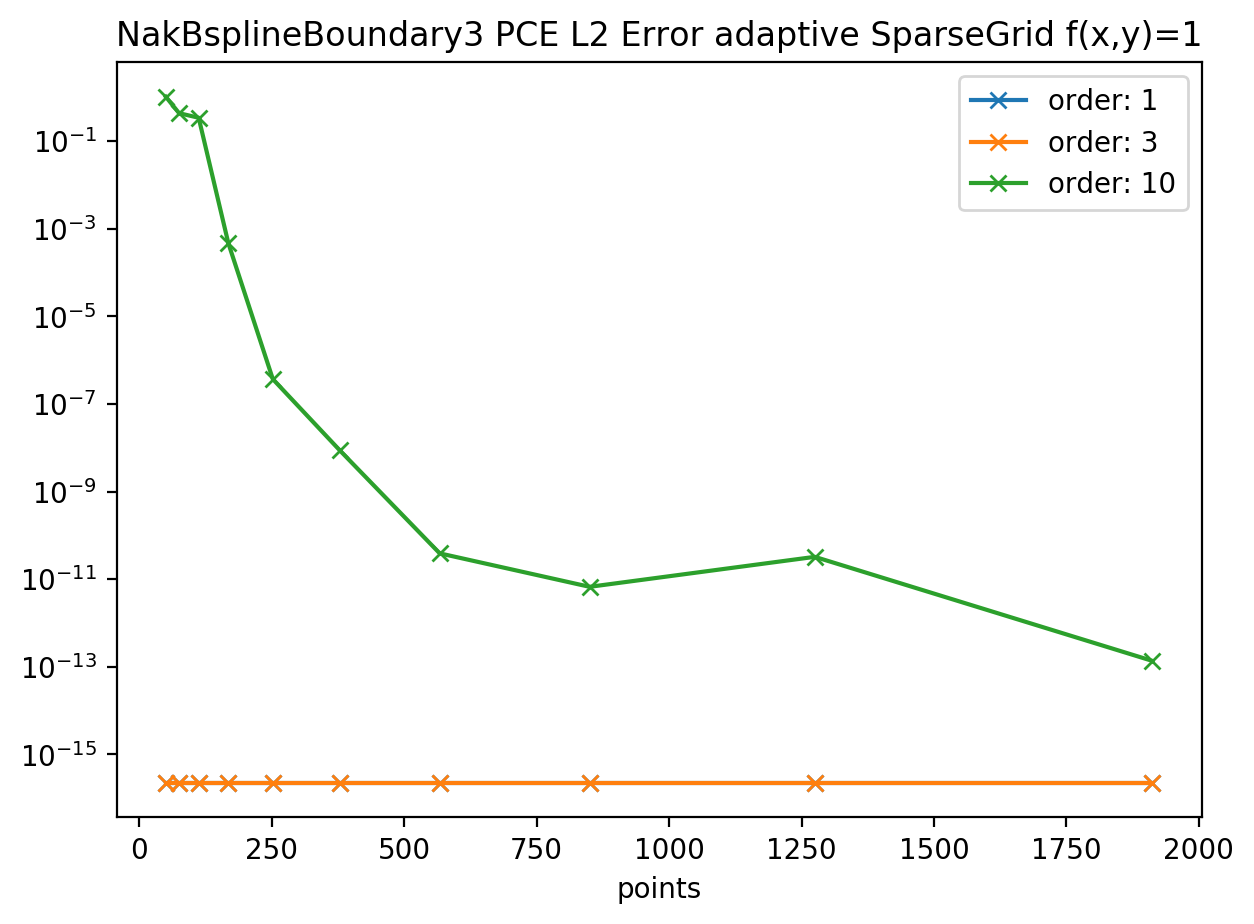

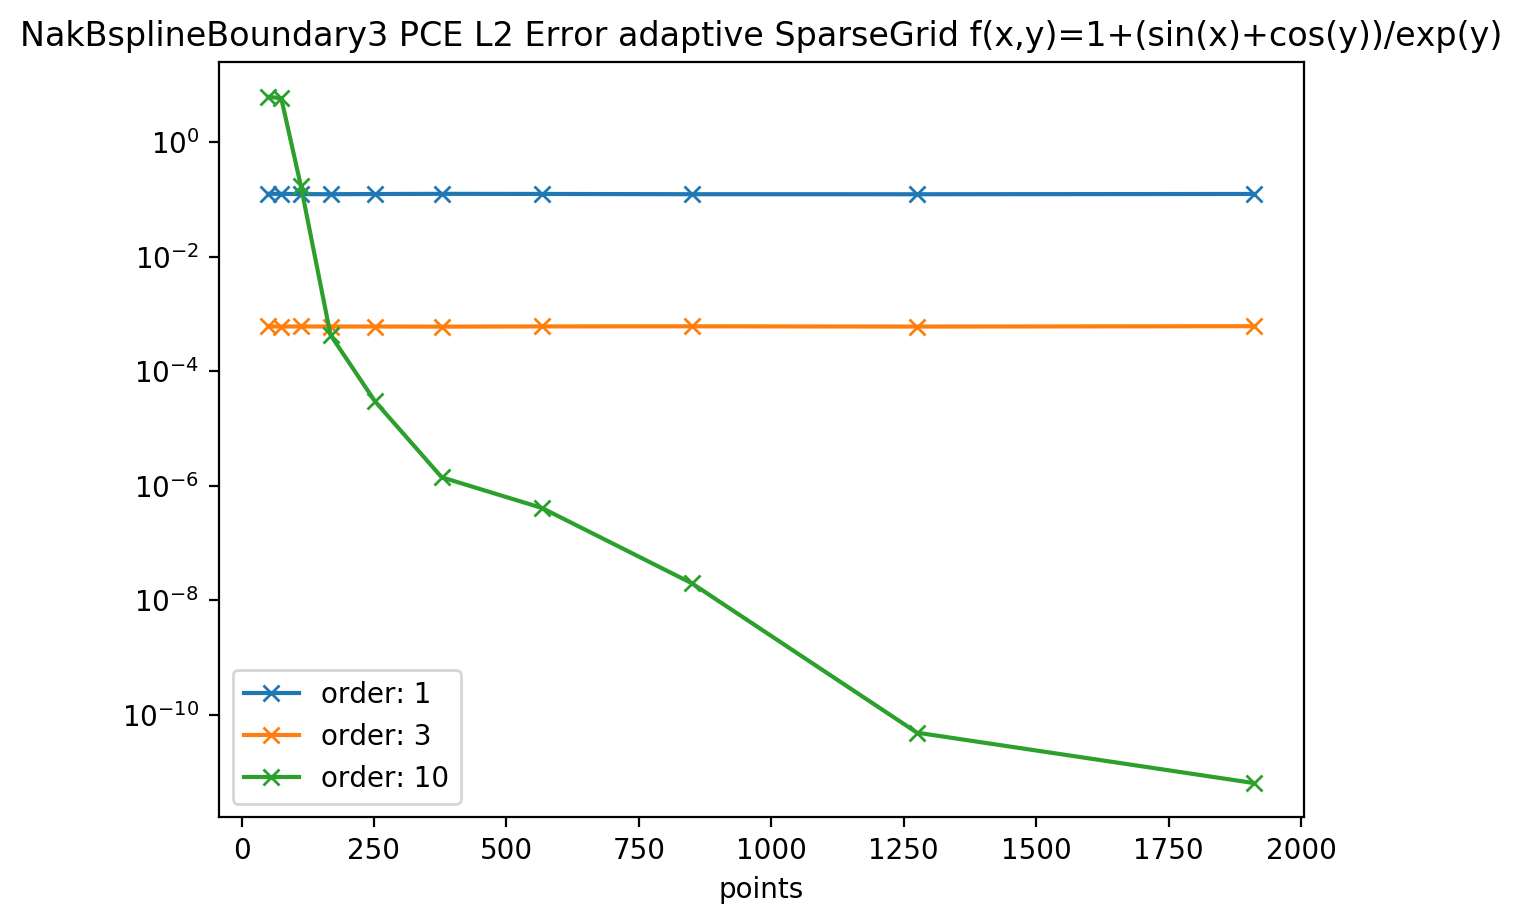

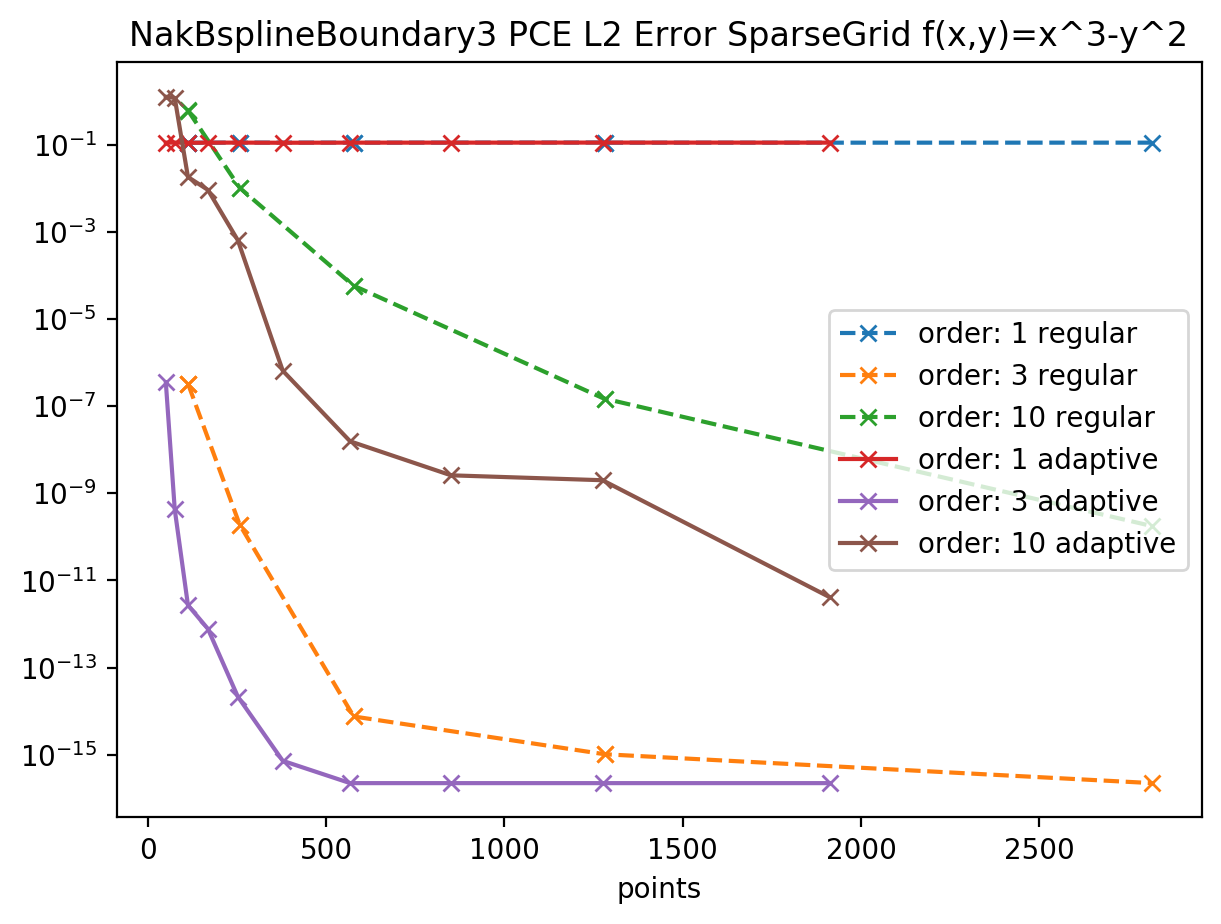

In [3]:
printer('NakBsplineBoundary3')